In [3]:
suppressPackageStartupMessages({
    library(monocle3)
    library(tidyverse)
    library(ggplot2)
    library(reshape2)
    library(viridis)
})

Warning message:
“package ‘S4Vectors’ was built under R version 4.1.3”


In [4]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Big Sur 10.16

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.1/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.1/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] viridis_0.6.3               viridisLite_0.4.2          
 [3] reshape2_1.4.4              forcats_0.5.2              
 [5] stringr_1.5.0               dplyr_1.1.2                
 [7] purrr_1.0.1                 readr_2.1.3                
 [9] tidyr_1.3.0                 tibble_3.2.1               
[11] ggplot2_3.4.2               tidyverse_1.3.2            
[13] monocle3_1.3.1              SingleCellExperiment_1.16.0
[15] SummarizedExperiment_1.24.0 GenomicRanges_1.46.1     

# Regenerate figures for fly

In [3]:
fly_peaks = readRDS("FlyTFPeaks_clusters_targets.rds")

## regenerate peak file with no mitochondrial peaks and with TF names

In [10]:
fly_peaks  %>%  count(chromo.x)

chromo.x n     
1 chr2L    658885
2 chr2R    685318
3 chr3L    787132
4 chr3R    816308
5 chr4      15858
6 chrM       2710
7 chrX     664309
8 chrY        195

In [11]:
fly_peaks_noM = fly_peaks  %>% filter(chromo.x != "chrM") 

In [ ]:
## got fly_peaks_TF from Figure3 RData file below

In [69]:
fly_peaks_TF_old = fly_peaks_TF

In [70]:
ls()

[1] "f1d"                   "f2d"                   "figure1d"             
 [4] "figure2d"              "Figure3_fly_violin"    "figures1d"            
 [7] "fly_clusters"          "fly_peak_spans"        "fly_peaks"            
[10] "fly_peaks_noM"         "fly_peaks_TF"          "fly_peaks_TF_old"     
[13] "fs1a"                  "fs1c"                  "fs1d"                 
[16] "p"                     "peak_signal"           "peaks_by_cluster_size"

## Figure 1b

In [2]:
load("data/fly_TF_target_match.RData")

In [4]:
ls()

[1] "exp_matrix"               "exp_matrix_mean"         
[3] "fly_peaks_TF"             "gene_max_mean_entropy"   
[5] "missing_genes"            "missing_genes_aliases"   
[7] "vector_angle_emb_targets"

In [73]:
colnames(fly_peaks_TF)

[1] "peakID"          "absDist"         "chromo.x"        "start.x"        
 [5] "end.x"           "exp"             "score"           "strand.x"       
 [9] "apexS.x"         "apexE.x"         "color.x"         "cluster"        
[13] "target"          "targetDist"      "chromo.y"        "start.y"        
[17] "end.y"           "nPeaks"          "strand.y"        "apexS.y"        
[21] "apexE.y"         "color.y"         "TranscriptCoord" "Transcript"     
[25] "TranscriptLoc"   "Gene"            "GeneLoc"         "GeneExons"      
[29] "TranscriptNo"    "UniqueGeneTSSs"  "GeneTranscripts" "TF"             
[33] "rank"

In [74]:
### did lots of prior work getting the stages and removing the unknowns saved in file below
load("data/fly_TF_target_match.RData")

In [5]:
colnames(fly_peaks_TF)

[1] "peakID"          "absDist"         "chromo.x"        "start.x"        
 [5] "end.x"           "exp"             "score"           "strand.x"       
 [9] "apexS.x"         "apexE.x"         "color.x"         "cluster"        
[13] "target"          "targetDist"      "chromo.y"        "start.y"        
[17] "end.y"           "nPeaks"          "strand.y"        "apexS.y"        
[21] "apexE.y"         "color.y"         "TranscriptCoord" "Transcript"     
[25] "TranscriptLoc"   "Gene"            "GeneLoc"         "GeneExons"      
[29] "TranscriptNo"    "UniqueGeneTSSs"  "GeneTranscripts" "TF"             
[33] "rank"

In [77]:
fly_peaks_TF  %>% filter(grepl("embryo", exp))  %>%  count(exp)  %>% dim
fly_peaks_TF  %>% filter(grepl("adult", exp))  %>%  count(exp) %>% dim
fly_peaks_TF  %>% filter(grepl("prepupa", exp))  %>%  count(exp) %>% dim
fly_peaks_TF  %>% filter(grepl("wandering", exp))  %>%  count(exp) %>% dim
fly_peaks_TF  %>% filter(grepl("pupa", exp) & !(grepl("prepupa", exp)))  %>%  count(exp) %>% dim

[1] 525   2

[1] 22  2

[1] 65  2

[1] 41  2

[1] 20  2

In [79]:
Stage = c("embryonic", "wanderingthirdinstarlarva", "prepupa", "pupa", "adult")
number =c(525, 41, 65, 20, 22)

In [80]:
df_stages = data.frame(Stage, number)

In [81]:
df_stages$Stage = factor(df_stages$Stage, levels = 
                         c("embryonic", "wanderingthirdinstarlarva", "prepupa", "pupa", "adult"))

In [82]:
options(repr.plot.width=8, repr.plot.height=6)

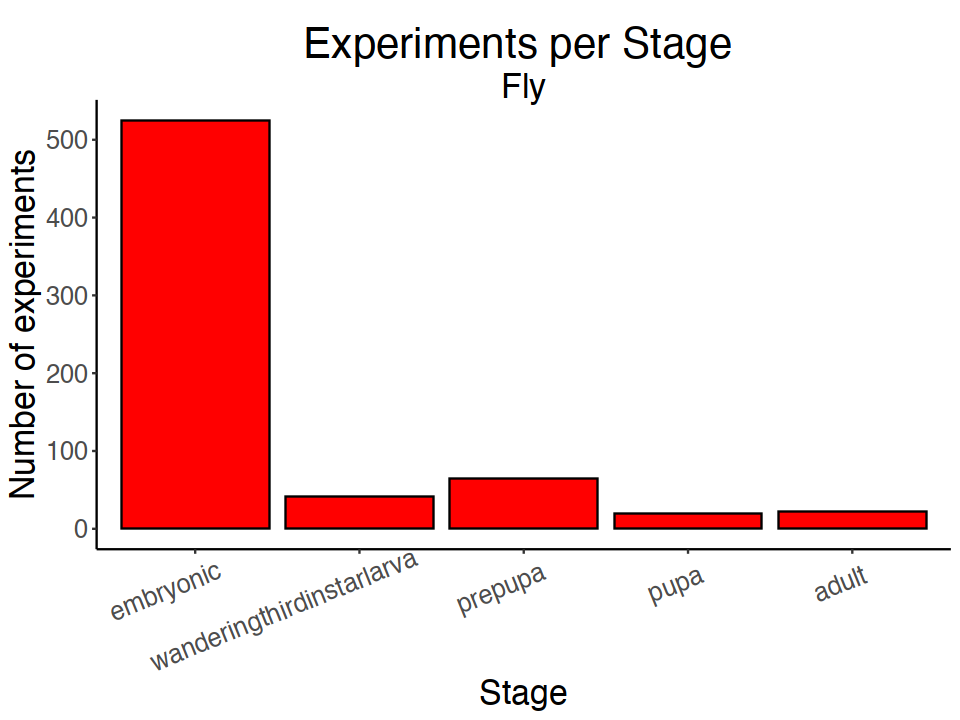

In [85]:
ggplot(df_stages, aes(x = Stage, y = number))  +
geom_bar(stat = "identity", color = "#000000", fill = "red") + 
theme_classic() + 
  labs(
    title = "Experiments per Stage ",
      subtitle = "Fly",
    x = "Stage",
    y = "Number of experiments"
  ) +
theme_classic() +
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = -1),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
      # axis.title.x = element_text(vjust = 6),
      axis.title.x = element_text(margin=margin(t=-5)),
    axis.text.x= element_text(size = 15, angle = 22, vjust = 0.9, hjust = 0.8), 
      axis.text.y= element_text(size = 15), axis.title= element_text(size = 20))

In [86]:
f1 = ggplot(df_stages, aes(x = Stage, y = number))  +
geom_bar(stat = "identity", color = "#000000", fill = "red") + 
theme_classic() + 
  labs(
    title = "Experiments per Stage ",
      subtitle = "Fly",
    x = "Stage",
    y = "Number of experiments"
  ) +
theme_classic() +
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = -1),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
      # axis.title.x = element_text(vjust = 6),
      axis.title.x = element_text(margin=margin(t=-5)),
    axis.text.x= element_text(size = 15, angle = 22, vjust = 0.9, hjust = 0.8), 
      axis.text.y= element_text(size = 15), axis.title= element_text(size = 20))

In [87]:
pdf("Figure1_fly_experiments_per_stage.pdf", width = 8, height = 6)
print(f1)
dev.off()

pdf 
  2

In [88]:
png("Figure1_fly_experiments_per_stage.png", width = 800, height = 600)
print(f1)
dev.off()

pdf 
  2

In [89]:
jpeg("Figure1_fly_experiments_per_stage.jpg", width = 800, height = 600)
print(f1)
dev.off()

pdf 
  2

### Get numbers of individual embryo times

peakID                                      absDist chromo.x start.x 
1 ab_ab-GFP_embryonic_1chr2L10010138:10010325  157    chr2L    10010138
2 ab_ab-GFP_embryonic_1chr2L10200820:10201220   16    chr2L    10200820
3 ab_ab-GFP_embryonic_1chr2L10220859:10221259  107    chr2L    10220859
4 ab_ab-GFP_embryonic_1chr2L10298312:10298712  245    chr2L    10298312
5 ab_ab-GFP_embryonic_1chr2L10334847:10335247 1133    chr2L    10334847
6 ab_ab-GFP_embryonic_1chr2L10474295:10474695  146    chr2L    10474295
  end.x    exp                   score strand.x apexS.x  apexE.x  ⋯ Transcript
1 10010325 ab_ab-GFP_embryonic_1 1000  .        10010195 10010199 ⋯ Trp1-RB   
2 10201220 ab_ab-GFP_embryonic_1 1000  .        10201018 10201022 ⋯ RpL7-RB   
3 10221259 ab_ab-GFP_embryonic_1  869  .        10221057 10221061 ⋯ Npc1a-RD  
4 10298712 ab_ab-GFP_embryonic_1  966  .        10298510 10298514 ⋯ CYLD-RB   
5 10335247 ab_ab-GFP_embryonic_1  819  .        10335045 10335049 ⋯ GATAd-RC  
6 10474695 ab_ab-GFP_embryonic_1 1000  .        10474493 10474497 ⋯ RluA-1-RA 
  TranscriptLoc Gene   GeneLoc GeneExons TranscriptNo UniqueGeneTSSs
1 5P            Trp1   I1       5        2            2             
2 E1            RpL7   E1       3        1            2             
3 5P            Npc1a  I1      13        1            2             
4 5P            CYLD   I3      12        1            2             
5 I1            GATAd  I1       8        2            2             
6 5P            RluA-1 5P      11        1            1             
  GeneTranscripts TF rank      
1 4               ab 0.96367521
2 2               ab 0.93963675
3 7               ab 0.05128205
4 3               ab 0.31997863
5 3               ab 0.53525641
6 4               ab 0.93589744

In [90]:
figure1a = function(fly_peaks_TF){
    load("data/fly_TF_target_match.RData")
    
fly_peaks_TF  %>% filter(grepl("embryo", exp))  %>%  count(exp)  %>% dim
fly_peaks_TF  %>% filter(grepl("adult", exp))  %>%  count(exp) %>% dim
fly_peaks_TF  %>% filter(grepl("prepupa", exp))  %>%  count(exp) %>% dim
fly_peaks_TF  %>% filter(grepl("wandering", exp))  %>%  count(exp) %>% dim
fly_peaks_TF  %>% filter(grepl("pupa", exp) & !(grepl("prepupa", exp)))  %>%  count(exp) %>% dim
    
Stage = c("embryonic", "wanderingthirdinstarlarva", "prepupa", "pupa", "adult")
number =c(525, 41, 65, 20, 22)
    
df_stages = data.frame(Stage, number)
df_stages$Stage = factor(df_stages$Stage, levels = 
                         c("embryonic", "wanderingthirdinstarlarva", "prepupa", "pupa", "adult"))

options(repr.plot.width=8, repr.plot.height=6)

f1 = ggplot(df_stages, aes(x = Stage, y = number))  +
geom_bar(stat = "identity", color = "#000000", fill = "red") + 
theme_classic() + 
  labs(
    title = "Experiments per Stage ",
      subtitle = "Fly",
    x = "Stage",
    y = "Number of experiments"
  ) +
theme_classic() +
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = -1),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
      # axis.title.x = element_text(vjust = 6),
      axis.title.x = element_text(margin=margin(t=-5)),
    axis.text.x= element_text(size = 15, angle = 22, vjust = 0.9, hjust = 0.8), 
      axis.text.y= element_text(size = 15), axis.title= element_text(size = 20))
    
pdf("Figure1_fly_experiments_per_stage.pdf", width = 8, height = 6)
print(f1)
dev.off()
    
png("Figure1_fly_experiments_per_stage.png", width = 800, height = 600)
print(f1)
dev.off()

jpeg("Figure1_fly_experiments_per_stage.jpg", width = 800, height = 600)
print(f1)
dev.off()
    
}

In [91]:
save(fly_peaks_TF, figure1a, f1, file = "data/fly_figure1a.RData")

## Figure 1d

In [28]:
mean((fly_peaks_TF  %>% count(exp))$n)

[1] 5382.797

In [29]:
median((fly_peaks_TF  %>% count(exp))$n)

[1] 4415.5

In [34]:
options(repr.plot.width=8, repr.plot.height=6)

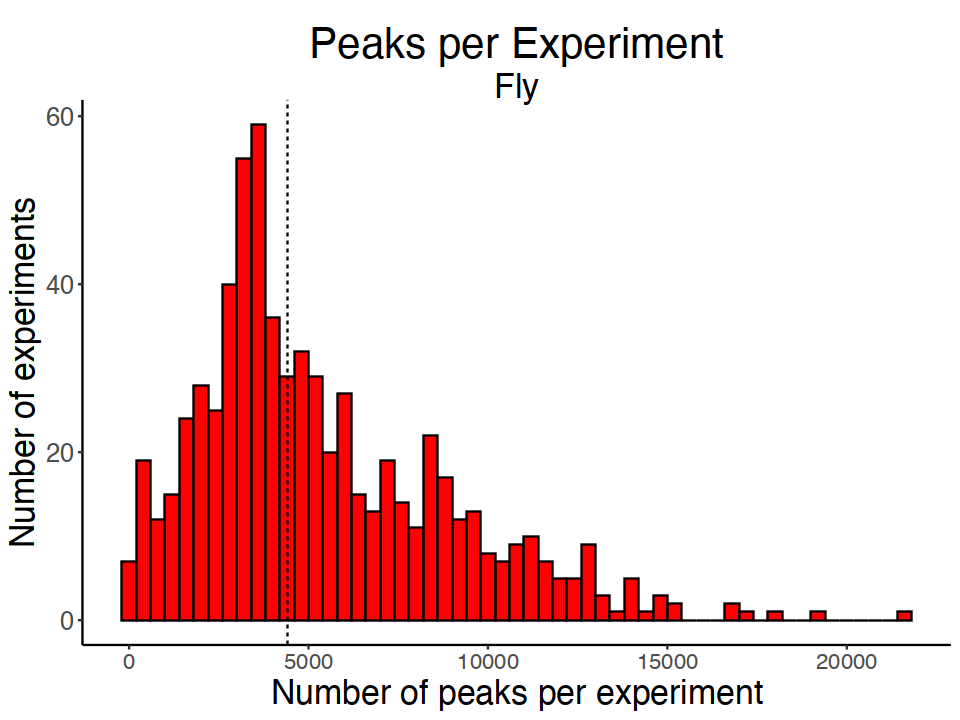

In [36]:
ggplot(fly_peaks_TF  %>% count(exp), aes(x=n)) + 
geom_histogram(binwidth = 400, color = "#000000", fill = "red")+
geom_vline(xintercept = 4416, linetype = "dashed") +
  labs(
    title = "Peaks per Experiment",
      subtitle = "Fly",
    x = "Number of peaks in experiment",
    y = "Number of experiments"
  ) +
xlab("Number of peaks per experiment") +
ylab("Number of experiments") +
theme_classic() +
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = -1),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
    axis.text.x= element_text(size = 13), 
      axis.text.y= element_text(size = 15), 
      axis.title= element_text(size = 20))

In [37]:
f1d = ggplot(fly_peaks_TF  %>% count(exp), aes(x=n)) + 
geom_histogram(binwidth = 400, color = "#000000", fill = "red")+
geom_vline(xintercept = 4416, linetype = "dashed") +
  labs(
    title = "Peaks per Experiment",
      subtitle = "Fly",
    x = "Number of peaks in experiment",
    y = "Number of experiments"
  ) +
xlab("Number of peaks per experiment") +
ylab("Number of experiments") +
theme_classic() +
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = -1),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
    axis.text.x= element_text(size = 13), 
      axis.text.y= element_text(size = 15), 
      axis.title= element_text(size = 20))

In [38]:
pdf("data/Figure1d_fly_peaks_per_experiment.pdf", width = 8, height = 6)
print(f1d)
dev.off()

pdf 
  2

In [39]:
png("data/Figure1d_fly_peaks_per_experiment.png", width = 800, height = 600)
print(f1d)
dev.off()

pdf 
  2

In [40]:
jpeg("data/Figure1d_fly_peaks_per_experiment.jpg", width = 800, height = 600)
print(f1d)
dev.off()

pdf 
  2

In [47]:
figure1d = function(fly_peaks_TF){
    median((fly_peaks_TF  %>% count(exp))$n)
    
f1d = ggplot(fly_peaks_TF  %>% count(exp), aes(x=n)) + 
geom_histogram(binwidth = 400, color = "#000000", fill = "red")+
geom_vline(xintercept = 4416, linetype = "dashed") +
  labs(
    title = "Peaks per Experiment",
      subtitle = "Fly",
    x = "Number of peaks in experiment",
    y = "Number of experiments"
  ) +
xlab("Number of peaks per experiment") +
ylab("Number of experiments") +
theme_classic() +
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = -1),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
    axis.text.x= element_text(size = 13), 
      axis.text.y= element_text(size = 15), 
      axis.title= element_text(size = 20))

pdf("Figures/Figure1d_fly_peaks_per_experiment.pdf", width = 8, height = 6)
print(f1d)
dev.off()
    
png("Figures/Figure1d_fly_peaks_per_experiment.png", width = 800, height = 600)
print(f1d)
dev.off()
    
jpeg("Figures/Figure1d_fly_peaks_per_experiment.jpg", width = 800, height = 600)
print(f1d)
dev.off()
}

In [42]:
save(fly_peaks_TF, figure1d, f1d, file = "data/fly_figure1d.RData")

## Figure supplement 1a

In [43]:
fly_peak_spans = fly_peaks_TF  %>% mutate(peak_span = end.x - start.x)

In [44]:
fly_peak_spans  %>% arrange(peak_span) 

peakID                                                                           
1       pan_yellow_cinnabar_brown_speck_wanderingthirdinstarlarva_1chr2L20864917:20864967
2       pan_yellow_cinnabar_brown_speck_wanderingthirdinstarlarva_1chr3L12913771:12913822
3       pan_Hr3-GFP_embryonic_1chr2R11197045:11197097                                    
4       Dfd_10T-GFP_embryonic_1chr3R22397448:22397501                                    
5       pan_yellow_cinnabar_brown_speck_wanderingthirdinstarlarva_1chrX7271548:7271602   
6       pan_Hr3-GFP_embryonic_1chr2R13566330:13566386                                    
7       pan_yellow_cinnabar_brown_speck_wanderingthirdinstarlarva_1chr2R14307662:14307718
8       pan_yellow_cinnabar_brown_speck_embryonic_2chr3R15343455:15343513                
9       Dfd_10T-GFP_embryonic_1chr4179460:179519                                         
10      Eip74EF_Eip74EF-GFP_embryonic_2chr3L18088183:18088243                            
11      pan_yellow_cinnabar_brown_speck_wanderingthirdinstarlarva_1chr3R24109120:24109181
12      aop_aop-GFP_embryonic_1chr2L6079051:6079115                                      
13      aop_aop-GFP_embryonic_1chr2R12985153:12985217                                    
14      aop_aop-GFP_embryonic_1chr2R24942533:24942597                                    
15      aop_aop-GFP_embryonic_1chr3L3395027:3395091                                      
16      aop_aop-GFP_embryonic_1chrX8091140:8091205                                       
17      cnc_yellow_cinnabar_brown_speck_adult_1chr3L19915070:19915135                    
18      cnc_yellow_cinnabar_brown_speck_adult_1chr3R18573247:18573312                    
19      dl_dl-small-GFP_wanderingthirdinstarlarva_1chr2L10261006:10261071                
20      dl_dl-small-GFP_wanderingthirdinstarlarva_1chr2L1649991:1650056                  
21      dl_dl-small-GFP_wanderingthirdinstarlarva_1chr2L2242279:2242344                  
22      dl_dl-small-GFP_wanderingthirdinstarlarva_1chr2L5943856:5943921                  
23      dl_dl-small-GFP_wanderingthirdinstarlarva_1chr2R8649460:8649525                  
24      dl_dl-small-GFP_wanderingthirdinstarlarva_1chr3L19791487:19791552                
25      dl_dl-small-GFP_wanderingthirdinstarlarva_1chr3R14749330:14749395                
26      dl_dl-small-GFP_wanderingthirdinstarlarva_1chr3R29691248:29691313                
27      dl_dl-small-GFP_wanderingthirdinstarlarva_1chrX11720439:11720504                 
28      aop_aop-GFP_embryonic_1chr2L10200991:10201057                                    
29      aop_aop-GFP_embryonic_1chr2L16716296:16716362                                    
30      cnc_yellow_cinnabar_brown_speck_adult_1chr2R6759035:6759101                      
⋮       ⋮                                                                                
3627976 Sp1_Sp1-GFP_wanderingthirdinstarlarva_1chrX3406893:3409335                       
3627977 Hr78_Hr78-GFP_embryonic_2chr3L10390703:10393156                                  
3627978 CG30020_CG30020_embryonic_1chr2R5420422:5422876                                  
3627979 cg_cg-GFP_embryonic_1chr2R17460286:17462748                                      
3627980 twi_twi_embryonic_1chr2L2161539:2164002                                          
3627981 CG30020_CG30020_embryonic_1chr2R5363608:5366091                                  
3627982 exex_exex_embryonic_1chr3R22525363:22527865                                      
3627983 CG30020_CG30020_embryonic_1chr3L23276724:23279238                                
3627984 CG30020_CG30020_embryonic_1chr2R5606178:5608701                                  
3627985 CG30020_CG30020_embryonic_1chr3L23738641:23741167                                
3627986 CG30020_CG30020_embryonic_1chr2R1342688:1345332                                  
3627987 Trl_yellow_cinnabar_brown_speck_embryonic_3chrX10783633:10786299                 
3627988 CG30020_CG30020_embryonic_1chr440474:431

In [45]:
fly_peak_spans  %>% filter(peak_span > 1000)  %>% dim

[1] 4518   35

In [48]:
options(repr.plot.width = 8, repr.plot.height = 6)

Warning message:
“Removed 4518 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


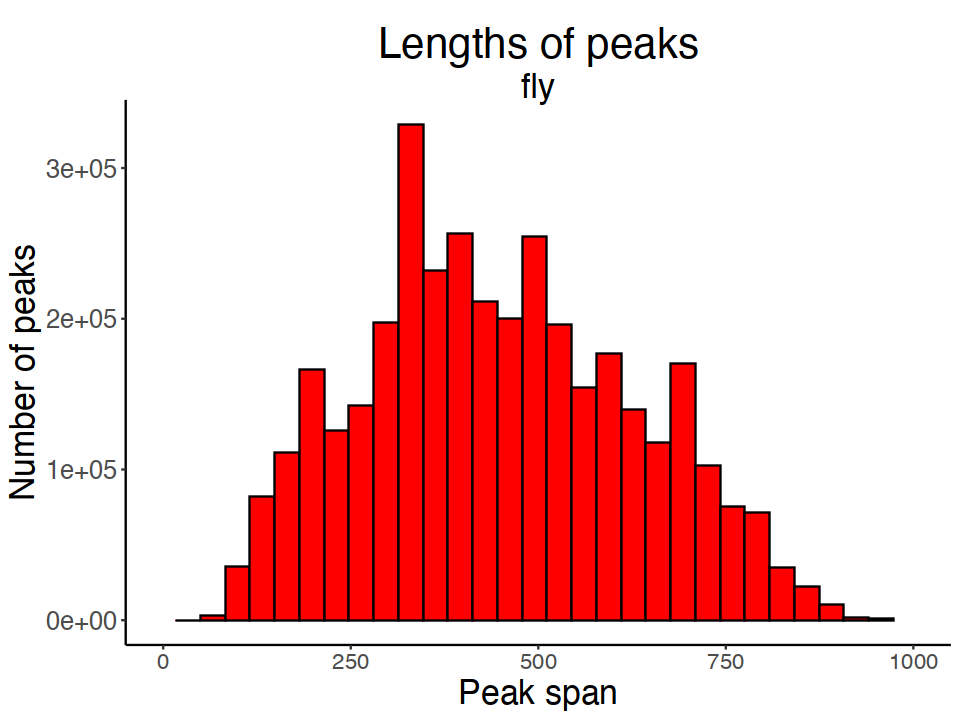

In [46]:
ggplot(fly_peak_spans,   
       #filter(nPeaks > 602), 
       aes(x = peak_span)) +
       geom_histogram(binwidth = 33, color = "#000000", fill = "red") + 
  labs(
    title = "Lengths of peaks",
      subtitle = "fly",
    x = "Peak span",
    y = "Number of peaks"
  ) +
theme_classic() + 
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = -1),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
    axis.text.x= element_text(size = 13), 
      axis.text.y= element_text(size = 15), 
      axis.title= element_text(size = 20)) + 
xlim(0, 1000)

In [48]:
fs1a = ggplot(fly_peak_spans,   
       #filter(nPeaks > 602), 
       aes(x = peak_span)) +
       geom_histogram(binwidth = 33, color = "#000000", fill = "red") + 
  labs(
    title = "Lengths of peaks",
      subtitle = "fly",
    x = "Peak span",
    y = "Number of peaks"
  ) +
theme_classic() + 
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = -1),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
    axis.text.x= element_text(size = 13), 
      axis.text.y= element_text(size = 15), 
      axis.title= element_text(size = 20)) + 
xlim(0, 1000)

In [49]:
pdf("Figures/Supplemental_Figure1b_fly_peaks_lengths.pdf", width = 8, height = 6)
print(fs1a)
dev.off()

Warning message:
“Removed 4518 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


pdf 
  2

In [50]:
png("Figures/Supplemental_Figure1b_fly_peaks_lengths.png", width = 800, height = 600)
print(fs1a)
dev.off()

Warning message:
“Removed 4518 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


pdf 
  2

In [51]:
jpeg("Figures/Supplemental_Figure1b_fly_peaks_lengths.jpg", width = 800, height = 600)
print(fs1a)
dev.off()

Warning message:
“Removed 4518 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


pdf 
  2

In [87]:
figures1b = function(fly_peaks_TF){
    
    fly_peak_spans = fly_peaks_TF  %>% mutate(peak_span = end.x - start.x)
    
fs1a = ggplot(fly_peak_spans,   
       #filter(nPeaks > 602), 
       aes(x = peak_span)) +
       geom_histogram(binwidth = 33, color = "#000000", fill = "red") + 
  labs(
    title = "Lengths of peaks",
      subtitle = "fly",
    x = "Peak span",
    y = "Number of peaks"
  ) +
theme_classic() + 
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = -1),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
    axis.text.x= element_text(size = 13), 
      axis.text.y= element_text(size = 15), 
      axis.title= element_text(size = 20)) + 
xlim(0, 1000)
    
pdf("Figures/Supplemental_Figure1b_fly_peaks_lengths.pdf", width = 8, height = 6)
print(fs1a)
dev.off() 
    
png("Figures/Supplemental_Figure1b_fly_peaks_lengths.png", width = 800, height = 600)
print(fs1a)
dev.off()
    
jpeg("Figures/Supplemental_Figure1b_fly_peaks_lengths.jpg", width = 800, height = 600)
print(fs1a)
dev.off()
    
}

In [88]:
save(fly_peak_spans, fs1a, figures1a, file = "data/fly_figure_s1a.RData")

## Figure supplement s1c

In [52]:
fly_clusters = fly_peaks_TF  %>% 
count(cluster, start.y, end.y, nPeaks)  %>% mutate(cluster_span = end.y - start.y)

In [53]:
fly_clusters  %>% filter(cluster_span > 4000)

cluster            start.y  end.y    nPeaks n    cluster_span
1  16_narrowPeak10476 14754643 14758735 1000   1684   4092      
2  17_narrowPeak3548  20820444 20825008  810    810   4564      
3  2_narrowPeak11443  11874002 11880471    5      5   6469      
4  2_narrowPeak15976  22715493 22721597    3      3   6104      
5  2_narrowPeak17686   1524011  1529545    3      3   5534      
6  2_narrowPeak24457  18855136 18860901    6      6   5765      
7  2_narrowPeak25219  20753483 20757959   21     21   4476      
8  2_narrowPeak26033  22626366 22634672   14     14   8306      
9  2_narrowPeak26216  23265980 23270090    4      4   4110      
10 2_narrowPeak26369  25923701 25961051    7      7  37350      
11 2_narrowPeak28817   9651971  9657477    2      2   5506      
12 2_narrowPeak29714  11928545 11934618    7      7   6073      
13 2_narrowPeak31921  17216263 17220583   58     58   4320      
14 2_narrowPeak35603  26359638 26365710    4      4   6072      
15 2_narrowPeak35631  26446595 26451716    2      2   5121      
16 2_narrowPeak35980  27296078 27301764    6      6   5686      
17 2_narrowPeak37105  30501907 30515023    4      4  13116      
18 2_narrowPeak38440    843186   849093  115    115   5907      
19 2_narrowPeak4006   10137886 10144077  161    161   6191      
20 2_narrowPeak40356   6238287  6242346    3      3   4059      
21 2_narrowPeak40937   7763399  7768753    5      5   5354      
22 2_narrowPeak41375   8948153  8958800    2      2  10647      
23 2_narrowPeak41796  10072806 10077637    3      3   4831      
24 2_narrowPeak4189   10591885 10601677    4      4   9792      
25 2_narrowPeak43494  15374057 15379909   21     21   5852      
26 2_narrowPeak43706  15915084 15921597    3      3   6513      
27 2_narrowPeak44515  18210731 18215050   10     10   4319      
28 2_narrowPeak44675  18606186 18612254    2      2   6068      
29 2_narrowPeak45032  19484895 19489041   28     28   4146      
30 2_narrowPeak45605  21558076 21563939   10     10   5863      
31 2_narrowPeak46131    124539   380680    5      5 256141      
32 2_narrowPeak4696   11934347 11941198   21     21   6851      
33 2_narrowPeak5384   13593015 13598127    9      9   5112      
34 2_narrowPeak8551    1566564  1578374    4      4  11810      
35 2_narrowPeak8757    4933293  4941005    3      3   7712      
36 35_narrowPeak5317  22580000 22587252   55     55   7252      
37 3_narrowPeak21462  20515934 20520172  784    784   4238      
38 3_narrowPeak21662  21019159 21024574   98     98   5415      
39 3_narrowPeak22427  23987888 24009097    5      5  21209      
40 3_narrowPeak3597   10258129 10262807  455    455   4678      
41 3_narrowPeak36284  12929566 12934090   22     22   4524      
42 3_narrowPeak36285  12934091 12938878  170    170   4787      
43 4_narrowPeak26461  25142297 25147195    4      4   4898      
44 4_narrowPeak3404   10982595 10986993  151    151   4398      
45 6_narrowPeak26883  11975348 11981887    5      5   6539      
46 8_narrowPeak14904  21014130 21019158   83     83   5028

Warning message:
“Removed 46 rows containing missing values (`geom_point()`).”


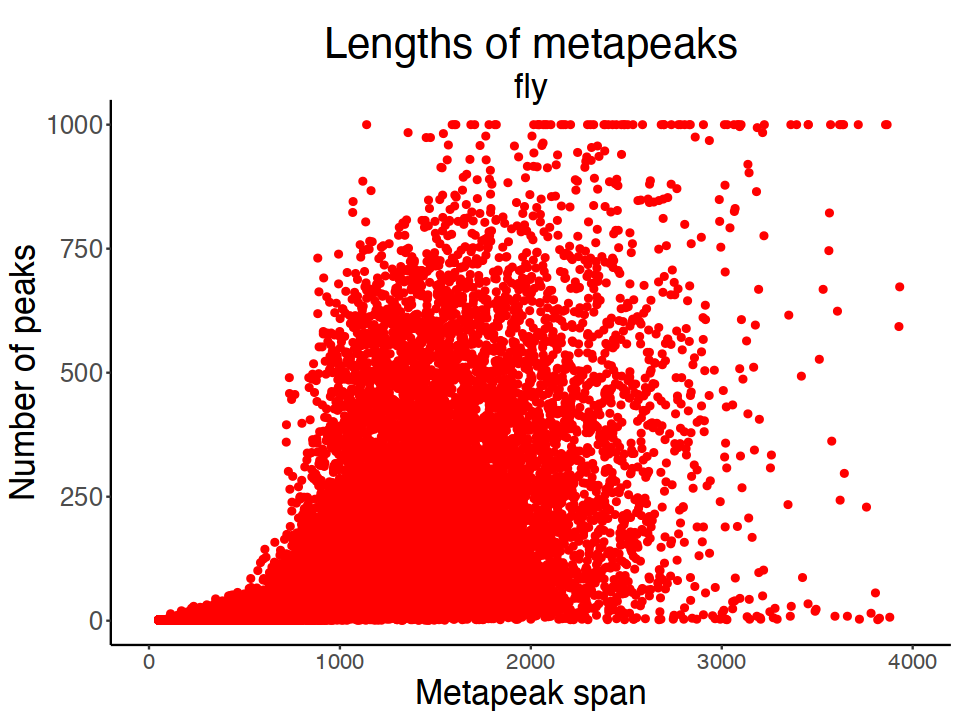

In [55]:
ggplot(fly_clusters, aes(x = cluster_span, y = nPeaks)) +
       geom_point(color = "red", fill = "red") + 
  labs(
    title = "Lengths of metapeaks",
      subtitle = "fly",
    x = "Metapeak span",
    y = "Number of peaks"
  ) +
theme_classic() + xlim(0, 4000) +
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = -1),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
    axis.text.x= element_text(size = 13), 
      axis.text.y= element_text(size = 15), 
      axis.title= element_text(size = 20)) 

In [57]:
fs1d = ggplot(fly_clusters, aes(x = cluster_span, y = nPeaks)) +
       geom_point(color = "red", fill = "red") + 
  labs(
    title = "Lengths of metapeaks",
      subtitle = "fly",
    x = "Metapeak span",
    y = "Number of peaks"
  ) +
theme_classic() + xlim(0, 4000) +
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = -1),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
    axis.text.x= element_text(size = 13), 
      axis.text.y= element_text(size = 15), 
      axis.title= element_text(size = 20)) 

In [58]:
pdf("Figures/Supplemental_Figure1d_fly_metapeak_lengths.pdf", width = 8, height = 6)
print(fs1d)
dev.off()

Warning message:
“Removed 46 rows containing missing values (`geom_point()`).”


pdf 
  2

In [59]:
jpeg("Figures/Supplemental_Figure1d_fly_metapeak_lengths.jpg", width = 800, height = 600)
print(fs1d)
dev.off()

Warning message:
“Removed 46 rows containing missing values (`geom_point()`).”


pdf 
  2

In [60]:
png("Figures/Supplemental_Figure1d_fly_metapeak_lengths.png", width = 800, height = 600)
print(fs1d)
dev.off()

Warning message:
“Removed 46 rows containing missing values (`geom_point()`).”


pdf 
  2

In [61]:
figures1d = function(fly_peaks_TF){
    fly_clusters = fly_peaks_TF  %>% 
        count(cluster, start.y, end.y, nPeaks)  %>% mutate(cluster_span = end.y - start.y)
    fs1c = ggplot(fly_clusters, aes(x = cluster_span, y = nPeaks)) +
       geom_point(color = "red", fill = "red") + 
    labs(
        title = "Lengths of metapeaks",
          subtitle = "fly",
        x = "Metapeak span",
        y = "Number of peaks"
      ) +
    theme_classic() + xlim(0, 4000) +
    theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = -1),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
    axis.text.x= element_text(size = 13), 
      axis.text.y= element_text(size = 15), 
      axis.title= element_text(size = 20)) 
    pdf("Figures/Supplemental_Figure1d_fly_metapeak_lengths.pdf", width = 8, height = 6)
        print(fs1c)
    dev.off()
    
    jpeg("Figures/Supplemental_Figure1d_fly_metapeak_lengths.jpg", width = 800, height = 600)
        print(fs1c)
    dev.off()
    
    png("Figures/Supplemental_Figure1d_fly_metapeak_lengths.png", width = 800, height = 600)
        print(fs1c)
    dev.off()
}

In [62]:
save(fly_clusters, fs1d, figures1d, file = "data/fly_figure_s1d.RData")

## Figure 2 B

### Revise figure to extend lines

In [1]:
load("data/fly_figure_2b.RData")

In [2]:
ls()

[1] "f2b"                   "figure2b"              "fly_peaks_TF"         
[4] "peaks_by_cluster_size"

In [63]:
peaks_by_cluster_size = fly_peaks_TF  %>% count(cluster)  %>% count(n)  %>% mutate(peaks_sum = n*nn)

Storing counts in `nn`, as `n` already present in input
ℹ Use `name = "new_name"` to pick a new name.


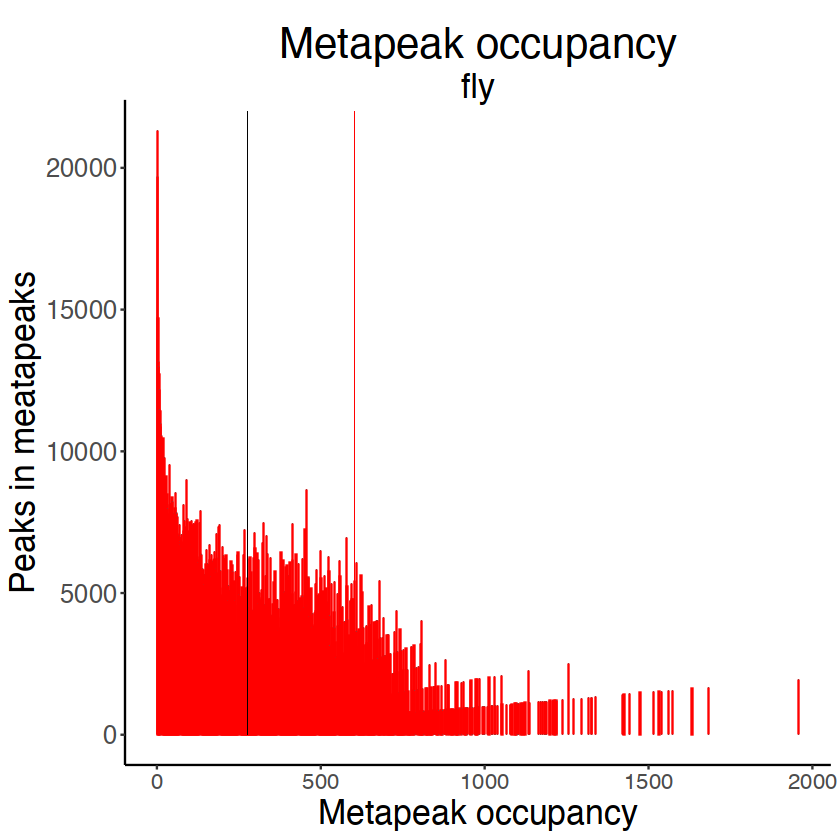

In [6]:
ggplot(peaks_by_cluster_size, aes(x = n, y = peaks_sum))  +
theme_classic() +
  labs(
    title = "Metapeak occupancy",
      subtitle = "fly"
      ) +
 theme(axis.title = element_text(size = 20), axis.text.x= element_text(size = 13), axis.text.y= element_text(size = 15)) +
  geom_bar(stat="identity", color = "red") + 
geom_segment(x = 277, y = 0, xend = 277, yend = 22000, col = "black", size = 0.1) +
geom_segment(x = 602, y = 0, xend = 602, yend = 22000, col = "red", size = 0.1)+
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = -1),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
    axis.text.x= element_text(size = 13), 
      axis.text.y= element_text(size = 15), 
      axis.title= element_text(size = 20)) +
xlab("Metapeak occupancy") +
ylab("Peaks in meatapeaks")

In [7]:
f2b = ggplot(peaks_by_cluster_size, aes(x = n, y = peaks_sum))  +
theme_classic() +
  labs(
    title = "Metapeak occupancy",
      subtitle = "fly"
      ) +
 theme(axis.title = element_text(size = 20), axis.text.x= element_text(size = 13), axis.text.y= element_text(size = 15)) +
  geom_bar(stat="identity", color = "red") + 
geom_segment(x = 277, y = 0, xend = 277, yend = 22000, col = "black", size = 0.1) +
geom_segment(x = 602, y = 0, xend = 602, yend = 22000, col = "red", size = 0.1)+
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = -1),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
    axis.text.x= element_text(size = 13), 
      axis.text.y= element_text(size = 15), 
      axis.title= element_text(size = 20)) +
xlab("Metapeak occupancy") +
ylab("Peaks in meatapeaks")

In [8]:
pdf("Figures/Figure2b_fly_metapeak_occupancy.pdf", width = 8, height = 6)
print(f2b)
dev.off()

png("Figures/Figure2b_fly_metapeak_occupancy.png", width = 800, height = 600)
print(f2b)
dev.off()

jpeg("Figures/Figure2b_fly_metapeak_occupancy.jpg", width = 800, height = 600)
print(f2b)
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2

In [9]:
figure2b = function(peaks_by_cluster_size) {
    peaks_by_cluster_size = fly_peaks_TF  %>% count(cluster)  %>% 
        count(n)  %>% mutate(peaks_sum = n*nn)
f2b = ggplot(peaks_by_cluster_size, aes(x = n, y = peaks_sum))  +
theme_classic() +
  labs(
    title = "Metapeak occupancy",
      subtitle = "fly"
      ) +
 theme(axis.title = element_text(size = 20), axis.text.x= element_text(size = 13), axis.text.y= element_text(size = 15)) +
  geom_bar(stat="identity", color = "red") + 
geom_segment(x = 277, y = 0, xend = 277, yend = 22000, col = "black", size = 0.1) +
geom_segment(x = 602, y = 0, xend = 602, yend = 22000, col = "red", size = 0.1)+
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = -1),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
    axis.text.x= element_text(size = 13), 
      axis.text.y= element_text(size = 15), 
      axis.title= element_text(size = 20)) +
xlab("Metapeak occupancy") +
ylab("Peaks in meatapeaks")
    
    pdf("Figures/Figure2b_fly_metapeak_occupancy.pdf", width = 8, height = 6)
        print(f2b)
    dev.off()

    png("Figures/Figure2b_fly_metapeak_occupancy.png", width = 800, height = 600)
        print(f2b)
    dev.off()

    jpeg("Figures/Figure1_peaks_per_experiment.jpgFigure2b_fly_metapeak_occupancy.jpg", width = 800, height = 600)
        print(f2b)
    dev.off()
    
}

In [10]:
save(fly_peaks_TF, peaks_by_cluster_size, f2b, figure2b, file = "data/fly_figure_2b.RData")

## Figure 2d 

In [113]:
load("data/fly_figure3.RData")

In [114]:
ls()

[1] "exp_matrix"              "exp_matrix_mean"        
 [3] "f1"                      "f1c"                    
 [5] "f2a"                     "figure1a"               
 [7] "figure1c"                "figure2a"               
 [9] "Figure3_worm_violin"     "figures1a"              
[11] "figures1c"               "fs1a"                   
[13] "fs1c"                    "gene_max_mean_entropy"  
[15] "peaks_by_cluster_size"   "stage_strain"           
[17] "worm_clusters"           "worm_peak_spans"        
[19] "worm_peaks_TF"           "worm_peaks_TF_noHOT"    
[21] "worm_peaks_TF_stage"     "worm_peaks_TF_stage_adj"
[23] "worm_stage_counts"

In [12]:
peak_signal = readRDS("FlySignalRank.rds")

In [13]:
fly_peaks_noM = left_join(fly_peaks_noM, peak_signal, by = "peakID")

In [15]:
dim(fly_peaks)
dim(fly_peaks_noM)

[1] 3630715      31

[1] 3628005      32

In [17]:
ls()

[1] "fly_peaks"     "fly_peaks_noM" "peak_signal"

In [7]:
load("data/fly_figure3.RData")

In [9]:
ls()

[1] "exp_matrix"               "exp_matrix_mean"         
[3] "Figure3_fly_violin"       "fly_peaks_TF"            
[5] "gene_max_mean_entropy"    "missing_genes"           
[7] "missing_genes_aliases"    "vector_angle_emb_targets"

In [10]:
head(fly_peaks_TF)

peakID                                      absDist chromo.x start.x 
1 ab_ab-GFP_embryonic_1chr2L10010138:10010325  157    chr2L    10010138
2 ab_ab-GFP_embryonic_1chr2L10200820:10201220   16    chr2L    10200820
3 ab_ab-GFP_embryonic_1chr2L10220859:10221259  107    chr2L    10220859
4 ab_ab-GFP_embryonic_1chr2L10298312:10298712  245    chr2L    10298312
5 ab_ab-GFP_embryonic_1chr2L10334847:10335247 1133    chr2L    10334847
6 ab_ab-GFP_embryonic_1chr2L10474295:10474695  146    chr2L    10474295
  end.x    exp                   score strand.x apexS.x  apexE.x  ⋯
1 10010325 ab_ab-GFP_embryonic_1 1000  .        10010195 10010199 ⋯
2 10201220 ab_ab-GFP_embryonic_1 1000  .        10201018 10201022 ⋯
3 10221259 ab_ab-GFP_embryonic_1  869  .        10221057 10221061 ⋯
4 10298712 ab_ab-GFP_embryonic_1  966  .        10298510 10298514 ⋯
5 10335247 ab_ab-GFP_embryonic_1  819  .        10335045 10335049 ⋯
6 10474695 ab_ab-GFP_embryonic_1 1000  .        10474493 10474497 ⋯
  TranscriptLoc Gene   GeneLoc GeneExons TranscriptNo UniqueGeneTSSs
1 5P            Trp1   I1       5        2            2             
2 E1            RpL7   E1       3        1            2             
3 5P            Npc1a  I1      13        1            2             
4 5P            CYLD   I3      12        1            2             
5 I1            GATAd  I1       8        2            2             
6 5P            RluA-1 5P      11        1            1             
  GeneTranscripts TF rank       group  
1 4               ab 0.96367521 278-602
2 2               ab 0.93963675 gt602  
3 7               ab 0.05128205 53-277 
4 3               ab 0.31997863 53-277 
5 3               ab 0.53525641 278-602
6 4               ab 0.93589744 gt602

In [22]:
Figure3_fly_violin

function(peak_file){
    fly_peaks_TF = peak_file
    fly_peaks_TF = fly_peaks_TF  %>% mutate(group =  ifelse(nPeaks == 1, "1",
                                            ifelse(nPeaks > 1 & nPeaks <=8, "2-8",
                                                  ifelse(nPeaks > 8 & nPeaks <=52, "9-52",
                                                        ifelse(nPeaks > 52 & nPeaks <=277, "53-277",
                                                              ifelse(nPeaks > 277 & nPeaks <=602, "278-602",
                                                                    ifelse(nPeaks > 602, "gt602", NA)))))))
    
    fly_peaks_TF$group = factor(fly_peaks_TF$group,
                                       levels = c("1", "2-8", "9-52", "53-277", "278-602", "gt602"  ))
    options(repr.plot.width=10, repr.plot.height=6)
    
    p = ggplot(fly_peaks_TF   , aes(x = group, y = rank,  fill = group)) +
geom_violin(show.legend = FALSE) +
stat_summary(fun=median, geom="point", size=4, color="black", show.legend = FALSE) +
labs(title="Peak quality vs metapeak occupancy",x="Peaks per metapeak", y = "Rank") +
theme_classic() +
theme(plot.title=element_text(hjust=0.5, size = 25), axis.title= element_text(size = 22),
      axis.text = element_text(size = 18))
}

In [201]:
fly_peaks_TF = fly_peaks_TF %>% mutate(group = ifelse(nPeaks == 
        1, "1", ifelse(nPeaks > 1 & nPeaks <= 8, "2-8", ifelse(nPeaks > 
        8 & nPeaks <= 52, "9-52", ifelse(nPeaks > 52 & nPeaks <= 
        277, "53-277", ifelse(nPeaks > 277 & nPeaks <= 602, "278-602", 
        ifelse(nPeaks > 602, "gt602", NA)))))))
    fly_peaks_TF$group = factor(fly_peaks_TF$group, levels = c("1", 
        "2-8", "9-52", "53-277", "278-602", "gt602"))

In [202]:
## change sizes to match new worm fingure
options(repr.plot.width = 12, repr.plot.height = 8)
    p = ggplot(fly_peaks_TF, aes(x = group, y = rank, fill = group)) + 
        geom_violin(show.legend = FALSE) + stat_summary(fun = median, 
        geom = "point", size = 4, color = "black", show.legend = FALSE) + 
        labs(title = "Peak quality vs metapeak occupancy", x = "Peaks per metapeak", 
            y = "Rank") + theme_classic() + theme(plot.title = element_text(hjust = 0.5, 
        size = 30), axis.title = element_text(size = 23), axis.text = element_text(size = 20))

Warning message:
“Removed 110216 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 110216 rows containing non-finite values (`stat_summary()`).”


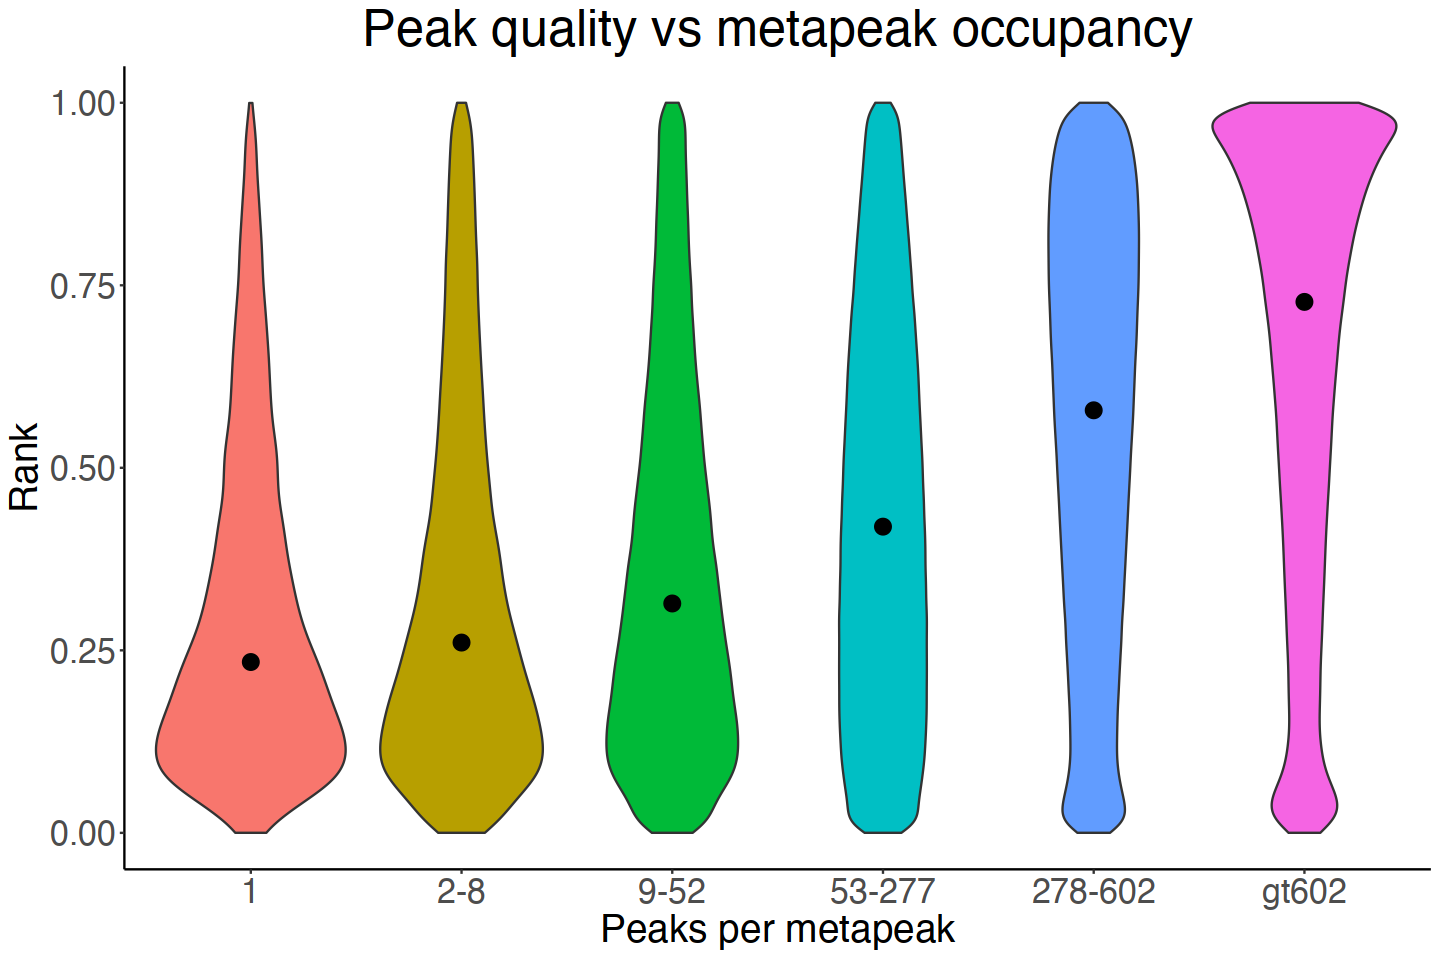

In [203]:
p

In [120]:
options(repr.plot.width = 12, repr.plot.height = 8)

In [204]:
f2d = p

In [205]:
pdf("Figure2d_fly_metapeak_occupancy_vs_rank.pdf", width = 12, height = 9)
print(f2d)
dev.off()

png("Figure2d_fly_metapeak_occupancy_vs_rank.png", width = 1200, height = 900)
print(f2d)
dev.off()

jpeg("Figure2d_fly_metapeak_occupancy_vs_rank.jpg", width = 1200, height = 900)
print(f2d)
dev.off()

Warning message:
“Removed 110216 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 110216 rows containing non-finite values (`stat_summary()`).”


pdf 
  2

Warning message:
“Removed 110216 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 110216 rows containing non-finite values (`stat_summary()`).”


pdf 
  2

Warning message:
“Removed 110216 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 110216 rows containing non-finite values (`stat_summary()`).”


pdf 
  2

In [ ]:
# Although there is a "data/fly_figure_2d.RData" file for unclear reasons it is not in any notebooks
# and it is not preserved in this notebook so see wat is in the file and 

In [11]:
ls()

[1] "exp_matrix"               "exp_matrix_mean"         
[3] "Figure3_fly_violin"       "fly_peaks_TF"            
[5] "gene_max_mean_entropy"    "missing_genes"           
[7] "missing_genes_aliases"    "vector_angle_emb_targets"

In [12]:
load("data/fly_figure_2d.RData")

In [15]:
load("data/fly_figure_2d.RData", new_environment <- new.env() )

In [16]:
ls(new_environment) # seems to have all the necessary files!

[1] "f2d"                   "figure2d"              "fly_peaks_TF"         
[4] "peaks_by_cluster_size"

In [14]:
environment()

<environment: R_GlobalEnv>

## Table 2 peaks across metapeaks

In [11]:
fly_peaks_TF  %>% filter(nPeaks == 1)  %>% dim
fly_peaks_TF  %>% filter(nPeaks >= 2 & nPeaks <=8)  %>% dim
fly_peaks_TF  %>% filter(nPeaks >= 9 & nPeaks <=52)  %>% dim
fly_peaks_TF  %>% filter(nPeaks >= 53 & nPeaks <=277)  %>% dim
fly_peaks_TF  %>% filter(nPeaks >= 278 & nPeaks <=602)  %>% dim
fly_peaks_TF  %>% filter(nPeaks >602)  %>% dim

[1] 21332    33

[1] 96908    33

[1] 378090     33

[1] 1264884      33

[1] 1274688      33

[1] 592103     33

In [12]:
fly_peaks_TF  %>% filter(nPeaks == 1)  %>% count(cluster) %>% dim
fly_peaks_TF  %>% filter(nPeaks >= 2 & nPeaks <=8)  %>% count(cluster) %>% dim
fly_peaks_TF  %>% filter(nPeaks >= 9 & nPeaks <=52)  %>% count(cluster) %>% dim
fly_peaks_TF  %>% filter(nPeaks >= 53 & nPeaks <=277)  %>% count(cluster) %>% dim
fly_peaks_TF  %>% filter(nPeaks >= 278 & nPeaks <=602)  %>% count(cluster) %>% dim
fly_peaks_TF  %>% filter(nPeaks >602)  %>% count(cluster) %>% dim

[1] 21332     2

[1] 25926     2

[1] 16757     2

[1] 10062     2

[1] 3109    2

[1] 783   2

In [37]:
peak_metapeak_function = function(fly_peaks_TF){
    # gets numbers of peaks in metapeaks of various intervals
    fly_peaks_TF  %>% filter(nPeaks == 1)  %>% dim
fly_peaks_TF  %>% filter(nPeaks >= 2 & nPeaks <=8)  %>% dim
fly_peaks_TF  %>% filter(nPeaks >= 9 & nPeaks <=52)  %>% dim
fly_peaks_TF  %>% filter(nPeaks >= 53 & nPeaks <=277)  %>% dim
fly_peaks_TF  %>% filter(nPeaks >= 278 & nPeaks <=602)  %>% dim
fly_peaks_TF  %>% filter(nPeaks >602)  %>% dim
    
    # gets numbers of clusters of various intervals
    fly_peaks_TF  %>% filter(nPeaks == 1)  %>% count(cluster) %>% dim
fly_peaks_TF  %>% filter(nPeaks >= 2 & nPeaks <=8)  %>% count(cluster) %>% dim
fly_peaks_TF  %>% filter(nPeaks >= 9 & nPeaks <=52)  %>% count(cluster) %>% dim
fly_peaks_TF  %>% filter(nPeaks >= 53 & nPeaks <=277)  %>% count(cluster) %>% dim
fly_peaks_TF  %>% filter(nPeaks >= 278 & nPeaks <=602)  %>% count(cluster) %>% dim
fly_peaks_TF  %>% filter(nPeaks >602)  %>% count(cluster) %>% dim
    
    # output stored in Table 2
    
}

## Table 2 new numbers for targets of metapeaks of different sizes

In [103]:
 read.table("AllFlyPeaks.TF.noDups.clusters.distance.bed")  %>% head

V1    V2    V3    V4             V5 V6 V7    V8    V9      V10           
1 chr2L  5067  6211 2_narrowPeak1  26 .   5698  5702 0,0,255 l(2)gl-RC::3P 
2 chr2L  6384  7114 2_narrowPeak2   5 .   6763  6767 0,255,0 l(2)gl-RC::3P 
3 chr2L  7603  8313 2_narrowPeak3   7 .   7904  7908 255,0,0 l(2)gl-RC::3P 
4 chr2L  9142 10244 2_narrowPeak4   5 .   9561  9565 0,0,255 l(2)gl-RC::3P 
5 chr2L 11977 12413 Singleton_2719  1 .  12193 12197 0,0,0   l(2)gl-RC::E11
6 chr2L 12432 13096 Singleton_1168  1 .  12762 12766 0,0,0   l(2)gl-RC::E10
  V11  
1 12870
2 11805
3 10664
4  9007
5  6375
6  5806

In [106]:
read.table("AllFlyPeaks.TF.noDups.clusters.peakTSSs", header = TRUE)  %>% head

TargetID             TranscriptCoord        Transcript       TranscriptLoc
1 128up-RA::E1         2R:12037298:12038851:+ 128up-RA         E1           
2 14-3-3epsilon-RA::3P 3R:18242687:18248579:+ 14-3-3epsilon-RA 3P           
3 14-3-3epsilon-RA::E2 3R:18242687:18248579:+ 14-3-3epsilon-RA E2           
4 14-3-3epsilon-RA::E3 3R:18242687:18248579:+ 14-3-3epsilon-RA E3           
5 14-3-3epsilon-RA::E4 3R:18242687:18248579:+ 14-3-3epsilon-RA 3P           
6 14-3-3epsilon-RA::I1 3R:18242687:18248579:+ 14-3-3epsilon-RA I1           
  Gene          GeneLoc GeneExons TranscriptNo UniqueGeneTSSs GeneTranscripts
1 128up         E1      4         1            1              1              
2 14-3-3epsilon 3P      4         2            2              4              
3 14-3-3epsilon E2      4         2            2              4              
4 14-3-3epsilon E3      4         2            2              4              
5 14-3-3epsilon E4      4         2            2              4              
6 14-3-3epsilon I1      4         2            2              4

In [108]:
cluster_nPeaks = read.table("AllFlyPeaks.TF.noDups.clusters.distance.bed")
TSS_gene = read.table("AllFlyPeaks.TF.noDups.clusters.peakTSSs", header = TRUE)
dim(cluster_nPeaks)
unique(TSS_gene$TargetID)  %>% length

[1] 77988    11

[1] 47992

In [109]:
TSS_gene  %>% head

TargetID             TranscriptCoord        Transcript       TranscriptLoc
1 128up-RA::E1         2R:12037298:12038851:+ 128up-RA         E1           
2 14-3-3epsilon-RA::3P 3R:18242687:18248579:+ 14-3-3epsilon-RA 3P           
3 14-3-3epsilon-RA::E2 3R:18242687:18248579:+ 14-3-3epsilon-RA E2           
4 14-3-3epsilon-RA::E3 3R:18242687:18248579:+ 14-3-3epsilon-RA E3           
5 14-3-3epsilon-RA::E4 3R:18242687:18248579:+ 14-3-3epsilon-RA 3P           
6 14-3-3epsilon-RA::I1 3R:18242687:18248579:+ 14-3-3epsilon-RA I1           
  Gene          GeneLoc GeneExons TranscriptNo UniqueGeneTSSs GeneTranscripts
1 128up         E1      4         1            1              1              
2 14-3-3epsilon 3P      4         2            2              4              
3 14-3-3epsilon E2      4         2            2              4              
4 14-3-3epsilon E3      4         2            2              4              
5 14-3-3epsilon E4      4         2            2              4              
6 14-3-3epsilon I1      4         2            2              4

In [110]:
TSS_gene2 = TSS_gene  %>% select(TargetID, Gene)
dim(cluster_nPeaks)
left_join(cluster_nPeaks, TSS_gene2, by = c("V10" = "TargetID"))  %>% dim

[1] 77988    11

[1] 77988    12

In [112]:
cluster_nPeaks_genes = left_join(cluster_nPeaks, TSS_gene2, by = c("V10" = "TargetID"))
cluster_nPeaks_genes = cluster_nPeaks_genes  %>% rename("chromo" = "V1",
                                "start" = "V2",
                                "end" = "V3",
                                "cluster" = "V4",
                                "nPeaks" = "V5",
                                "sign" = "V6",
                                "apexS" = "V7",
                                "apexE" = "V8",
                                "color" = "V9",
                                "Transcript" = "V10",
                                "targetDist" = "V11",
                                "Gene" = "Gene")

In [113]:
unique((cluster_nPeaks_genes$Gene))  %>% length

[1] 12479

In [23]:
ls()

[1] "cluster_nPeaks"           "cluster_nPeaks_genes"    
 [3] "exp_matrix"               "exp_matrix_mean"         
 [5] "f2d"                      "figure2d"                
 [7] "Figure3_fly_violin"       "fly_peaks_TF"            
 [9] "gene_max_mean_entropy"    "gt277lte602genes"        
[11] "gt602genes"               "missing_genes"           
[13] "missing_genes_aliases"    "new_environment"         
[15] "peaks_by_cluster_size"    "TSS_gene"                
[17] "TSS_gene2"                "vector_angle_emb_targets"

In [114]:
cluster_nPeaks_genes  %>% filter(nPeaks > 602)  %>% count(Gene)  %>% count
gt602genes = (cluster_nPeaks_genes  %>% filter(nPeaks > 602))$Gene

n  
1 701

In [22]:
cluster_nPeaks_genes  %>% filter(nPeaks > 277 & !(Gene %in% gt602genes))  %>% count(Gene)  %>% count
gt277lte602genes = (cluster_nPeaks_genes  %>% filter(nPeaks > 277 & !(Gene %in% gt602genes)))$Gene

n   
1 2147

In [24]:
cluster_nPeaks_genes  %>% filter(nPeaks > 52 & !(Gene %in% c(gt602genes,gt277lte602genes ))) %>% 
        count(Gene)  %>% count
gt52lte277genes = (cluster_nPeaks_genes  %>% 
                  filter(nPeaks > 52 & !(Gene %in% c(gt602genes, gt277lte602genes ))))$Gene

n   
1 3953

In [25]:
cluster_nPeaks_genes  %>%  filter(nPeaks > 8 & 
                                  !(Gene %in% c(gt602genes,gt277lte602genes, gt52lte277genes )))  %>% 
        count(Gene) %>% count
gt8lte52genes = (cluster_nPeaks_genes  %>% 
                filter(nPeaks > 8 & !(Gene %in% c(gt602genes,gt277lte602genes, gt52lte277genes ))))$Gene

n   
1 2652

In [26]:
cluster_nPeaks_genes  %>% 
        filter(nPeaks > 1 & !(Gene %in% c(gt602genes,gt277lte602genes, 
                                          gt52lte277genes, gt8lte52genes))) %>% count(Gene)  %>% count
gt1lte8genes = (cluster_nPeaks_genes  %>% 
filter(nPeaks > 1 & !(Gene %in% c(gt602genes,gt277lte602genes, gt52lte277genes, gt8lte52genes))))$Gene

n   
1 2247

In [39]:
eq1genes = (cluster_nPeaks_genes  %>% 
filter(nPeaks == 1 & !(Gene %in% c(gt602genes,gt277lte602genes, gt52lte277genes, 
                                   gt8lte52genes, gt1lte8genes))))$Gene

In [38]:
 cluster_nPeaks_genes  %>% 
filter(nPeaks == 1 & !(Gene %in% c(gt602genes,gt277lte602genes, gt52lte277genes, 
                                   gt8lte52genes, gt1lte8genes)))  %>% count(Gene) %>% count

n  
1 779

In [154]:
cluster_nPeaks_genes  %>% 
filter(nPeaks == 1 & !(Gene %in% c(gt602genes,gt277lte602genes, gt52lte277genes, 
                                   gt8lte52genes, gt1lte8genes)))  %>% 
count(Gene) %>% filter(n ==1) %>% count

n  
1 494

In [40]:
metapeak_target_genes.fun = function(cluster_nPeaks){
    # files used
    cluster_nPeaks = read.table("AllFlyPeaks.TF.noDups.clusters.distance.bed")
TSS_gene = read.table("AllFlyPeaks.TF.noDups.clusters.peakTSSs")
dim(cluster_nPeaks)
unique(TSS_gene$V1)  %>% length
    
    TSS_gene2 = TSS_gene  %>% select(V1, V5)
dim(cluster_nPeaks)
left_join(cluster_nPeaks, TSS_gene2, by = c("V10" = "V1"))  %>% dim
    
    cluster_nPeaks_genes = left_join(cluster_nPeaks, TSS_gene2, by = c("V10" = "V1"))
cluster_nPeaks_genes = cluster_nPeaks_genes  %>% rename("chromo" = "V1",
                                "start" = "V2",
                                "end" = "V3",
                                "cluster" = "V4",
                                "nPeaks" = "V5.x",
                                "sign" = "V6",
                                "apexS" = "V7",
                                "apexE" = "V8",
                                "color" = "V9",
                                "Transcript" = "V10",
                                "targetDist" = "V11",
                                "Gene" = "V5.y")
    
    cluster_nPeaks_genes  %>% filter(nPeaks > 602)  %>% count(Gene)  %>% count
gt602genes = (cluster_nPeaks_genes  %>% filter(nPeaks > 602))$Gene

    cluster_nPeaks_genes  %>% filter(nPeaks > 277 & !(Gene %in% gt602genes))  %>% count(Gene)  %>% count
gt277lte602genes = (cluster_nPeaks_genes  %>% filter(nPeaks > 277 & !(Gene %in% gt602genes)))$Gene

    cluster_nPeaks_genes  %>% filter(nPeaks > 52 & !(Gene %in% c(gt602genes,gt277lte602genes ))) %>% 
        count(Gene)  %>% count
gt52lte277genes = (cluster_nPeaks_genes  %>% 
                  filter(nPeaks > 52 & !(Gene %in% c(gt602genes, gt277lte602genes ))))$Gene

cluster_nPeaks_genes  %>%  filter(nPeaks > 8 & 
                                  !(Gene %in% c(gt602genes,gt277lte602genes, gt52lte277genes )))  %>% 
        count(Gene) %>% count
gt8lte52genes = (cluster_nPeaks_genes  %>% 
                filter(nPeaks > 8 & !(Gene %in% c(gt602genes,gt277lte602genes, gt52lte277genes ))))$Gene

    cluster_nPeaks_genes  %>% 
        filter(nPeaks > 1 & !(Gene %in% c(gt602genes,gt277lte602genes, 
                                          gt52lte277genes, gt8lte52genes))) %>% count(Gene)  %>% count
gt1lte8genes = (cluster_nPeaks_genes  %>% 
filter(nPeaks > 1 & !(Gene %in% c(gt602genes,gt277lte602genes, gt52lte277genes, gt8lte52genes))))$Gene

 cluster_nPeaks_genes  %>% 
filter(nPeaks == 1 & !(Gene %in% c(gt602genes,gt277lte602genes, gt52lte277genes, 
                                   gt8lte52genes, gt1lte8genes)))  %>% count(Gene) %>% count
    eq1genes = (cluster_nPeaks_genes  %>% 
filter(nPeaks == 1 & !(Gene %in% c(gt602genes,gt277lte602genes, gt52lte277genes, 
                                   gt8lte52genes, gt1lte8genes))))$Gene   
# targets with only 1 peak
    cluster_nPeaks_genes  %>% 
filter(nPeaks == 1 & !(Gene %in% c(gt602genes,gt277lte602genes, gt52lte277genes, 
                                   gt8lte52genes, gt1lte8genes)))  %>% 
count(Gene) %>% filter(n ==1) %>% count
    
}

In [28]:
ls(pattern= "gt")

[1] "gt1lte8genes"     "gt277lte602genes" "gt52lte277genes"  "gt602genes"      
[5] "gt8lte52genes"

In [31]:
fly_intervals = c("1", "2-8", "9-52", "53-277", "278-602", "gt602")

In [32]:
fly_values = c(779, 2247, 2652, 3953, 2147, 701)

In [33]:
target_numbers = data.frame(fly_intervals, fly_values)

In [34]:
target_numbers

fly_intervals fly_values
1 1              779      
2 2-8           2247      
3 9-52          2652      
4 53-277        3953      
5 278-602       2147      
6 gt602          701

In [116]:
sum(target_numbers$fly_values)

[1] 12479

In [42]:
save(target_numbers, gt1lte8genes, gt277lte602genes, gt52lte277genes, gt602genes, 
     gt8lte52genes, eq1genes, target_numbers,peak_metapeak_function,  metapeak_target_genes.fun,
     file = "data/fly_Table2_peaks_clusters.RData")

In [13]:
load("data/fly_Table2_peaks_clusters.RData")

## Figure supplement 4

In [117]:
peaks_per_gene = fly_peaks_TF  %>% count(Gene)

In [118]:
peaks_per_gene = peaks_per_gene  %>% rename("tot_peaks" = "n")

In [119]:
peaks_per_gene  %>% arrange(-tot_peaks)  %>% head

Gene        tot_peaks
1 Eip75B      9086     
2 shn         7911     
3 Tlk         7196     
4 CHES-1-like 7034     
5 CG43245     6680     
6 hth         6241

In [120]:
peaks_per_gene  %>% filter(tot_peaks == 1)  %>% dim

[1] 335   2

In [153]:
peaks_per_gene  %>% filter(tot_peaks <10)  %>% dim
peaks_per_gene  %>% filter(tot_peaks >0)  %>% dim

[1] 1907    2

[1] 13109     2

In [147]:
options(repr.plot.width=8, repr.plot.height=6)

Warning message:
“Removed 586 rows containing non-finite values (`stat_count()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”


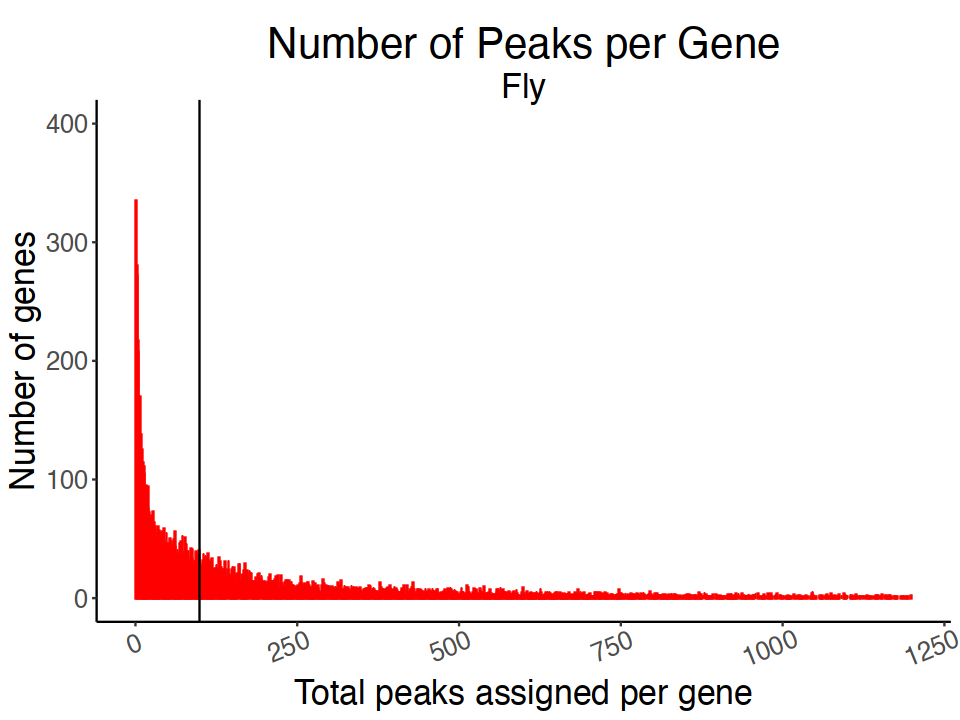

In [148]:
ggplot(peaks_per_gene, aes(x = tot_peaks)) +
geom_bar(color = "red") + xlim(0, 1200) + ylim(0, 400) +
theme_classic() + 
  labs(
    title = "Number of Peaks per Gene",
      subtitle = "Fly",
    x = "Total peaks assigned per gene",
    y = "Number of genes"
  ) +
geom_vline(aes(xintercept=median(tot_peaks)) ) +
# xlab("Number of peaks per experiment") +
# ylab("Stage") +
theme_classic() +
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = -1),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
    axis.text.x= element_text(size = 15, angle = 22, vjust = 0.9, hjust = 0.8), 
      axis.text.y= element_text(size = 15), axis.title= element_text(size = 20))

In [145]:
fs4b = ggplot(peaks_per_gene, aes(x = tot_peaks)) +
geom_bar(color = "red") + xlim(0, 1200) + ylim(0, 400) +
theme_classic() + 
  labs(
    title = "Number of Peaks per Gene",
      subtitle = "Fly",
    x = "Total peaks assigned per gene",
    y = "Number of genes"
  ) +
geom_vline(aes(xintercept=median(tot_peaks)) ) +
# xlab("Number of peaks per experiment") +
# ylab("Stage") +
theme_classic() +
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = -1),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
    axis.text.x= element_text(size = 15, angle = 22, vjust = 0.9, hjust = 0.8), 
      axis.text.y= element_text(size = 15), axis.title= element_text(size = 20))

In [150]:
pdf("figures/Supplemental_figure_4b_fly_peaks_ger_gene.pdf", width = 8, height = 6)
print(fs4b)
dev.off()

png("figures/Supplemental_figure_4b_fly_peaks_ger_gene.png", width = 800, height = 600)
print(fs4b)
dev.off()

jpeg("figures/Supplemental_figure_4b_fly_peaks_ger_gene.jpg", width = 800, height = 600)
print(fs4b)
dev.off()

Warning message:
“Removed 586 rows containing non-finite values (`stat_count()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”


pdf 
  2

Warning message:
“Removed 586 rows containing non-finite values (`stat_count()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”


pdf 
  2

Warning message:
“Removed 586 rows containing non-finite values (`stat_count()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”


pdf 
  2

In [139]:
median(peaks_per_gene$tot_peaks)

[1] 99

Warning message:
“Removed 586 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


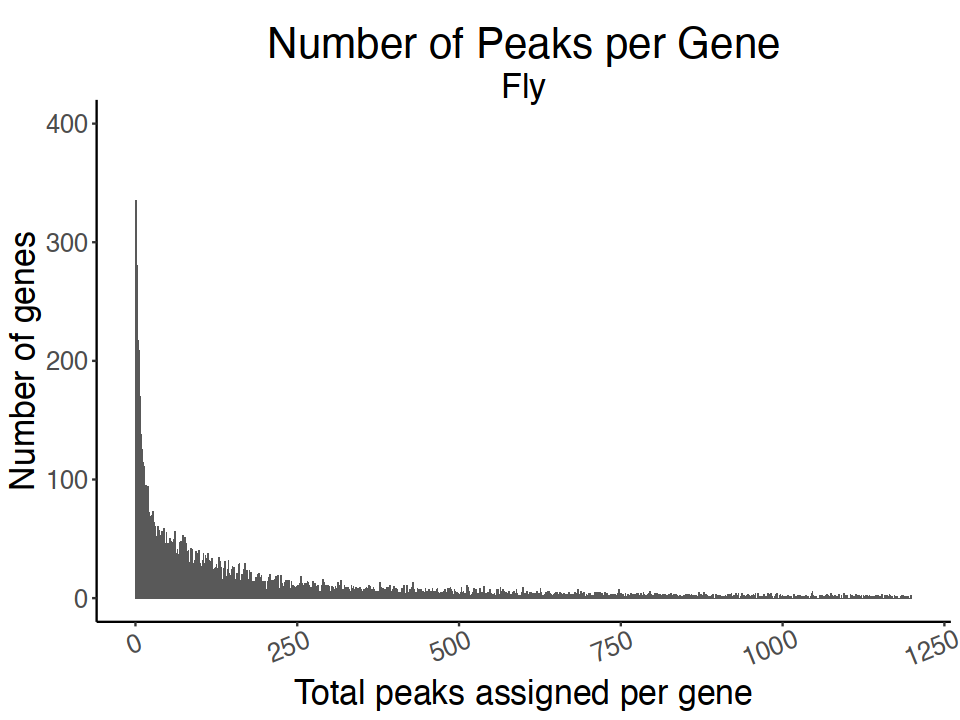

In [143]:
ggplot(peaks_per_gene, aes(x = tot_peaks)) +
geom_histogram(binwidth = 1) + xlim(0,1200) + ylim(0, 400) +
theme_classic() + 
  labs(
    title = "Number of Peaks per Gene",
      subtitle = "Fly",
    x = "Total peaks assigned per gene",
    y = "Number of genes"
  ) +
# xlab("Number of peaks per experiment") +
# ylab("Stage") +
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = -1),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
    axis.text.x= element_text(size = 15, angle = 22, vjust = 0.9, hjust = 0.8), 
      axis.text.y= element_text(size = 15), axis.title= element_text(size = 20))

In [142]:
peaks_per_gene  %>% filter(tot_peaks == 1)  %>% dim
peaks_per_gene  %>% filter(tot_peaks > 500)  %>% dim
peaks_per_gene  %>% filter(tot_peaks > 1000)  %>% dim
peaks_per_gene  %>% filter(tot_peaks > 2000)  %>% dim

[1] 335   2

[1] 2067    2

[1] 789   2

[1] 221   2

In [151]:
Sup_Figure4b = function(fly_peaks_TF){
    peaks_per_gene = fly_peaks_TF  %>% count(Gene)
    peaks_per_gene = peaks_per_gene  %>% rename("tot_peaks" = "n")
    
    median(peaks_per_gene$tot_peaks)
    options(repr.plot.width=8, repr.plot.height=6)
    
    fs4b = ggplot(peaks_per_gene, aes(x = tot_peaks)) +
geom_bar(color = "red") + xlim(0, 1200) + ylim(0, 400) +
theme_classic() + 
  labs(
    title = "Number of Peaks per Gene",
      subtitle = "Fly",
    x = "Total peaks assigned per gene",
    y = "Number of genes"
  ) +
geom_vline(aes(xintercept=median(tot_peaks)) ) +
# xlab("Number of peaks per experiment") +
# ylab("Stage") +
theme_classic() +
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = -1),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
    axis.text.x= element_text(size = 15, angle = 22, vjust = 0.9, hjust = 0.8), 
      axis.text.y= element_text(size = 15), axis.title= element_text(size = 20))
    
   pdf("figures/Supplemental_figure_4b_fly_peaks_ger_gene.pdf", width = 8, height = 6)
print(fs4b)
dev.off()

png("figures/Supplemental_figure_4b_fly_peaks_ger_gene.png", width = 800, height = 600)
print(fs4b)
dev.off()

jpeg("figures/Supplemental_figure_4b_fly_peaks_ger_gene.jpg", width = 800, height = 600)
print(fs4b)
dev.off() 
    
}

In [152]:
save(fly_peaks_TF, peaks_per_gene, fs4b, Sup_Figure4b, file = "data/fly_figure_suppl_4b.RData")

## Figure 6

In [167]:
p <- ggplot(fly_peaks_TF  %>% filter(targetDist > -2000 & targetDist < 2000), aes(x=targetDist, color = "firebrick")) + 
  geom_density(show.legend = FALSE, size = 1.5)+
geom_vline(xintercept=0, linetype="dashed") + 
     labs(title="Peak proximity to TSS target",x="Distance of peak from nearest TSS", y = "Density") +

theme_classic() +
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = -1),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
    axis.text.x= element_text(size = 15, angle = 22, vjust = 0.9, hjust = 0.8), 
      axis.text.y= element_text(size = 15), axis.title= element_text(size = 20))

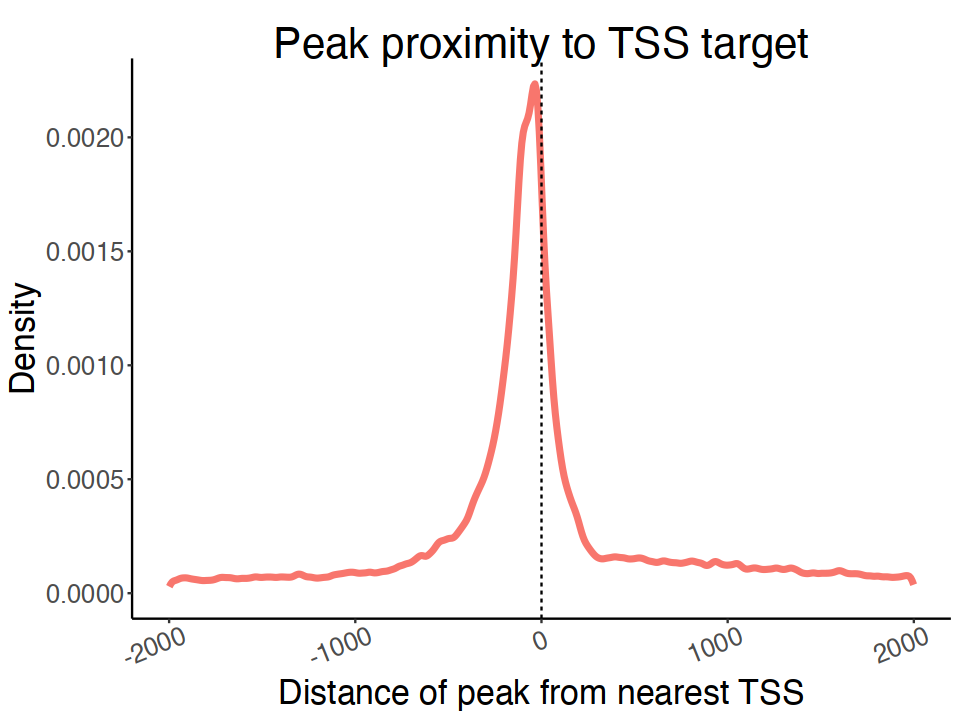

In [168]:
p

In [192]:
f6b = p

In [193]:
pdf("figures/Figure_6b_fly_peak_to_TSS_distance.pdf", width = 8, height = 6)
print(f6b)
dev.off()

png("figures/Figure_6b_fly_peak_to_TSS_distance.png", width = 800, height = 600)
print(f6b)
dev.off()

jpeg("figures/Figure_6b_fly_peak_to_TSS_distance.jpg", width = 800, height = 600)
print(f6b)
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2

In [169]:
ls()

[1] "cluster_nPeaks"           "cluster_nPeaks_genes"    
 [3] "df_stages"                "exp_matrix"              
 [5] "exp_matrix_mean"          "f1"                      
 [7] "f1d"                      "f2b"                     
 [9] "f2d"                      "figure1a"                
[11] "figure1d"                 "figure2b"                
[13] "figure2d"                 "Figure3_fly_violin"      
[15] "figures1d"                "fly_clusters"            
[17] "fly_intervals"            "fly_peak_spans"          
[19] "fly_peaks"                "fly_peaks_noM"           
[21] "fly_peaks_TF"             "fly_peaks_TF_old"        
[23] "fly_values"               "fs1a"                    
[25] "fs1c"                     "fs1d"                    
[27] "fs4b"                     "gene_max_mean_entropy"   
[29] "gt1lte8genes"             "gt277lte602genes"        
[31] "gt52lte277genes"          "gt602genes"              
[33] "gt8lte52genes"            "missing_genes"           
[35] "missing_genes_aliases"    "number"                  
[37] "p"                        "peak_signal"             
[39] "peaks_by_cluster_size"    "peaks_per_gene"          
[41] "Stage"                    "Sup_Figure4b"            
[43] "target_numbers"           "TSS_gene"                
[45] "TSS_gene2"                "vector_angle_emb_targets"

In [170]:
cluster_nPeaks_genes  %>% head

chromo start end   cluster        nPeaks sign apexS apexE color  
1 chr2L   5067  6211 2_narrowPeak1  26     .     5698  5702 0,0,255
2 chr2L   6384  7114 2_narrowPeak2   5     .     6763  6767 0,255,0
3 chr2L   7603  8313 2_narrowPeak3   7     .     7904  7908 255,0,0
4 chr2L   9142 10244 2_narrowPeak4   5     .     9561  9565 0,0,255
5 chr2L  11977 12413 Singleton_2719  1     .    12193 12197 0,0,0  
6 chr2L  12432 13096 Singleton_1168  1     .    12762 12766 0,0,0  
  Transcript     targetDist Gene  
1 l(2)gl-RC::3P  12870      l(2)gl
2 l(2)gl-RC::3P  11805      l(2)gl
3 l(2)gl-RC::3P  10664      l(2)gl
4 l(2)gl-RC::3P   9007      l(2)gl
5 l(2)gl-RC::E11  6375      l(2)gl
6 l(2)gl-RC::E10  5806      l(2)gl

In [176]:
cluster_nPeaks_genes = cluster_nPeaks_genes  %>% mutate(group =  ifelse(nPeaks == 1, "1",
                                        ifelse(nPeaks > 1 & nPeaks <=8, "2-8",
                                              ifelse(nPeaks > 8 & nPeaks <=52, "9-52",
                                                    ifelse(nPeaks > 52 & nPeaks <=277, "53-277",
                                                          ifelse(nPeaks > 277 & nPeaks <=602, "278-602",
                                                                ifelse(nPeaks > 602, "gt602", NA)))))))

In [177]:
cluster_nPeaks_genes  %>% head

chromo start end   cluster        nPeaks sign apexS apexE color  
1 chr2L   5067  6211 2_narrowPeak1  26     .     5698  5702 0,0,255
2 chr2L   6384  7114 2_narrowPeak2   5     .     6763  6767 0,255,0
3 chr2L   7603  8313 2_narrowPeak3   7     .     7904  7908 255,0,0
4 chr2L   9142 10244 2_narrowPeak4   5     .     9561  9565 0,0,255
5 chr2L  11977 12413 Singleton_2719  1     .    12193 12197 0,0,0  
6 chr2L  12432 13096 Singleton_1168  1     .    12762 12766 0,0,0  
  Transcript     targetDist Gene   group
1 l(2)gl-RC::3P  12870      l(2)gl 9-52 
2 l(2)gl-RC::3P  11805      l(2)gl 2-8  
3 l(2)gl-RC::3P  10664      l(2)gl 2-8  
4 l(2)gl-RC::3P   9007      l(2)gl 2-8  
5 l(2)gl-RC::E11  6375      l(2)gl 1    
6 l(2)gl-RC::E10  5806      l(2)gl 1

In [178]:
cluster_nPeaks_genes$group = factor(cluster_nPeaks_genes$group, 
                                   levels = c("1", "2-8", "9-52", "53-277", "278-602", "gt602"  ))

In [179]:
cluster_nPeaks_genes  %>% filter(is.na(group))  %>% head

chromo start end cluster nPeaks sign apexS apexE color Transcript
     targetDist Gene group

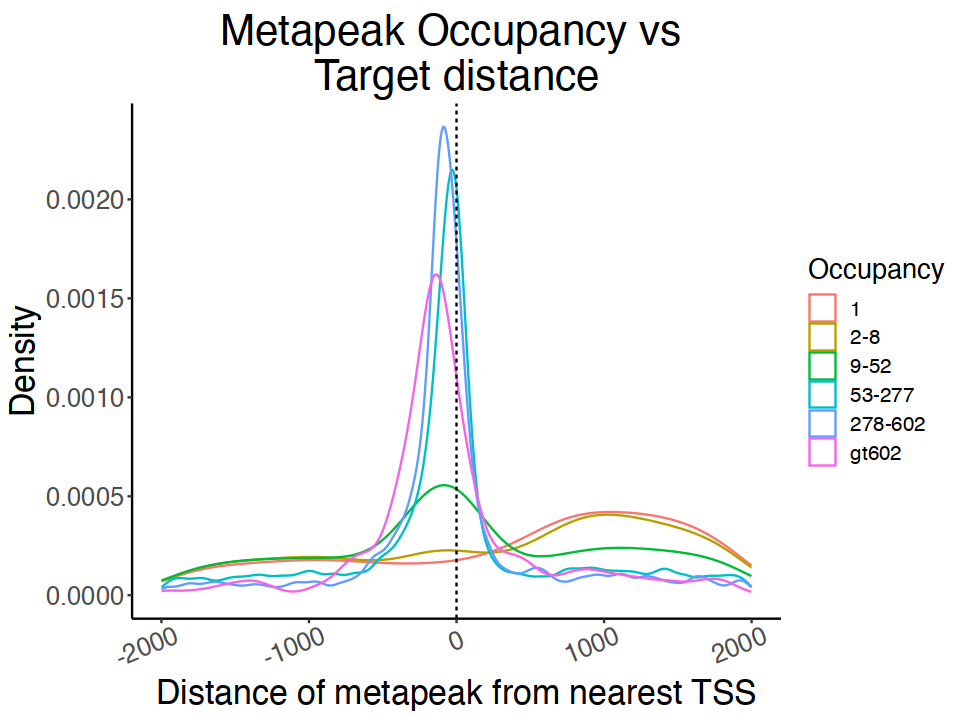

In [191]:
ggplot(cluster_nPeaks_genes %>% filter(targetDist > -2000 & targetDist < 2000 & !is.na(group)), aes(x=targetDist, color = group)) + 
  geom_density(adjust = 1.4) +
geom_vline(xintercept=0, linetype="dashed") + 
     labs(title="Metapeak Occupancy vs 
Target distance",x="Distance of metapeak from nearest TSS", 
          y = "Density", color = "Occupancy") +
theme_classic() +
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = 0.5),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
    axis.text.x= element_text(size = 15, angle = 22, vjust = 0.9, hjust = 0.8), 
      axis.text.y= element_text(size = 15), axis.title= element_text(size = 20),
     legend.title = element_text(size=16),
     legend.text = element_text(size=12),) 

In [196]:
f6d = ggplot(cluster_nPeaks_genes %>% filter(targetDist > -2000 & targetDist < 2000 & !is.na(group)), aes(x=targetDist, color = group)) + 
  geom_density(adjust = 1.4) +
geom_vline(xintercept=0, linetype="dashed") + 
     labs(title="Metapeak Occupancy vs 
Target distance",x="Distance of metapeak from nearest TSS", 
          y = "Density", color = "Occupancy") +
theme_classic() +
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = 0.5),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
    axis.text.x= element_text(size = 15, angle = 22, vjust = 0.9, hjust = 0.8), 
      axis.text.y= element_text(size = 15), axis.title= element_text(size = 20),
     legend.title = element_text(size=16),
     legend.text = element_text(size=12),)

In [197]:
pdf("figures/Figure_6d_fly_cluster_to_TSS_distance.pdf", width = 8, height = 6)
print(f6d)
dev.off()

png("figures/Figure_6d_fly_cluster_to_TSS_distance.png", width = 800, height = 600)
print(f6d)
dev.off()

jpeg("figures/Figure_6d_fly_cluster_to_TSS_distance.jpg", width = 800, height = 600)
print(f6d)
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2

In [198]:
Figure6bd_function= function(fly_peaks_TF){
    # plot of all peaks relative to TSS
    p <- ggplot(fly_peaks_TF  %>% filter(targetDist > -2000 & targetDist < 2000), aes(x=targetDist, color = "firebrick")) + 
  geom_density(show.legend = FALSE, size = 1.5)+
geom_vline(xintercept=0, linetype="dashed") + 
     labs(title="Peak proximity to TSS target",x="Distance of peak from nearest TSS", y = "Density") +

theme_classic() +
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = -1),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
    axis.text.x= element_text(size = 15, angle = 22, vjust = 0.9, hjust = 0.8), 
      axis.text.y= element_text(size = 15), axis.title= element_text(size = 20))

    # divide into groups
    
    cluster_nPeaks_genes = cluster_nPeaks_genes  %>% mutate(group =  ifelse(nPeaks == 1, "1",
                                        ifelse(nPeaks > 1 & nPeaks <=8, "2-8",
                                              ifelse(nPeaks > 8 & nPeaks <=52, "9-52",
                                                    ifelse(nPeaks > 52 & nPeaks <=277, "53-277",
                                                          ifelse(nPeaks > 277 & nPeaks <=602, "278-602",
                                                                ifelse(nPeaks > 602, "gt602", NA)))))))
f6d =     ggplot(cluster_nPeaks_genes %>% filter(targetDist > -2000 & targetDist < 2000 & !is.na(group)), aes(x=targetDist, color = group)) + 
  geom_density(adjust = 1.4) +
geom_vline(xintercept=0, linetype="dashed") + 
     labs(title="Metapeak Occupancy vs 
Target distance",x="Distance of metapeak from nearest TSS", 
          y = "Density", color = "Occupancy") +
theme_classic() +
theme(plot.title = element_text( size = 25, face = "bold", hjust = 0.5, vjust = 0.5),
      plot.subtitle = element_text( size = 20, face = "bold", hjust = 0.5, vjust = -1),
    axis.text.x= element_text(size = 15, angle = 22, vjust = 0.9, hjust = 0.8), 
      axis.text.y= element_text(size = 15), axis.title= element_text(size = 20),
     legend.title = element_text(size=16),
     legend.text = element_text(size=12),) 
    
    f6b = p 
    
    pdf("figures/Figure_6b_fly_peak_to_TSS_distance.pdf", width = 8, height = 6)
        print(f6b)
    dev.off()

png("figures/Figure_6b_fly_peak_to_TSS_distance.png", width = 800, height = 600)
    print(f6b)
dev.off()

jpeg("figures/Figure_6b_fly_peak_to_TSS_distance.jpg", width = 800, height = 600)
    print(f6b)
dev.off()
    
    pdf("figures/Figure_6d_fly_cluster_to_TSS_distance.pdf", width = 8, height = 6)
        print(f6d)
    dev.off()

png("figures/Figure_6d_fly_cluster_to_TSS_distance.png", width = 800, height = 600)
    print(f6d)
dev.off()

jpeg("figures/Figure_6d_fly_cluster_to_TSS_distance.jpg", width = 800, height = 600)
    print(f6d)
dev.off()
}

In [201]:
save(fly_peaks_TF, cluster_nPeaks_genes, f6b, f6d, Figure6bd_function, 
     file = "data/fly_figure_6bd.RData")

In [14]:
load("data/fly_figure_6bd.RData")

## clusters vs peak numbers per gene

In [16]:
cluster_nPeaks_genes  %>% count(cluster, Gene, nPeaks)  %>% 
    group_by(Gene)  %>% summarise(sum_peaks=sum(nPeaks))  %>% head
genes_peaks = cluster_nPeaks_genes  %>% count(cluster, Gene, nPeaks)  %>% 
    group_by(Gene)  %>% summarise(sum_peaks=sum(nPeaks)) 

Gene          sum_peaks
1 128up          191     
2 14-3-3epsilon  441     
3 14-3-3zeta     243     
4 140up            2     
5 18w           1730     
6 26-29-p        344

In [17]:
ls()

[1] "cluster_nPeaks_genes"      "eq1genes"                 
 [3] "f2b"                       "f6b"                      
 [5] "f6d"                       "figure2b"                 
 [7] "Figure6bd_function"        "fly_peaks_TF"             
 [9] "genes_peaks"               "gt1lte8genes"             
[11] "gt277lte602genes"          "gt52lte277genes"          
[13] "gt602genes"                "gt8lte52genes"            
[15] "metapeak_target_genes.fun" "peak_metapeak_function"   
[17] "peaks_by_cluster_size"     "target_numbers"

In [18]:
gene_clusters = cluster_nPeaks_genes  %>% count(Gene)
gene_clusters = gene_clusters  %>% rename(clusters = n)

In [19]:
gene_clusters_peaksum = left_join(gene_clusters, genes_peaks, by = "Gene")

In [351]:
ls()

[1] "cluster_nPeaks"                      
 [2] "cluster_nPeaks_genes"                
 [3] "entropy"                             
 [4] "eq1genes"                            
 [5] "exp_matrix"                          
 [6] "exp_matrix_mean"                     
 [7] "f2d"                                 
 [8] "figure2d"                            
 [9] "Figure3_fly_violin"                  
[10] "fly_intervals"                       
[11] "fly_peaks_TF"                        
[12] "fly_values"                          
[13] "g"                                   
[14] "gen"                                 
[15] "gen_exp"                             
[16] "gene_clusters"                       
[17] "gene_clusters_peaksum"               
[18] "gene_entropies"                      
[19] "gene_entropies_max_mean_median"      
[20] "gene_entropies_max_mean_median_group"
[21] "gene_max_mean_entropy"               
[22] "gene_max_mean_median"                
[23] "genes_peaks"                         
[24] "gt1lte8genes"                        
[25] "gt277lte602genes"                    
[26] "gt52lte277genes"                     
[27] "gt602genes"                          
[28] "gt8lte52genes"                       
[29] "metapeak_target_genes.fun"           
[30] "missing_genes"                       
[31] "missing_genes_aliases"               
[32] "new_environment"                     
[33] "p"                                   
[34] "peak_matrix_ids"                     
[35] "peak_metapeak_function"              
[36] "peaks_by_cluster_size"               
[37] "q"                                   
[38] "target_numbers"                      
[39] "temp"                                
[40] "temp2"                               
[41] "TSS_gene"                            
[42] "TSS_gene2"                           
[43] "vector_angle_emb_targets"

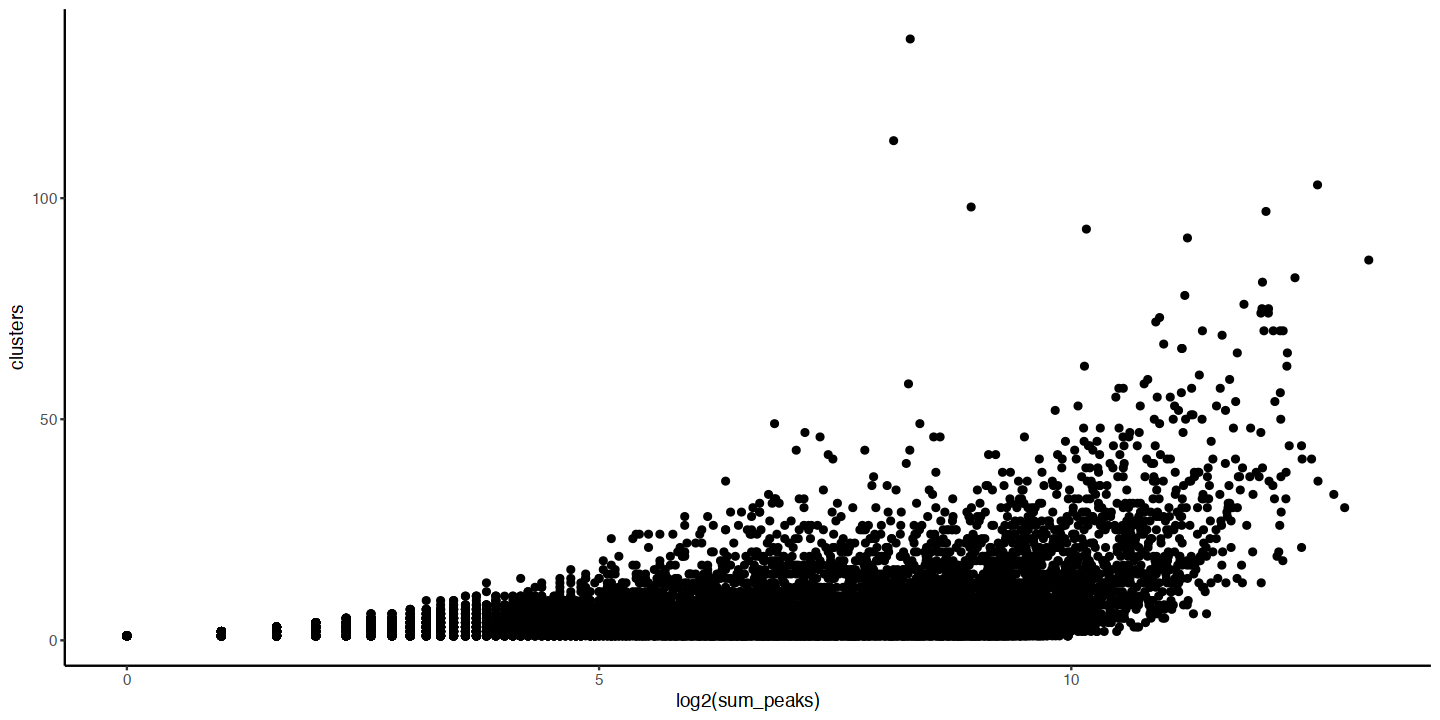

In [22]:
ggplot(gene_clusters_peaksum, aes(x = log2(sum_peaks), y = clusters))  +
geom_point() +
theme_classic()

In [58]:
r = ggplot(gene_clusters_peaksum, aes(x = log2(sum_peaks), y = clusters), label = Gene)  +
geom_point(color = "firebrick") +
        labs(title="Peaks vs metapeaks per target", x= "log2(Peaks per target)", y = "Metapeaks per target") +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5, 
        size = 30), axis.title = element_text(size = 25), axis.text = element_text(size = 21))

In [59]:
options(repr.plot.width=12, repr.plot.height=6)

In [24]:
library(ggrepel)

In [25]:
gene_clusters_peaksum   %>% filter(Gene == "bru1")

Gene clusters sum_peaks
1 bru1 58       310

In [60]:
r = r  + geom_text_repel(label = ifelse(gene_clusters_peaksum$clusters > 50 |
                                    log2(gene_clusters_peaksum$sum_peaks) > 12.7, 
                              gene_clusters_peaksum$Gene, NA), size = 6,
               hjust = 0, nudge_x = 0.05,
               check_overlap = TRUE)

Warning message in geom_text_repel(label = ifelse(gene_clusters_peaksum$clusters > :
“Ignoring unknown parameters: `check_overlap`”


Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12424 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 43 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


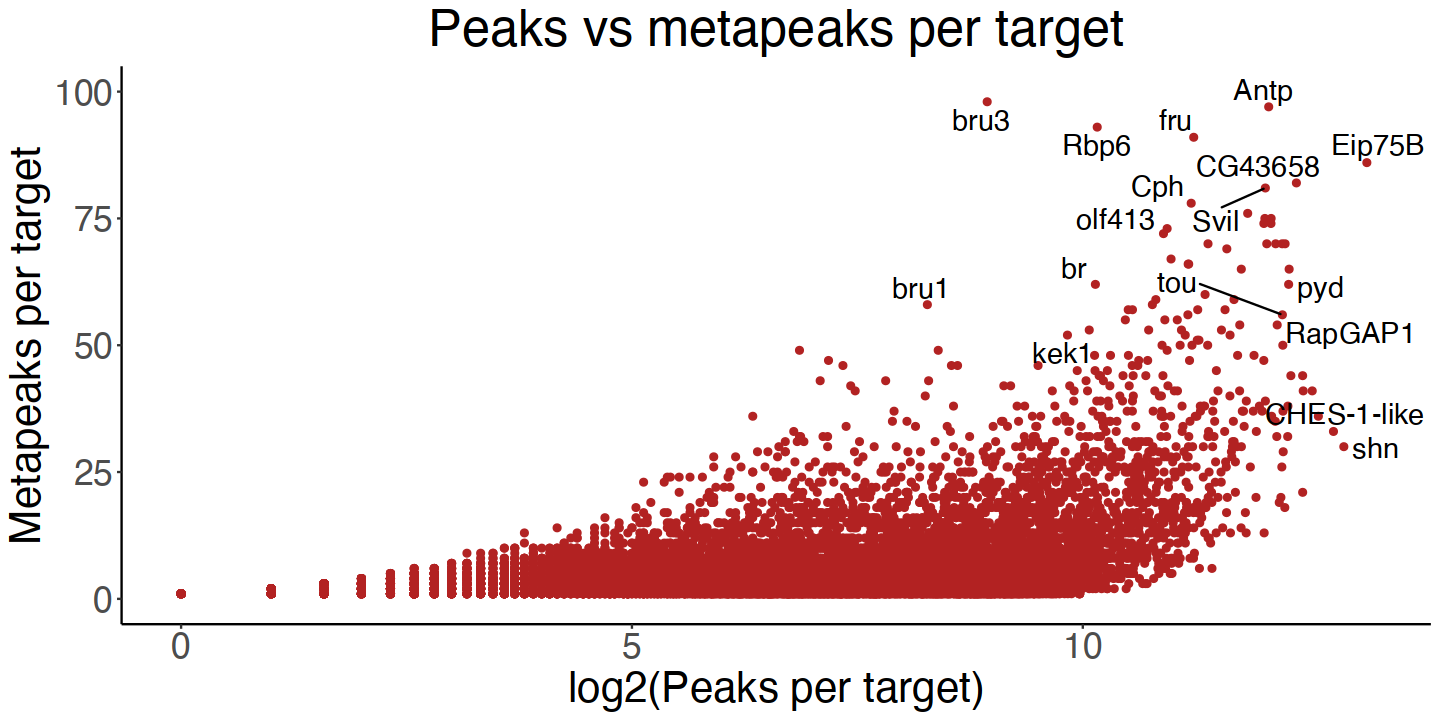

In [61]:
r + ylim(0, 100)

In [62]:
pdf("figures/Supplemental_Figure5b_fly_target_peaks_vs_metapeaks.pdf", width = 8, height = 6)
print(r + ylim(0, 100))
dev.off()

png("figures/Supplemental_Figure5b_fly_target_peaks_vs_metapeaks.png", width = 800, height = 600)
print(r + ylim(0, 100))
dev.off()

jpeg("figures/Supplemental_Figure5b_fly_target_peaks_vs_metapeaks.jpg", width = 800, height = 600)
print(r + ylim(0, 100))
dev.off()

Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12424 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 44 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


pdf 
  2

Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12424 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 27 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


pdf 
  2

Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12424 rows containing missing values (`geom_text_repel()`).”
Warning message:
“ggrepel: 27 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


pdf 
  2

In [373]:
fly_peaks_TF  %>% colnames

[1] "peakID"          "absDist"         "chromo.x"        "start.x"        
 [5] "end.x"           "exp"             "score"           "strand.x"       
 [9] "apexS.x"         "apexE.x"         "color.x"         "cluster"        
[13] "target"          "targetDist"      "chromo.y"        "start.y"        
[17] "end.y"           "nPeaks"          "strand.y"        "apexS.y"        
[21] "apexE.y"         "color.y"         "TranscriptCoord" "Transcript"     
[25] "TranscriptLoc"   "Gene"            "GeneLoc"         "GeneExons"      
[29] "TranscriptNo"    "UniqueGeneTSSs"  "GeneTranscripts" "TF"             
[33] "rank"            "group"

In [377]:
fly_peaks_TF  %>% count(Gene, UniqueGeneTSSs)  %>% dim
fly_peaks_TF  %>% count(Gene, UniqueGeneTSSs)   %>% arrange(-UniqueGeneTSSs)  %>% head(20)

[1] 13109     3

Gene       UniqueGeneTSSs n   
1  Svil       16             4282
2  CG12963    12              224
3  CG17574    12              672
4  SNF4Agamma 11             4780
5  mtd        11             2673
6  sgg        11             2591
7  CAP        10             2228
8  Pde8       10             1343
9  cnc        10             2808
10 mod(mdg4)  10              455
11 br          9             1132
12 dnc         9             4492
13 heph        9             1894
14 prage       9             2751
15 tmod        9             1967
16 CG32264     8             4344
17 Galphao     8              659
18 Moe         8             3309
19 Sh          8              305
20 Tlk         8             7196

In [29]:
complex_genes = (fly_peaks_TF  %>% count(Gene, UniqueGeneTSSs)   %>% 
                 arrange(-UniqueGeneTSSs)  %>% head(20))$Gene

In [64]:
t = ggplot(gene_clusters_peaksum, aes(x = log2(sum_peaks), y = clusters), label = Gene)  +
geom_point(aes(color = Gene %in% complex_genes), 
           size = ifelse(gene_clusters_peaksum$Gene %in% complex_genes, 2.5, 0.2),
          show.legend = FALSE) +
        labs(title="Genes with multiple TSS's", x= "log2(Peaks per target)", y = "Metapeaks per target") +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5, 
        size = 30), axis.title = element_text(size = 25), axis.text = element_text(size = 21))

In [65]:
t = t  + geom_text_repel(label = ifelse(
                                     gene_clusters_peaksum$Gene %in% complex_genes   , 
                              gene_clusters_peaksum$Gene, NA), size = 6,
               hjust = 0, nudge_x = 0.05,
               check_overlap = TRUE) # check_overlap = TRUE

Warning message in geom_text_repel(label = ifelse(gene_clusters_peaksum$Gene %in% :
“Ignoring unknown parameters: `check_overlap`”


Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12459 rows containing missing values (`geom_text_repel()`).”


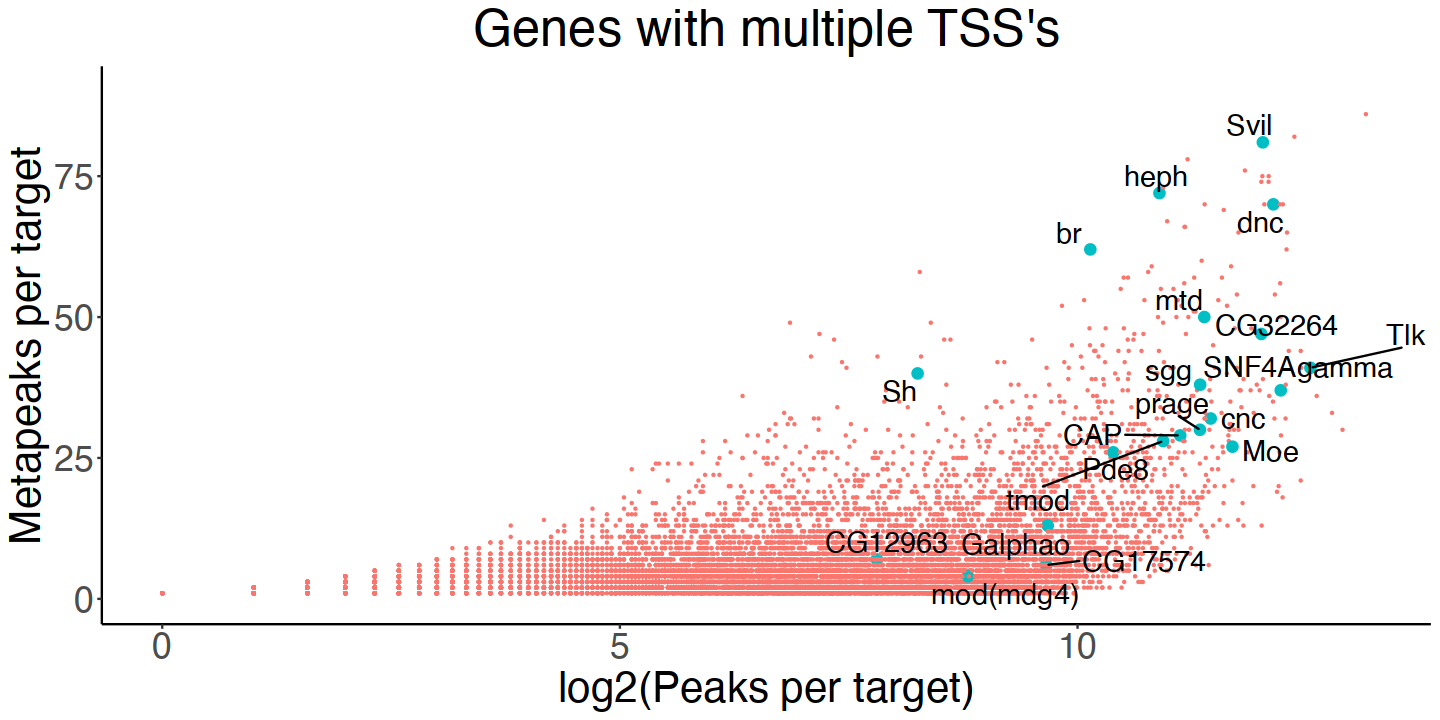

In [68]:
t + ylim(0,90)

In [71]:
pdf("figures/Supplemental_Figure5e_fly_TSS_target_peaks_vs_metapeaks.pdf", width = 8, height = 6)
print(t+ ylim(0,90))
dev.off()

png("figures/Supplemental_Figure5e_fly_TSS_target_peaks_vs_metapeaks.png", width = 800, height = 600)
print(t+ ylim(0,90))
dev.off()

jpeg("figures/Supplemental_Figure5e_fly_TSS_target_peaks_vs_metapeaks.jpg", width = 800, height = 600)
print(t+ ylim(0,90))
dev.off()

Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12459 rows containing missing values (`geom_text_repel()`).”


pdf 
  2

Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12459 rows containing missing values (`geom_text_repel()`).”


pdf 
  2

Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12459 rows containing missing values (`geom_text_repel()`).”


pdf 
  2

In [209]:
library(cowplot)

In [205]:
ls(pattern = "genes")

[1] "cluster_nPeaks_genes"  "genes_peaks"           "gt1lte8genes"         
[4] "gt277lte602genes"      "gt52lte277genes"       "gt602genes"           
[7] "gt8lte52genes"         "missing_genes"         "missing_genes_aliases"

### plots of metapeak groups

In [206]:
a = ggplot(gene_clusters_peaksum, aes(x = log2(sum_peaks), y = clusters))  +
geom_point(aes(color = Gene %in% gt602genes), size = 0.1) +
labs(color = "gt602") +
theme_classic()

b = ggplot(gene_clusters_peaksum, aes(x = log2(sum_peaks), y = clusters))  +
geom_point(aes(color = Gene %in% gt277lte602genes), size = 0.1) +
labs(color = "277_602") +
theme_classic()

c = ggplot(gene_clusters_peaksum, aes(x = log2(sum_peaks), y = clusters))  +
geom_point(aes(color = Gene %in% gt52lte277genes), size = 0.1) +
labs(color = "53_276") +
theme_classic()

d = ggplot(gene_clusters_peaksum, aes(x = log2(sum_peaks), y = clusters))  +
geom_point(aes(color = Gene %in% gt8lte52genes), size = 0.1) +
labs(color = "9_52") +
theme_classic()

e = ggplot(gene_clusters_peaksum, aes(x = log2(sum_peaks), y = clusters))  +
geom_point(aes(color = Gene %in% gt1lte8genes), size = 0.1) +
labs(color = "1_8") +
theme_classic()

In [207]:
options(repr.plot.width=10, repr.plot.height=6)

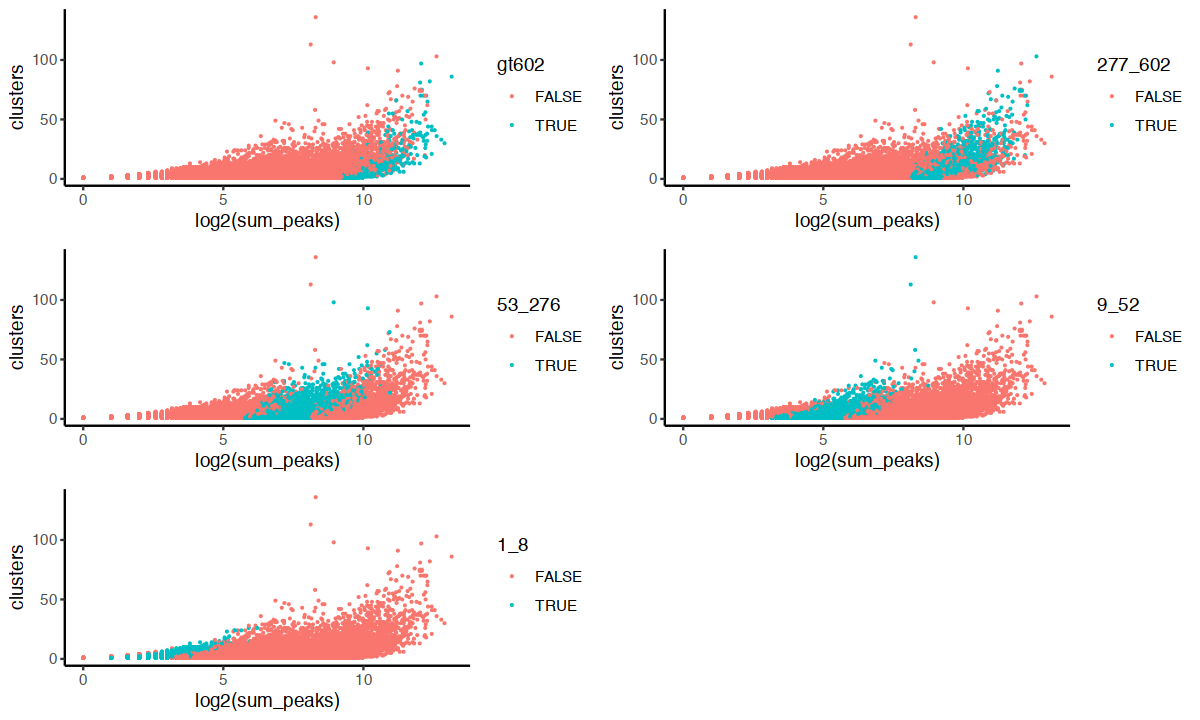

In [210]:
plot_grid(a, b, c, d, e,              # Draw grid of plots
          ncol = 2,
          align = "v")

In [43]:
ls()

[1] "cluster_nPeaks"            "cluster_nPeaks_genes"     
 [3] "eq1genes"                  "exp_matrix"               
 [5] "exp_matrix_mean"           "f2d"                      
 [7] "figure2d"                  "Figure3_fly_violin"       
 [9] "fly_intervals"             "fly_peaks_TF"             
[11] "fly_values"                "gene_max_mean_entropy"    
[13] "gt1lte8genes"              "gt277lte602genes"         
[15] "gt52lte277genes"           "gt602genes"               
[17] "gt8lte52genes"             "metapeak_target_genes.fun"
[19] "missing_genes"             "missing_genes_aliases"    
[21] "new_environment"           "peak_metapeak_function"   
[23] "peaks_by_cluster_size"     "target_numbers"           
[25] "TSS_gene"                  "TSS_gene2"                
[27] "vector_angle_emb_targets"

In [44]:
colnames(exp_matrix)

[1] "Malpighian_tubule_6_8"                   
  [2] "unknown_6_8"                             
  [3] "Malpighian_tubule_16_18"                 
  [4] "amnioserosa_12_14"                       
  [5] "yolk_nuclei_12_14"                       
  [6] "amnioserosa_10_12"                       
  [7] "plasmatocytes_14_16"                     
  [8] "yolk_nuclei_14_16"                       
  [9] "salivary_gland_12_14"                    
 [10] "plasmatocytes_12_14"                     
 [11] "salivary_gland_10_12"                    
 [12] "tracheal_primordium_6_8"                 
 [13] "yolk_nuclei_16_18"                       
 [14] "foregut_/_hindgut_/_anal_pad_12_14"      
 [15] "salivary_gland_14_16"                    
 [16] "salivary_gland_body_primordium_8_10"     
 [17] "yolk_nuclei_2_4"                         
 [18] "fat_body_16_18"                          
 [19] "muscle_14_16"                            
 [20] "muscle_8_10"                             
 [21] "tracheal_system_16_18"                   
 [22] "plasmatocytes_16_18"                     
 [23] "glia_12_14"                              
 [24] "spiracles_(tracheal_system)_12_14"       
 [25] "crystal_cell_10_12"                      
 [26] "amnioserosa_8_10"                        
 [27] "tracheal_system_14_16"                   
 [28] "amnioserosa_14_16"                       
 [29] "tracheal_primordium_4_6"                 
 [30] "proventriculus_14_16"                    
 [31] "glia_10_12"                              
 [32] "visceral_muscle_12_14"                   
 [33] "proventriculus_12_14"                    
 [34] "sensory_nervous_system_16_18"            
 [35] "Malpighian_tubule_12_14"                 
 [36] "somatic_muscle_16_18"                    
 [37] "yolk_nuclei_4_6"                         
 [38] "midline_primordium_8_10"                 
 [39] "hindgut_/_anal_pad_12_14"                
 [40] "spiracle_(tracheal_system)_14_16"        
 [41] "yolk_nuclei_10_12"                       
 [42] "sensory_nervous_system_14_16"            
 [43] "fat_body_12_14"                          
 [44] "ventral_nerve_cord_14_16"                
 [45] "yolk_nuclei_8_10"                        
 [46] "tracheal_system_12_14"                   
 [47] "fat_body_10_12"                          
 [48] "foregut_/_hindgut_/_anal_pad_14_16"      
 [49] "yolk_nuclei_6_8"                         
 [50] "plasmatocytes_10_12"                     
 [51] "fat_body_14_16"                          
 [52] "foregut_/_hindgut_primordium_6_8"        
 [53] "sensory_nervous_system_12_14"            
 [54] "hindgut_/_anal_pad_10_12"                
 [55] "sensory_nervous_system_primordium_10_12" 
 [56] "foregut_/_hindgut_/_anal_pad_16_18"      
 [57] "sensory_nervous_system_primordium_6_8"   
 [58] "foregut_/_hindgut_primordium_4_6"        
 [59] "amnioserosa_6_8"                         
 [60] "muscle_16_18"                            
 [61] "somatic_muscle_14_16"                    
 [62] "midgut_12_14"                            
 [63] "salivary_gland_primordium_6_8"           
 [64] "midline_primordium_6_8"                  
 [65] "somatic_muscle_12_14"                    
 [66] "hindgut_primordium_8_10"                 
 [67] "amnioserosa_4_6"                         
 [68] "midgut_primordium_8_10"                  
 [69] "plasmatocytes_anlage_8_10"               
 [70] "trunk_mesoderm_primordium_6_8"           
 [71] "midgut_14_16"                            
 [72] "midgut_16_18"                            
 [73] "muscle_10_12"                            
 [74] "peripheral_nervous_system_8_10"          
 [75] "ectoderm_anlage_in_statu_nascendi_2_4"   
 [76] "ventral_nerve_cord_12_14"                
 [77] "procrystal_cell_8_10"                    
 [78] "germ_cell_8_10"                          
 [79] "ectoderm_anlage_2_4"                     
 [80] "epidermis_14_16"                         
 [81] "ventral_nerve_cord_primordium_4_6"       
 [82] "anlage_in_statu_nascendi_2

In [45]:
ls()

[1] "cluster_nPeaks"            "cluster_nPeaks_genes"     
 [3] "eq1genes"                  "exp_matrix"               
 [5] "exp_matrix_mean"           "f2d"                      
 [7] "figure2d"                  "Figure3_fly_violin"       
 [9] "fly_intervals"             "fly_peaks_TF"             
[11] "fly_values"                "gene_max_mean_entropy"    
[13] "gt1lte8genes"              "gt277lte602genes"         
[15] "gt52lte277genes"           "gt602genes"               
[17] "gt8lte52genes"             "metapeak_target_genes.fun"
[19] "missing_genes"             "missing_genes_aliases"    
[21] "new_environment"           "peak_metapeak_function"   
[23] "peaks_by_cluster_size"     "target_numbers"           
[25] "TSS_gene"                  "TSS_gene2"                
[27] "vector_angle_emb_targets"

## Figure 7 
### get entropy for new annotations

In [40]:
    entropy <- function(x){
      s <- sum(x)
      g <- 0
      for (i in 1:length(x)){
        if (x[i]!=0){
          p <- x[i]/s
          g <- g - p*log2(p)
        }
      }
       return(g)
        }

In [30]:
# should get matrix updated with latest gene names
peak_matrix_ids = readRDS("data/fly_gene_name_translations.rds")

In [133]:
head(peak_matrix_ids)

Submitted_ID_matrix FBID_key_matrix Annotation_symbol_matrix Symbol_matrix
1 Muc26B              FBgn0040950     CG13990                  Muc26B       
2 CG7017              FBgn0036951     CG7017                   CG7017       
3 CG11300             FBgn0034901     CG11300                  CG11300      
4 Muc96D              FBgn0051439     CG31439                  Muc96D       
5 CG7409              FBgn0035817     CG7409                   CG7409       
6 CG11370             FBgn0037181     CG11370                  CG11370      
  Submitted_ID_peak Annotation_symbol_peak Symbol_peak
1 Muc26B            CG13990                Muc26B     
2 CG7017            CG7017                 CG7017     
3 CG11300           CG11300                CG11300    
4 Muc96D            CG31439                Muc96D     
5 CG7409            CG7409                 CG7409     
6 CG11370           CG11370                CG11370

In [163]:
peak_matrix_ids  %>% filter(Submitted_ID_matrix == "CG14421")

Submitted_ID_matrix FBID_key_matrix Annotation_symbol_matrix Symbol_matrix
1 CG14421             FBgn0029644     CG14421                  CG14421      
  Submitted_ID_peak Annotation_symbol_peak Symbol_peak
1 NA                NA                     NA

In [164]:
peak_matrix_ids  %>% filter(FBID_key_matrix == "FBgn0029644")
## These are just genes that have no peak associated with them!!

Submitted_ID_matrix FBID_key_matrix Annotation_symbol_matrix Symbol_matrix
1 CG14421             FBgn0029644     CG14421                  CG14421      
  Submitted_ID_peak Annotation_symbol_peak Symbol_peak
1 NA                NA                     NA

In [168]:
peak_matrix_ids  %>% filter(Submitted_ID_matrix != Submitted_ID_peak)  %>% head
peak_matrix_ids  %>% filter(Symbol_peak != Submitted_ID_peak)  %>% head

Submitted_ID_matrix FBID_key_matrix Annotation_symbol_matrix Symbol_matrix
1 CG42255             FBgn0259140     CG42255                  Cubn2        
2 Ipod                FBgn0030187     CG2961                   CG2961       
3 CG11852             FBgn0039297     CG11852                  Jhbp7        
4 CG42235             FBgn0250757     CG42235                  kumpel       
5 CG31324             FBgn0051324     CG31324                  Cipc         
6 CG9492              FBgn0287844     CG9492                   Dhc1         
  Submitted_ID_peak Annotation_symbol_peak Symbol_peak
1 Cubn2             CG42255                Cubn2      
2 CG2961            CG2961                 CG2961     
3 Jhbp7             CG11852                Jhbp7      
4 kumpel            CG42235                kumpel     
5 Cipc              CG31324                Cipc       
6 Dhc1              CG9492                 Dhc1

Submitted_ID_matrix FBID_key_matrix Annotation_symbol_matrix Symbol_matrix
1 Parp                FBgn0010247     CG40411                  Parp1        
2 Unc-89              FBgn0053519     CG33519                  Obsc         
3 CG9336              FBgn0032897     CG9336                   bero         
4 CG14850             FBgn0038239     CG14850                  Jig          
5 CG4341              FBgn0028481     CG4341                   Tmtc2        
6 CG31690             FBgn0051690     CG31690                  Tmtc1        
  Submitted_ID_peak Annotation_symbol_peak Symbol_peak
1 Parp              CG40411                Parp1      
2 Unc-89            CG33519                Obsc       
3 CG9336            CG9336                 bero       
4 CG14850           CG14850                Jig        
5 CG4341            CG4341                 Tmtc2      
6 CG31690           CG31690                Tmtc1

In [171]:
fly_peaks_TF  %>% filter(Gene == "Parp")  %>% head

peakID                                              absDist chromo.x start.x
1 amos_amos-GFP_embryonic_1chr3R3488691:3489051       98183   chr3R    3488691
2 amos_amos-GFP_embryonic_1chr3R3507276:3507636       79598   chr3R    3507276
3 ase_ase-GFP_embryonic_1chr3R3525187:3525511         61705   chr3R    3525187
4 CG10209_CG10209-GFP_embryonic_1chr3R3586191:3586795   561   chr3R    3586191
5 CG1024_CG1024-GFP_embryonic_1chr3R3587003:3587197      64   chr3R    3587003
6 CG1024_CG1024-GFP_embryonic_1chr3R3589700:3589980    2786   chr3R    3589700
  end.x   exp                             score strand.x apexS.x apexE.x ⋯
1 3489051 amos_amos-GFP_embryonic_1       1000  .        3488869 3488873 ⋯
2 3507636 amos_amos-GFP_embryonic_1        869  .        3507454 3507458 ⋯
3 3525511 ase_ase-GFP_embryonic_1          846  .        3525347 3525351 ⋯
4 3586795 CG10209_CG10209-GFP_embryonic_1 1000  .        3586491 3586495 ⋯
5 3587197 CG1024_CG1024-GFP_embryonic_1   1000  .        3587116 3587120 ⋯
6 3589980 CG1024_CG1024-GFP_embryonic_1   1000  .        3589838 3589842 ⋯
  TranscriptLoc Gene GeneLoc GeneExons TranscriptNo UniqueGeneTSSs
1 I4            Parp I4      6         1            1             
2 I4            Parp I4      6         1            1             
3 I3            Parp I3      6         1            1             
4 I1            Parp I1      6         1            1             
5 5P            Parp 5P      6         1            1             
6 5P            Parp 5P      6         1            1             
  GeneTranscripts TF      rank       group
1 1               amos    0.32730375 1    
2 1               amos    0.05170648 2-8  
3 1               ase     0.22855785 1    
4 1               CG10209 0.38504326 9-52 
5 1               CG1024  0.95240481 9-52 
6 1               CG1024  0.46593186 2-8

In [31]:
# get new annotation matrix
exp_matrix = readRDS("data/fly_exp_matrix_renamed_and_clean_with_83_cell_types.rds")

In [179]:
dim(exp_matrix)

[1] 13938    84

In [256]:
head(exp_matrix)
## already has gene as column name

gene    unknown_6 Proventriculus_2 Salivary gland_LS Chordotonal_organ
1 CG8543  8323.252      0.000000        0.000          0.000000         
2 Muc26B     0.000  14956.568454        0.000          1.534719         
3 CG8541  6753.090      6.952266        0.000          0.000000         
4 CG7017     0.000  17391.927411        0.000          0.000000         
5 CG11300    0.000     34.451175     5447.174          0.000000         
6 Muc96D     0.000   9272.905108        0.000          0.000000         
  Neuron_unknown_2 Epidermal_epithelium Oenocytes Salivary_gland unknown_5 ⋯
1 0.000000         0.000000             0           0.00000      0.000000  ⋯
2 0.000000         5.259631             0          42.56225      7.335896  ⋯
3 0.000000         0.000000             0           0.00000      0.000000  ⋯
4 0.000000         5.411271             0         225.97027      0.000000  ⋯
5 0.000000         0.000000             0           0.00000      0.000000  ⋯
6 3.161056         2.046166             0           0.00000      0.000000  ⋯
  Foregut_primordium Posterior_Midgut_1 Procuticle Muscle_system_2 Epidermis
1 3.615198           0.000000            8.178313  0.0000000       0.4276581
2 0.000000           1.945836            5.018291  0.0000000       2.9945126
3 0.000000           0.000000           12.689952  0.0000000       0.0987046
4 0.000000           0.000000           14.311693  0.0000000       5.2607380
5 0.000000           0.000000            1.745841  0.7951199       0.7500649
6 6.578303           2.052823            3.163256  5.1062252       6.8629948
  Progenitor_cells_2 Embryonic_body_wall NotAssigned Progenitor_cells_3
1 0.000000            0.4221053           3.3844287   0.000000         
2 0.452212            6.6762421           6.4279176   5.431109         
3 0.000000            0.5549925           3.4481102   0.000000         
4 5.856407           20.6837855           6.9324405  13.777860         
5 1.343728            0.8547741           0.4573122   2.990938         
6 0.000000            3.6418497          14.3259715   1.311223         
  Progenitor_cells_1
1  0.0000000        
2  6.0794457        
3  0.0000000        
4 13.4207282        
5  0.7788249        
6  2.4276240

In [257]:
exp_matrix  %>%  filter(gene == "CG42255")
## This is an old name and still present in this version

gene    unknown_6 Proventriculus_2 Salivary gland_LS Chordotonal_organ
1 CG42255 0         0                0                 0                
  Neuron_unknown_2 Epidermal_epithelium Oenocytes Salivary_gland unknown_5 ⋯
1 0                2.093742             0         59.90894       1.015278  ⋯
  Foregut_primordium Posterior_Midgut_1 Procuticle Muscle_system_2 Epidermis
1 0                  20.73447           8.992468   2.72893         10.11743 
  Progenitor_cells_2 Embryonic_body_wall NotAssigned Progenitor_cells_3
1 5.857839           6.453571            8.525728    8.411337          
  Progenitor_cells_1
1 4.830195

In [258]:
rm(temp)

In [32]:
# exp_matrix = rownames_to_column(as.data.frame(exp_matrix), var = "gene")
temp = left_join(exp_matrix, peak_matrix_ids %>% select(Submitted_ID_matrix, FBID_key_matrix, 
                                                        Submitted_ID_peak), 
          by = c("gene" = "Submitted_ID_matrix"))




In [33]:
temp  %>% head

gene    unknown_6 Proventriculus_2 Salivary gland_LS Chordotonal_organ
1 CG8543  8323.252      0.000000        0.000          0.000000         
2 Muc26B     0.000  14956.568454        0.000          1.534719         
3 CG8541  6753.090      6.952266        0.000          0.000000         
4 CG7017     0.000  17391.927411        0.000          0.000000         
5 CG11300    0.000     34.451175     5447.174          0.000000         
6 Muc96D     0.000   9272.905108        0.000          0.000000         
  Neuron_unknown_2 Epidermal_epithelium Oenocytes Salivary_gland unknown_5 ⋯
1 0.000000         0.000000             0           0.00000      0.000000  ⋯
2 0.000000         5.259631             0          42.56225      7.335896  ⋯
3 0.000000         0.000000             0           0.00000      0.000000  ⋯
4 0.000000         5.411271             0         225.97027      0.000000  ⋯
5 0.000000         0.000000             0           0.00000      0.000000  ⋯
6 3.161056         2.046166             0           0.00000      0.000000  ⋯
  Procuticle Muscle_system_2 Epidermis Progenitor_cells_2 Embryonic_body_wall
1  8.178313  0.0000000       0.4276581 0.000000            0.4221053         
2  5.018291  0.0000000       2.9945126 0.452212            6.6762421         
3 12.689952  0.0000000       0.0987046 0.000000            0.5549925         
4 14.311693  0.0000000       5.2607380 5.856407           20.6837855         
5  1.745841  0.7951199       0.7500649 1.343728            0.8547741         
6  3.163256  5.1062252       6.8629948 0.000000            3.6418497         
  NotAssigned Progenitor_cells_3 Progenitor_cells_1 FBID_key_matrix
1  3.3844287   0.000000           0.0000000         FBgn0035787    
2  6.4279176   5.431109           6.0794457         FBgn0040950    
3  3.4481102   0.000000           0.0000000         FBgn0035788    
4  6.9324405  13.777860          13.4207282         FBgn0036951    
5  0.4573122   2.990938           0.7788249         FBgn0034901    
6 14.3259715   1.311223           2.4276240         FBgn0051439    
  Submitted_ID_peak
1 CG8543           
2 Muc26B           
3 CG8541           
4 CG7017           
5 CG11300          
6 Muc96D

In [34]:
temp  %>% count(Submitted_ID_peak)  %>% arrange(-n)  %>% head
temp  %>% filter(!is.na(Submitted_ID_peak) & gene != Submitted_ID_peak)  %>%  head

Submitted_ID_peak n  
1 NA                858
2 128up               1
3 14-3-3epsilon       1
4 14-3-3zeta          1
5 140up               1
6 18w                 1

gene    unknown_6 Proventriculus_2 Salivary gland_LS Chordotonal_organ
1 CG42255   0.0000    0.00000          0.00000           0.00000        
2 Ipod    819.0034  602.79980         29.26826         257.01569        
3 CG11852 191.1315    0.00000         38.75069          33.05874        
4 CG42235   0.0000   27.38521         20.81469           0.00000        
5 CG31324 310.9803  106.94224        422.00831         157.99501        
6 CG9492    0.0000    0.00000          0.00000         173.44614        
  Neuron_unknown_2 Epidermal_epithelium Oenocytes  Salivary_gland unknown_5  ⋯
1   0.00000          2.0937421             0.00000  59.90894        1.015278 ⋯
2  47.53079        167.7074091           201.81754 570.44956      461.932563 ⋯
3 823.74823        333.3602203             0.00000  18.42028      105.643479 ⋯
4   0.00000          2.2905729             0.00000   0.00000       12.413108 ⋯
5 195.52270        178.0303720          1101.04006 175.48383      292.597109 ⋯
6  17.31512          0.9268347            14.46048   0.00000       53.044585 ⋯
  Procuticle  Muscle_system_2 Epidermis   Progenitor_cells_2
1    8.992468   2.72893         10.117433   5.85783869      
2 1434.628162 112.22655       1221.067282 178.10876865      
3    0.000000   0.00000          2.593080   0.00000000      
4    0.000000   0.00000          2.564752   7.71007594      
5   50.480273 132.56281        110.842253  38.30056199      
6    0.000000   0.00000          1.627955   0.08750897      
  Embryonic_body_wall NotAssigned Progenitor_cells_3 Progenitor_cells_1
1    6.453571           8.5257284   8.4113367          4.8301953       
2 1166.993056         487.3240618 217.4370433        201.2748485       
3    1.082918           0.9657486   0.5849420          0.1967298       
4    2.483893           1.5069665   0.2740865          1.5514198       
5   45.786674         105.1947199  56.7903012         35.6911835       
6    3.254871           7.8955010   2.1666319          1.3513001       
  FBID_key_matrix Submitted_ID_peak
1 FBgn0259140     Cubn2            
2 FBgn0030187     CG2961           
3 FBgn0039297     Jhbp7            
4 FBgn0250757     kumpel           
5 FBgn0051324     Cipc             
6 FBgn0287844     Dhc1

In [35]:
temp2 = temp  %>% mutate(Submitted_combined = 
                            ifelse(is.na(temp$Submitted_ID_peak), gene, 
                                   ifelse(Submitted_ID_peak != gene, Submitted_ID_peak, gene)))

In [36]:
temp2  %>% filter(!is.na(Submitted_ID_peak) & gene != Submitted_ID_peak)  %>%  head
temp2  %>% filter(!is.na(Submitted_ID_peak) & gene == Submitted_ID_peak)  %>%  head
temp2  %>% filter(is.na(Submitted_ID_peak))  %>% head

gene    unknown_6 Proventriculus_2 Salivary gland_LS Chordotonal_organ
1 CG42255   0.0000    0.00000          0.00000           0.00000        
2 Ipod    819.0034  602.79980         29.26826         257.01569        
3 CG11852 191.1315    0.00000         38.75069          33.05874        
4 CG42235   0.0000   27.38521         20.81469           0.00000        
5 CG31324 310.9803  106.94224        422.00831         157.99501        
6 CG9492    0.0000    0.00000          0.00000         173.44614        
  Neuron_unknown_2 Epidermal_epithelium Oenocytes  Salivary_gland unknown_5  ⋯
1   0.00000          2.0937421             0.00000  59.90894        1.015278 ⋯
2  47.53079        167.7074091           201.81754 570.44956      461.932563 ⋯
3 823.74823        333.3602203             0.00000  18.42028      105.643479 ⋯
4   0.00000          2.2905729             0.00000   0.00000       12.413108 ⋯
5 195.52270        178.0303720          1101.04006 175.48383      292.597109 ⋯
6  17.31512          0.9268347            14.46048   0.00000       53.044585 ⋯
  Muscle_system_2 Epidermis   Progenitor_cells_2 Embryonic_body_wall
1   2.72893         10.117433   5.85783869          6.453571        
2 112.22655       1221.067282 178.10876865       1166.993056        
3   0.00000          2.593080   0.00000000          1.082918        
4   0.00000          2.564752   7.71007594          2.483893        
5 132.56281        110.842253  38.30056199         45.786674        
6   0.00000          1.627955   0.08750897          3.254871        
  NotAssigned Progenitor_cells_3 Progenitor_cells_1 FBID_key_matrix
1   8.5257284   8.4113367          4.8301953        FBgn0259140    
2 487.3240618 217.4370433        201.2748485        FBgn0030187    
3   0.9657486   0.5849420          0.1967298        FBgn0039297    
4   1.5069665   0.2740865          1.5514198        FBgn0250757    
5 105.1947199  56.7903012         35.6911835        FBgn0051324    
6   7.8955010   2.1666319          1.3513001        FBgn0287844    
  Submitted_ID_peak Submitted_combined
1 Cubn2             Cubn2             
2 CG2961            CG2961            
3 Jhbp7             Jhbp7             
4 kumpel            kumpel            
5 Cipc              Cipc              
6 Dhc1              Dhc1

gene    unknown_6 Proventriculus_2 Salivary gland_LS Chordotonal_organ
1 CG8543  8323.252      0.000000        0.000          0.000000         
2 Muc26B     0.000  14956.568454        0.000          1.534719         
3 CG8541  6753.090      6.952266        0.000          0.000000         
4 CG7017     0.000  17391.927411        0.000          0.000000         
5 CG11300    0.000     34.451175     5447.174          0.000000         
6 Muc96D     0.000   9272.905108        0.000          0.000000         
  Neuron_unknown_2 Epidermal_epithelium Oenocytes Salivary_gland unknown_5 ⋯
1 0.000000         0.000000             0           0.00000      0.000000  ⋯
2 0.000000         5.259631             0          42.56225      7.335896  ⋯
3 0.000000         0.000000             0           0.00000      0.000000  ⋯
4 0.000000         5.411271             0         225.97027      0.000000  ⋯
5 0.000000         0.000000             0           0.00000      0.000000  ⋯
6 3.161056         2.046166             0           0.00000      0.000000  ⋯
  Muscle_system_2 Epidermis Progenitor_cells_2 Embryonic_body_wall NotAssigned
1 0.0000000       0.4276581 0.000000            0.4221053           3.3844287 
2 0.0000000       2.9945126 0.452212            6.6762421           6.4279176 
3 0.0000000       0.0987046 0.000000            0.5549925           3.4481102 
4 0.0000000       5.2607380 5.856407           20.6837855           6.9324405 
5 0.7951199       0.7500649 1.343728            0.8547741           0.4573122 
6 5.1062252       6.8629948 0.000000            3.6418497          14.3259715 
  Progenitor_cells_3 Progenitor_cells_1 FBID_key_matrix Submitted_ID_peak
1  0.000000           0.0000000         FBgn0035787     CG8543           
2  5.431109           6.0794457         FBgn0040950     Muc26B           
3  0.000000           0.0000000         FBgn0035788     CG8541           
4 13.777860          13.4207282         FBgn0036951     CG7017           
5  2.990938           0.7788249         FBgn0034901     CG11300          
6  1.311223           2.4276240         FBgn0051439     Muc96D           
  Submitted_combined
1 CG8543            
2 Muc26B            
3 CG8541            
4 CG7017            
5 CG11300           
6 Muc96D

gene    unknown_6  Proventriculus_2 Salivary gland_LS Chordotonal_organ
1 CG13040 1924.29259  0.0000          0                   0.000          
2 CG14421    0.00000  0.0000          0                 318.425          
3 CG32453    6.98051 61.2454          0                   0.000          
4 CG14422    0.00000  0.0000          0                   0.000          
5 CG34447    0.00000  0.0000          0                   0.000          
6 CG43666    0.00000  0.0000          0                   0.000          
  Neuron_unknown_2 Epidermal_epithelium Oenocytes Salivary_gland unknown_5 ⋯
1 0.000000            0.0000000         0            0.000        0.00000  ⋯
2 0.000000         3341.9662154         0            0.000       10.86862  ⋯
3 0.000000            0.8206866         0         1866.601        0.00000  ⋯
4 0.000000         1474.7190873         0            0.000        0.00000  ⋯
5 0.000000            0.0000000         0            0.000        0.00000  ⋯
6 1.951029         1445.4987408         0            0.000        0.00000  ⋯
  Muscle_system_2 Epidermis  Progenitor_cells_2 Embryonic_body_wall NotAssigned
1 0.000000        0.12454572 0.0000000          0.03331595          0.6407351  
2 1.816794        1.20932194 0.4056706          3.44794779          1.8272396  
3 1.713514        0.14190295 0.1997403          1.83318754          4.5777062  
4 0.000000        0.05910214 0.0000000          0.31621282          2.2512777  
5 0.000000        0.59713989 0.0000000          0.03636996          0.4424123  
6 2.590351        2.84064963 9.4128168          1.46650595          3.1419722  
  Progenitor_cells_3 Progenitor_cells_1 FBID_key_matrix Submitted_ID_peak
1 0.0000000          0.00000000         FBgn0036608     NA               
2 2.3544717          8.21023480         FBgn0029644     NA               
3 1.5207232          0.04299228         FBgn0052453     NA               
4 0.3012464          2.05774971         FBgn0029645     NA               
5 0.3677264          0.46272860         FBgn0085476     NA               
6 2.1326134          2.26094416         FBgn0263741     NA               
  Submitted_combined
1 CG13040           
2 CG14421           
3 CG32453           
4 CG14422           
5 CG34447           
6 CG43666

In [37]:
exp_matrix = temp2

In [38]:
exp_matrix = column_to_rownames(exp_matrix, var = "Submitted_combined") 
exp_matrix$Submitted_ID_peak = NULL
exp_matrix$FBID_key_matrix = NULL
exp_matrix$gene = NULL
saveRDS(exp_matrix, "data/fly_exp_matrix_renamed_and_clean.rds")

In [41]:
gene_entropies = data.frame("Entropy" = double())
for (gen in rownames(exp_matrix)) {
    gen_exp  = exp_matrix[gen, ]
    if(sum(gen_exp)){
g = entropy(gen_exp)
colnames(g) = c( "Entropy")
gene_entropies = rbind(gene_entropies,g)
    }
  #  print(gene_entropies)
}

In [42]:
dim(exp_matrix)

[1] 13938    83

In [54]:
saveRDS(exp_matrix, "data/fly_exp_matrix_emb_83_cell.types.corrected.names.rds")

In [44]:
rm(temp)

In [45]:
# Get max, mean median for each gene across cell types
temp = exp_matrix  %>% as.data.frame   %>% rownames_to_column(var =  "gene")  %>% 
   rowwise()  %>% mutate(max_tpm = max(c_across(c(2:84))), 
                                       median_tpm = median(c_across(c(2:84))), 
                                       mean_tpm = mean(c_across(c(2:84))))  

In [46]:
temp  %>% select(gene, max_tpm, mean_tpm, median_tpm) -> gene_max_mean_median

In [47]:
gene_max_mean_median  %>% filter(max_tpm == 0)  %>% dim

[1] 760   4

In [48]:
gene_entropies  %>% rownames_to_column(var =  "gene") -> gene_entropies

In [273]:
dim(gene_entropies)

[1] 13178     2

In [49]:
left_join(gene_max_mean_median, gene_entropies, by = "gene")  -> gene_entropies_max_mean_median

In [50]:
gene_entropies_max_mean_median  %>% arrange(-Entropy )  %>% head
gene_entropies_max_mean_median  %>% arrange(Entropy )  %>% head

gene    max_tpm   mean_tpm  median_tpm Entropy 
1 AGO1    2245.6105 1182.5840 1182.9191  6.348057
2 gw      1592.2443  929.7821  937.4108  6.345958
3 Cnot4    209.4533  139.5352  132.5601  6.343026
4 wdb      875.3274  515.6427  510.5120  6.342818
5 CG45050 2204.5705 1269.5721 1254.8316  6.340862
6 Larp4B   487.5590  270.9844  271.0020  6.336177

gene    max_tpm   mean_tpm   median_tpm Entropy
1 Mst84Dc 50.167224 0.60442439 0          0      
2 hale    12.563288 0.15136491 0          0      
3 sut4    12.210012 0.14710858 0          0      
4 CG7251  11.391847 0.13725117 0          0      
5 CG31802  8.990380 0.10831783 0          0      
6 CG12479  7.066938 0.08514383 0          0

In [51]:
gene_entropies_max_mean_median  %>% filter(max_tpm > 50)   %>% dim

[1] 8220    5

In [277]:
gene_entropies_max_mean_median  %>% filter(max_tpm > 50) %>% arrange(Entropy )  %>% head

gene    max_tpm    mean_tpm   median_tpm Entropy   
1 Mst84Dc   50.16722  0.6044244 0          0.00000000
2 CG5265   112.89441  1.3632426 0          0.02304371
3 obst-G   165.96754  2.0081247 0          0.04413450
4 CG33489  227.13979  2.7482581 0          0.04580640
5 CG12998   73.87707  0.8964543 0          0.06763887
6 TwdlR   1076.87988 13.0532873 0          0.07033561

In [278]:
2^6.34

[1] 81.00842

In [279]:
exp_matrix  %>% head

unknown_6 Proventriculus_2 Salivary gland_LS Chordotonal_organ
CG8543  8323.252      0.000000        0.000          0.000000         
Muc26B     0.000  14956.568454        0.000          1.534719         
CG8541  6753.090      6.952266        0.000          0.000000         
CG7017     0.000  17391.927411        0.000          0.000000         
CG11300    0.000     34.451175     5447.174          0.000000         
Muc96D     0.000   9272.905108        0.000          0.000000         
        Neuron_unknown_2 Epidermal_epithelium Oenocytes Salivary_gland
CG8543  0.000000         0.000000             0           0.00000     
Muc26B  0.000000         5.259631             0          42.56225     
CG8541  0.000000         0.000000             0           0.00000     
CG7017  0.000000         5.411271             0         225.97027     
CG11300 0.000000         0.000000             0           0.00000     
Muc96D  3.161056         2.046166             0           0.00000     
        unknown_5 Crystal_cell ⋯ Foregut_primordium Posterior_Midgut_1
CG8543  0.000000  0.000000     ⋯ 3.615198           0.000000          
Muc26B  7.335896  3.547609     ⋯ 0.000000           1.945836          
CG8541  0.000000  0.000000     ⋯ 0.000000           0.000000          
CG7017  0.000000  7.144102     ⋯ 0.000000           0.000000          
CG11300 0.000000  0.000000     ⋯ 0.000000           0.000000          
Muc96D  0.000000  0.000000     ⋯ 6.578303           2.052823          
        Procuticle Muscle_system_2 Epidermis Progenitor_cells_2
CG8543   8.178313  0.0000000       0.4276581 0.000000          
Muc26B   5.018291  0.0000000       2.9945126 0.452212          
CG8541  12.689952  0.0000000       0.0987046 0.000000          
CG7017  14.311693  0.0000000       5.2607380 5.856407          
CG11300  1.745841  0.7951199       0.7500649 1.343728          
Muc96D   3.163256  5.1062252       6.8629948 0.000000          
        Embryonic_body_wall NotAssigned Progenitor_cells_3 Progenitor_cells_1
CG8543   0.4221053           3.3844287   0.000000           0.0000000        
Muc26B   6.6762421           6.4279176   5.431109           6.0794457        
CG8541   0.5549925           3.4481102   0.000000           0.0000000        
CG7017  20.6837855           6.9324405  13.777860          13.4207282        
CG11300  0.8547741           0.4573122   2.990938           0.7788249        
Muc96D   3.6418497          14.3259715   1.311223           2.4276240

In [280]:
ls()

[1] "cluster_nPeaks"                 "cluster_nPeaks_genes"          
 [3] "entropy"                        "eq1genes"                      
 [5] "exp_matrix"                     "exp_matrix_mean"               
 [7] "f2d"                            "figure2d"                      
 [9] "Figure3_fly_violin"             "fly_intervals"                 
[11] "fly_peaks_TF"                   "fly_values"                    
[13] "g"                              "gen"                           
[15] "gen_exp"                        "gene_entropies"                
[17] "gene_entropies_max_mean_median" "gene_max_mean_entropy"         
[19] "gene_max_mean_median"           "gt1lte8genes"                  
[21] "gt277lte602genes"               "gt52lte277genes"               
[23] "gt602genes"                     "gt8lte52genes"                 
[25] "metapeak_target_genes.fun"      "missing_genes"                 
[27] "missing_genes_aliases"          "new_environment"               
[29] "peak_matrix_ids"                "peak_metapeak_function"        
[31] "peaks_by_cluster_size"          "target_numbers"                
[33] "temp"                           "temp2"                         
[35] "TSS_gene"                       "TSS_gene2"                     
[37] "vector_angle_emb_targets"

In [322]:
gene_entropies_max_mean_median  %>% mutate(group = ifelse(gene %in% gt277lte602genes, "278_602", 
                                                     ifelse(gene %in% gt602genes, "gt602",
                                                            ifelse(gene %in% gt52lte277genes, "53_277",
                                                                   ifelse(gene %in% gt8lte52genes, "9_52",
                                                                          ifelse(gene %in% gt1lte8genes, "2_8",
                                                          "1"))))))  %>% 
count(group)
length(unique(gt277lte602genes))

group   n   
1 1       2264
2 278_602 2137
3 2_8     2245
4 53_277  3944
5 9_52    2649
6 gt602    699

[1] 2147

In [52]:
gene_entropies_max_mean_median_group = gene_entropies_max_mean_median  %>% mutate(group = ifelse(gene %in% gt277lte602genes, "278-602", 
                                                     ifelse(gene %in% gt602genes, "gt602",
                                                            ifelse(gene %in% gt52lte277genes, "53-277",
                                                                   ifelse(gene %in% gt8lte52genes, "9-52",
                                                                          ifelse(gene %in% gt1lte8genes, "2-8",
                                                          "1"))))))

In [72]:
saveRDS(gene_entropies_max_mean_median_group, "data/fly_emb_gene_entropies_max_mean_median_group.rds")

In [282]:
dim(gene_entropies_max_mean_median)

[1] 13938     5

In [56]:
setdiff(unique(gt277lte602genes), gene_entropies_max_mean_median$gene)


[1] "CG46491" "Ak2"     "CG9166"  "hry"     "CtsF"    "Ak3"     "MSAmiP" 
 [8] "Cmpk"    "heca"    "RpL37-1"

In [284]:
gt277lte602genes  %>% as.data.frame  %>% rename("gene" = 1)  %>% filter(gene == "nis")


gene
1 nis 
2 nis

In [253]:
temp2  %>% filter(Submitted_combined == "nis" | Submitted_ID_peak == "nis")

gene    unknown_6 Proventriculus_2 Salivary gland_LS Chordotonal_organ
1 CG10869 0         0                0                 0                
  Neuron_unknown_2 Epidermal_epithelium Oenocytes Salivary_gland unknown_5 ⋯
1 0                0                    0         0              0         ⋯
  Muscle_system_2 Epidermis Progenitor_cells_2 Embryonic_body_wall NotAssigned
1 0               0.413084  0                  0.464419            0.1399861  
  Progenitor_cells_3 Progenitor_cells_1 FBID_key_matrix Submitted_ID_peak
1 0                  0.892669           FBgn0031347     nis              
  Submitted_combined
1 CG10869

In [285]:
exp_matrix[row.names(exp_matrix) == "nis", ]

unknown_6 Proventriculus_2 Salivary gland_LS Chordotonal_organ
nis 0         0                0                 0                
    Neuron_unknown_2 Epidermal_epithelium Oenocytes Salivary_gland unknown_5
nis 0                0                    0         0              0        
    Crystal_cell ⋯ Foregut_primordium Posterior_Midgut_1 Procuticle
nis 0            ⋯ 0                  0                  2.662407  
    Muscle_system_2 Epidermis Progenitor_cells_2 Embryonic_body_wall
nis 0               0.413084  0                  0.464419           
    NotAssigned Progenitor_cells_3 Progenitor_cells_1
nis 0.1399861   0                  0.892669

In [334]:
gene_entropies_max_mean_median_group  %>% count(group)

group   n   
1 1       2264
2 278_602 2137
3 2_8     2245
4 53_277  3944
5 9_52    2649
6 gt602    699

In [57]:
gene_entropies_max_mean_median_group$group = factor(gene_entropies_max_mean_median_group$group, 
                                                    levels = c("1", "2-8", "9-52", "53-277", 
                                                               "278-602", "gt602"))

In [337]:
gene_entropies_max_mean_median_group  %>% count(group)

group   n   
1 1       2264
2 2-8     2245
3 9-52    2649
4 53-277  3944
5 278-602 2137
6 gt602    699

In [325]:
p <- ggplot(gene_entropies_max_mean_median_group  %>% filter(Entropy > 0), 
                aes(x = group, y = Entropy,  fill = group)) + 
      geom_violin(show.legend = FALSE) +
      labs(title="Entropy vs metapeak occupancy", x= "Peaks per metapeak", y = "Entropy") +
    theme_classic() +
    theme(plot.title=element_text(hjust=0.5, size = 20), axis.title= element_text(size = 18),
         axis.text = element_text(size = 15))
   



In [338]:
p <- ggplot(gene_entropies_max_mean_median_group  %>% filter(Entropy > 0), 
                aes(x = group, y = Entropy,  fill = group)) + 
      geom_violin(show.legend = FALSE) + stat_summary(fun = median, 
        geom = "point", size = 2, color = "black", show.legend = FALSE) + 
        labs(title="Entropy vs metapeak occupancy", x= "Peaks per metapeak", y = "Entropy") +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5, 
        size = 30), axis.title = element_text(size = 25), axis.text = element_text(size = 21))

In [305]:
options(repr.plot.width=8, repr.plot.height=6)

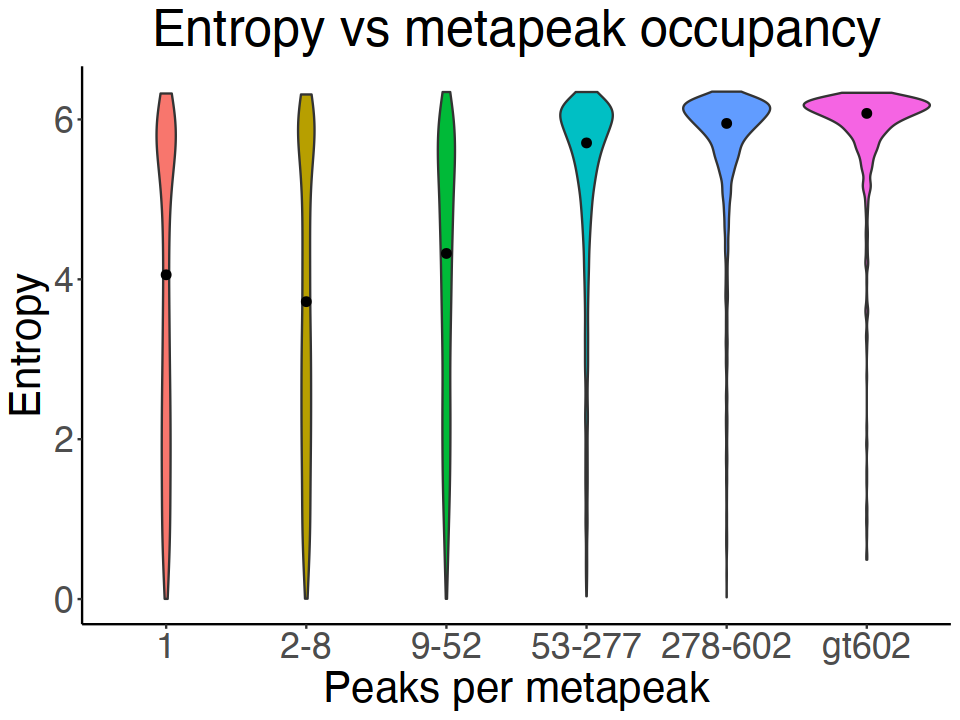

In [339]:
p

In [343]:
q <- ggplot(gene_entropies_max_mean_median_group  %>% filter(Entropy > 0), 
                aes(x = group, y = Entropy,  fill = group)) +
geom_boxplot(show.legend = FALSE, notch = TRUE)+ 
        labs(title="Entropy vs metapeak occupancy", x= "Peaks per metapeak", y = "Entropy") +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5, 
        size = 30), axis.title = element_text(size = 25), axis.text = element_text(size = 21))

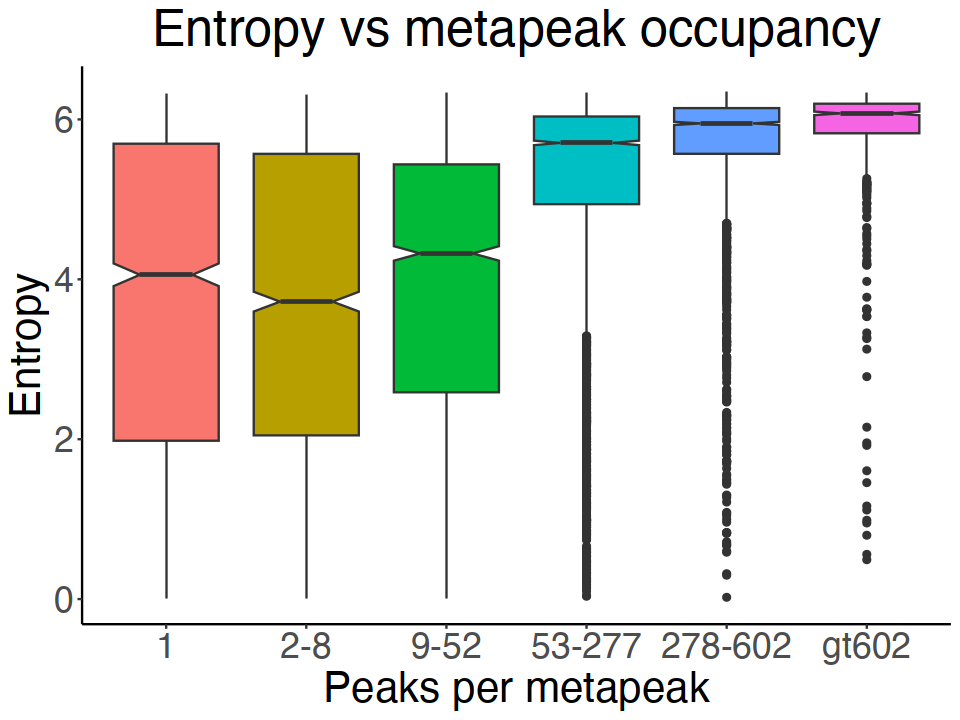

In [344]:
q

In [345]:
pdf("figures/Figure_7b_fly_metapeak_entropy.pdf", width = 8, height = 6)
print(q)
dev.off()

png("figures/Figure_7b_fly_metapeak_entropy.png", width = 800, height = 600)
print(q)
dev.off()

jpeg("figures/Figure_7b_fly_metapeak_entropy.jpg", width = 800, height = 600)
print(q)
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2

In [73]:
gene_entropies_max_mean_median_group = gene_entropies_max_mean_median_group  %>% mutate(norm_ent = Entropy/log2(83))

In [210]:
q <- ggplot(gene_entropies_max_mean_median_group  %>% filter(Entropy > 0), 
                aes(x = group, y = norm_ent,  fill = group)) +
geom_boxplot(show.legend = FALSE, notch = TRUE)+ 
        labs(title="Entropy vs metapeak occupancy", x= "Peaks per metapeak", y = "Normalized entropy") +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5, 
        size = 30), axis.title = element_text(size = 25), axis.text = element_text(size = 21))

In [76]:
options(repr.plot.width=10, repr.plot.height=8)

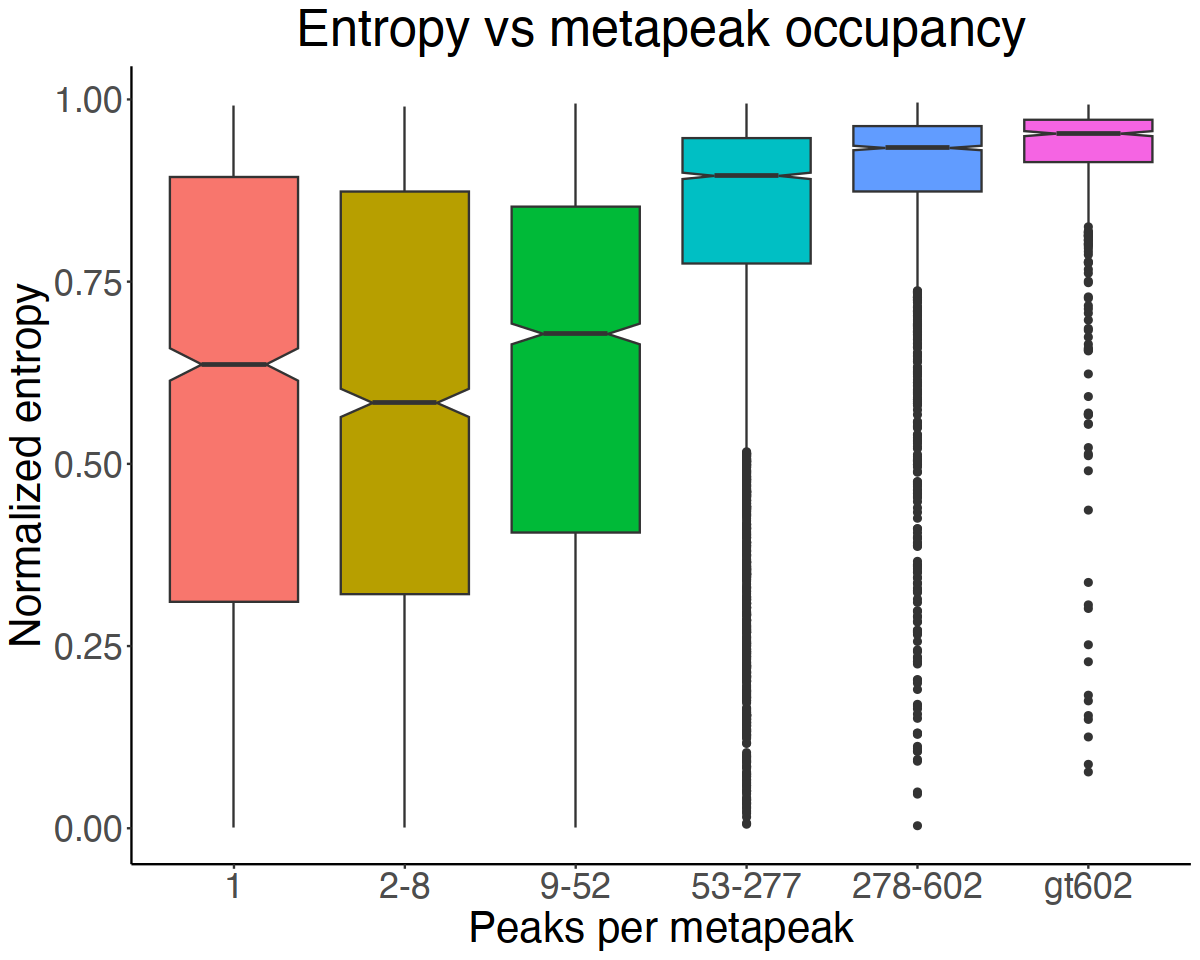

In [79]:
q

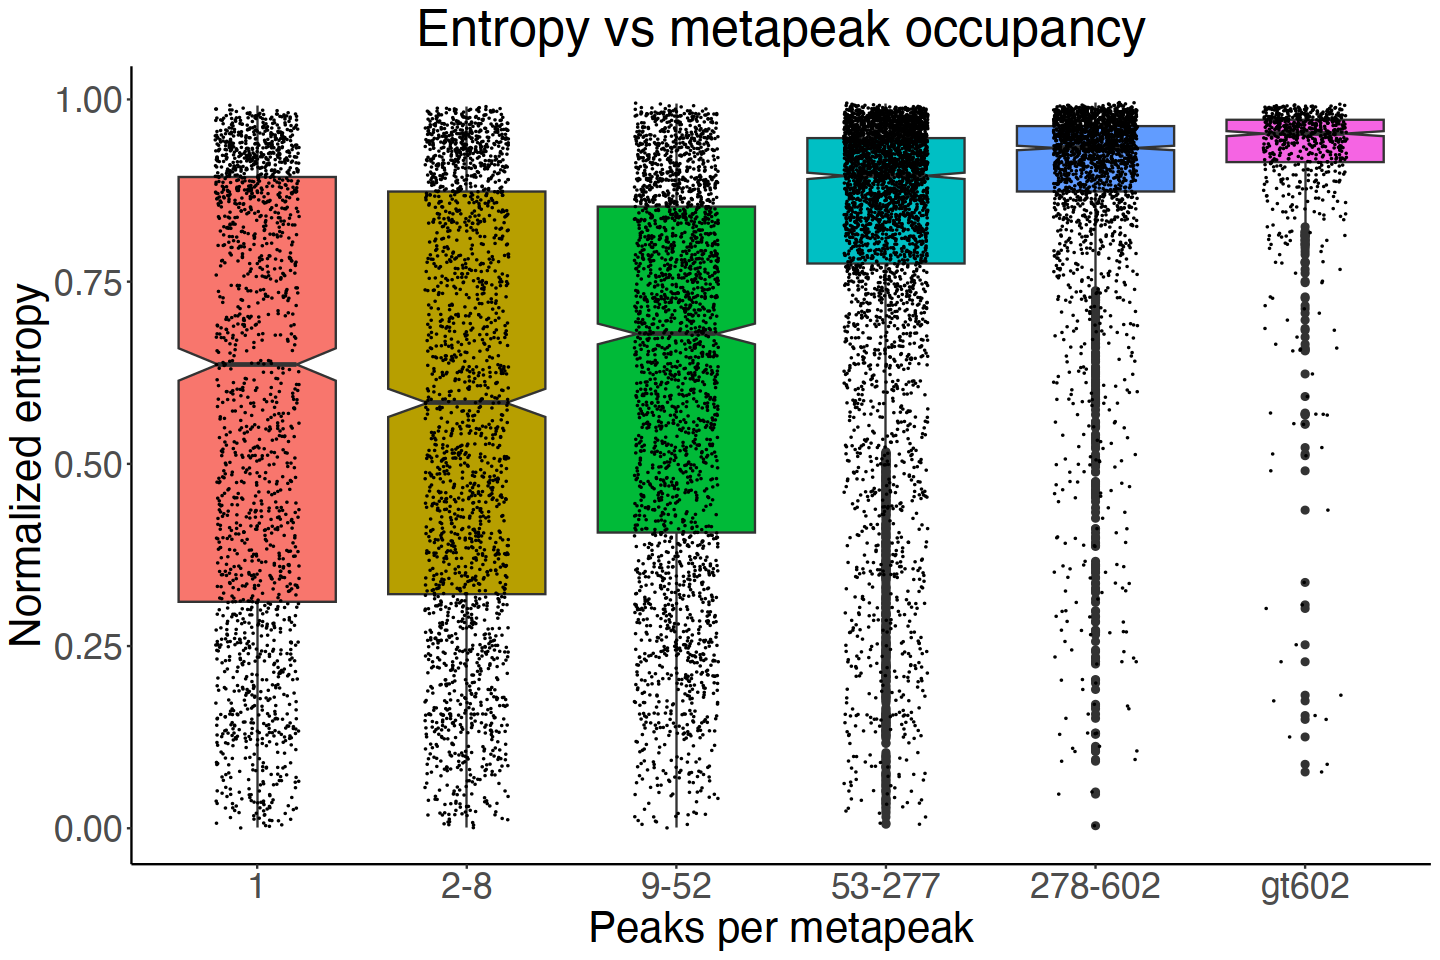

In [212]:
q + geom_jitter(shape=20, position=position_jitter(0.2), size = 0.1, show.legend = FALSE)

In [213]:
q = q + geom_jitter(shape=20, position=position_jitter(0.2), size = 0.1, show.legend = FALSE)

In [214]:
pdf("figures/Figure_7b_fly_metapeak_entropy.pdf", width = 8, height = 6)
print(q)
dev.off()

png("figures/Figure_7b_fly_metapeak_entropy.png", width = 800, height = 600)
print(q)
dev.off()

jpeg("figures/Figure_7b_fly_metapeak_entropy.jpg", width = 800, height = 600)
print(q)
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2

### Try Tau to see how that looks

In [81]:
Tau <- function(in.df){
  # get the feature names over which the entropy is to be calculated
  features <- colnames(in.df) 
  
  # add a Gene column to the input data.frame, makes the rownames a column
  df <- mutate(in.df,Gene=row.names(in.df))  
  
  # transform the input data.frame into expanded form , 3 columns: Gene,Feature,Value
  df <- pivot_longer(df,all_of(features),names_to = "Feature",values_to = "Value")
  
  # total the values for each gene and attach as a column GeneMax to the expanded data.frame
  df <- group_by(df,Gene) %>% summarise(GeneMax=max(Value)) %>% left_join(df,by="Gene")
  
  # add a column of tau values for each individual feature,value
  df <- mutate(df,T = 1.0 -(Value/GeneMax) )
  
  # sum up the taus for each gene and return data.frame with two columns: Gene,Tau
  group_by(df,Gene) %>% summarise(Tau=sum(T)/(length(features)-1))
}

In [82]:
emb_tau = Tau(exp_matrix)

In [83]:
dim(emb_tau)
dim(gene_entropies_max_mean_median_group)

[1] 13938     2

[1] 13938     7

In [84]:
gene_entropies_max_mean_median_group_tau = left_join(gene_entropies_max_mean_median_group, emb_tau, by = c("gene" = "Gene"))

In [207]:
q <- ggplot(gene_entropies_max_mean_median_group_tau, 
                aes(x = group, y = Tau,  fill = group)) +
geom_boxplot(show.legend = FALSE, notch = TRUE)+ 
        labs(title="Tau vs metapeak occupancy", x= "Peaks per metapeak", y = "Tau") +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5, 
        size = 30), axis.title = element_text(size = 25), axis.text = element_text(size = 21))

Warning message:
“Removed 760 rows containing non-finite values (`stat_boxplot()`).”


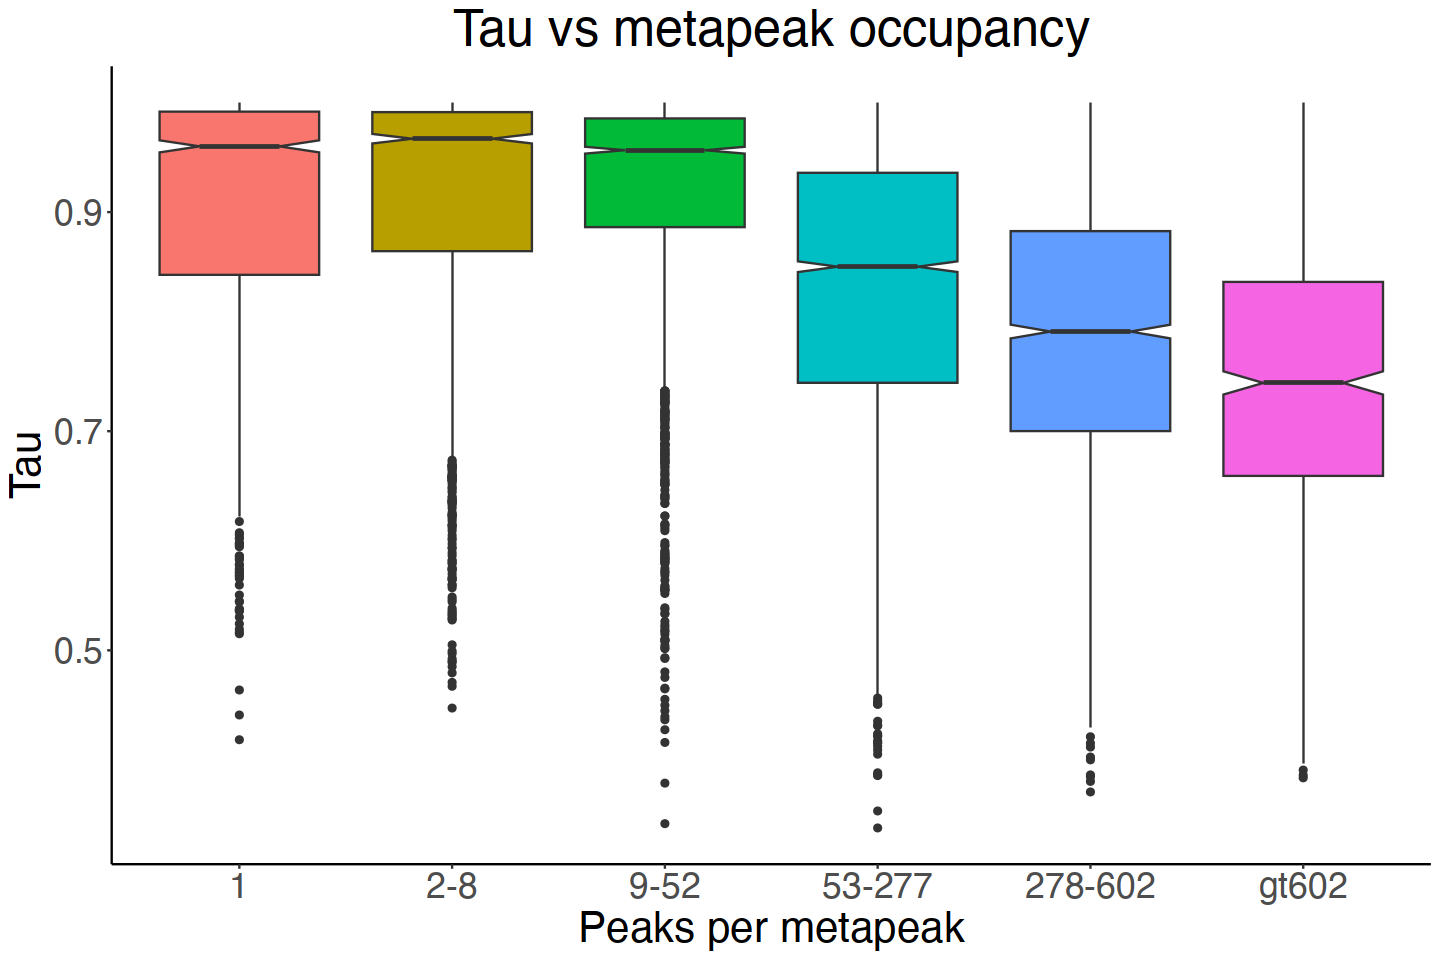

In [208]:
q

Warning message:
“Removed 760 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 760 rows containing missing values (`geom_point()`).”


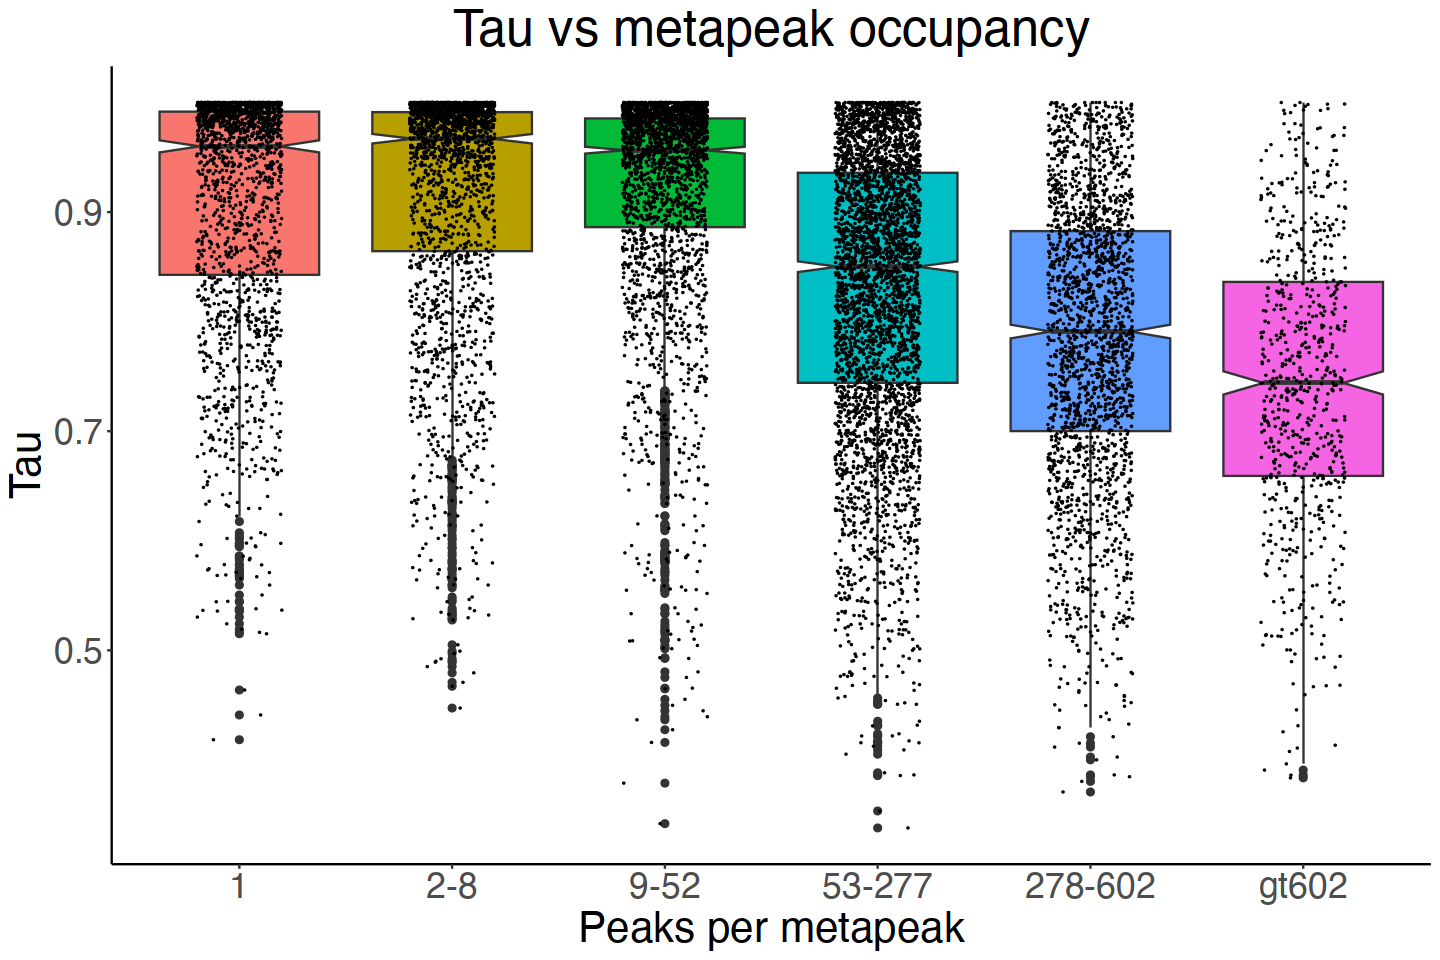

In [209]:
q + geom_jitter(shape=20, position=position_jitter(0.2), size = 0.1, show.legend = FALSE)

## get graphs of peaks per gene vs entropy and Tau

In [93]:
peaks_per_gene = fly_peaks_TF  %>% count(Gene) 

In [118]:
peaks_per_gene  %>% filter(Gene == "Cip4")

Gene n   
1 Cip4 1024

In [121]:
peaks_per_gene = peaks_per_gene  %>% rename("nPeaks" = "n")

In [97]:
fly_peaks_TF  %>% count(Gene)  %>%  head

Gene          n   
1 128up          177
2 14-3-3epsilon  726
3 14-3-3zeta    1367
4 140up           46
5 18w           1738
6 26-29-p        290

In [94]:
ls()

[1] "cluster_nPeaks_genes"                    
 [2] "complex_genes"                           
 [3] "emb_tau"                                 
 [4] "entropy"                                 
 [5] "eq1genes"                                
 [6] "exp_matrix"                              
 [7] "f2b"                                     
 [8] "f6b"                                     
 [9] "f6d"                                     
[10] "figure2b"                                
[11] "Figure6bd_function"                      
[12] "fly_peaks_TF"                            
[13] "g"                                       
[14] "gen"                                     
[15] "gen_exp"                                 
[16] "gene_clusters"                           
[17] "gene_clusters_peaksum"                   
[18] "gene_entropies"                          
[19] "gene_entropies_max_mean_median"          
[20] "gene_entropies_max_mean_median_group"    
[21] "gene_entropies_max_mean_median_group_tau"
[22] "gene_max_mean_median"                    
[23] "genes_peaks"                             
[24] "gt1lte8genes"                            
[25] "gt277lte602genes"                        
[26] "gt52lte277genes"                         
[27] "gt602genes"                              
[28] "gt8lte52genes"                           
[29] "metapeak_target_genes.fun"               
[30] "peak_matrix_ids"                         
[31] "peak_metapeak_function"                  
[32] "peaks_by_cluster_size"                   
[33] "peaks_per_gene"                          
[34] "q"                                       
[35] "r"                                       
[36] "t"                                       
[37] "target_numbers"                          
[38] "Tau"                                     
[39] "temp"                                    
[40] "temp2"

In [95]:
head(gene_clusters)

Gene          clusters
1 128up          1      
2 14-3-3epsilon  2      
3 14-3-3zeta     3      
4 140up          2      
5 18w           25      
6 26-29-p        2

In [115]:
cluster_nPeaks_genes  %>% count(cluster, Gene, nPeaks)  %>% head

cluster            Gene    nPeaks n
1 10_narrowPeak10036 Cip4     29    1
2 10_narrowPeak10038 Cip4     17    1
3 10_narrowPeak10099 CG11357 316    1
4 10_narrowPeak10369 Cpr65Av  62    1
5 10_narrowPeak10370 Cpr65Av  79    1
6 10_narrowPeak10427 CG42747  30    1

In [117]:
cluster_nPeaks_genes  %>% count(cluster, Gene, nPeaks) %>% filter(Gene == "Cip4")

cluster            Gene nPeaks n
1  10_narrowPeak10036 Cip4  29    1
2  10_narrowPeak10038 Cip4  17    1
3  2_narrowPeak18806  Cip4  51    1
4  2_narrowPeak18808  Cip4  39    1
5  2_narrowPeak18809  Cip4   1    1
6  2_narrowPeak18810  Cip4   8    1
7  2_narrowPeak18814  Cip4   1    1
8  2_narrowPeak18816  Cip4  78    1
9  3_narrowPeak15982  Cip4   5    1
10 3_narrowPeak15985  Cip4  37    1
11 3_narrowPeak15986  Cip4  22    1
12 3_narrowPeak15992  Cip4 120    1
13 4_narrowPeak14143  Cip4  84    1
14 4_narrowPeak14144  Cip4  41    1
15 5_narrowPeak12892  Cip4  20    1
16 5_narrowPeak12894  Cip4 244    1
17 5_narrowPeak12896  Cip4  56    1
18 5_narrowPeak12897  Cip4  15    1
19 6_narrowPeak11966  Cip4   2    1
20 6_narrowPeak11967  Cip4   6    1

In [116]:
gene_clusters_peaksum  %>% head
gene_clusters_peaksum  %>% filter(Gene == "Cip4")

Gene          clusters sum_peaks
1 128up          1        191     
2 14-3-3epsilon  2        441     
3 14-3-3zeta     3        243     
4 140up          2          2     
5 18w           25       1730     
6 26-29-p        2        344

Gene clusters sum_peaks
1 Cip4 20       876

In [124]:
gene_entropies_max_mean_median_group_tau_peaks = left_join(gene_entropies_max_mean_median_group_tau, 
                                                          peaks_per_gene, by = c("gene" = "Gene"))

In [ ]:
genes_peaks = cluster_nPeaks_genes  %>% count(cluster, Gene, nPeaks)  %>% 
    group_by(Gene)  %>% summarise(sum_peaks=sum(nPeaks)) 

In [127]:
q <- ggplot(gene_entropies_max_mean_median_group_tau_peaks, 
                aes(x = nPeaks, y = Tau,  fill = group)) +
geom_point(show.legend = FALSE, notch = TRUE)+ 
        labs(title="Tau vs peaks", x= "Peaks per gene", y = "Tau") +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5, 
        size = 30), axis.title = element_text(size = 25), axis.text = element_text(size = 21))

Warning message in geom_point(show.legend = FALSE, notch = TRUE):
“Ignoring unknown parameters: `notch`”


Warning message:
“Removed 1252 rows containing missing values (`geom_point()`).”


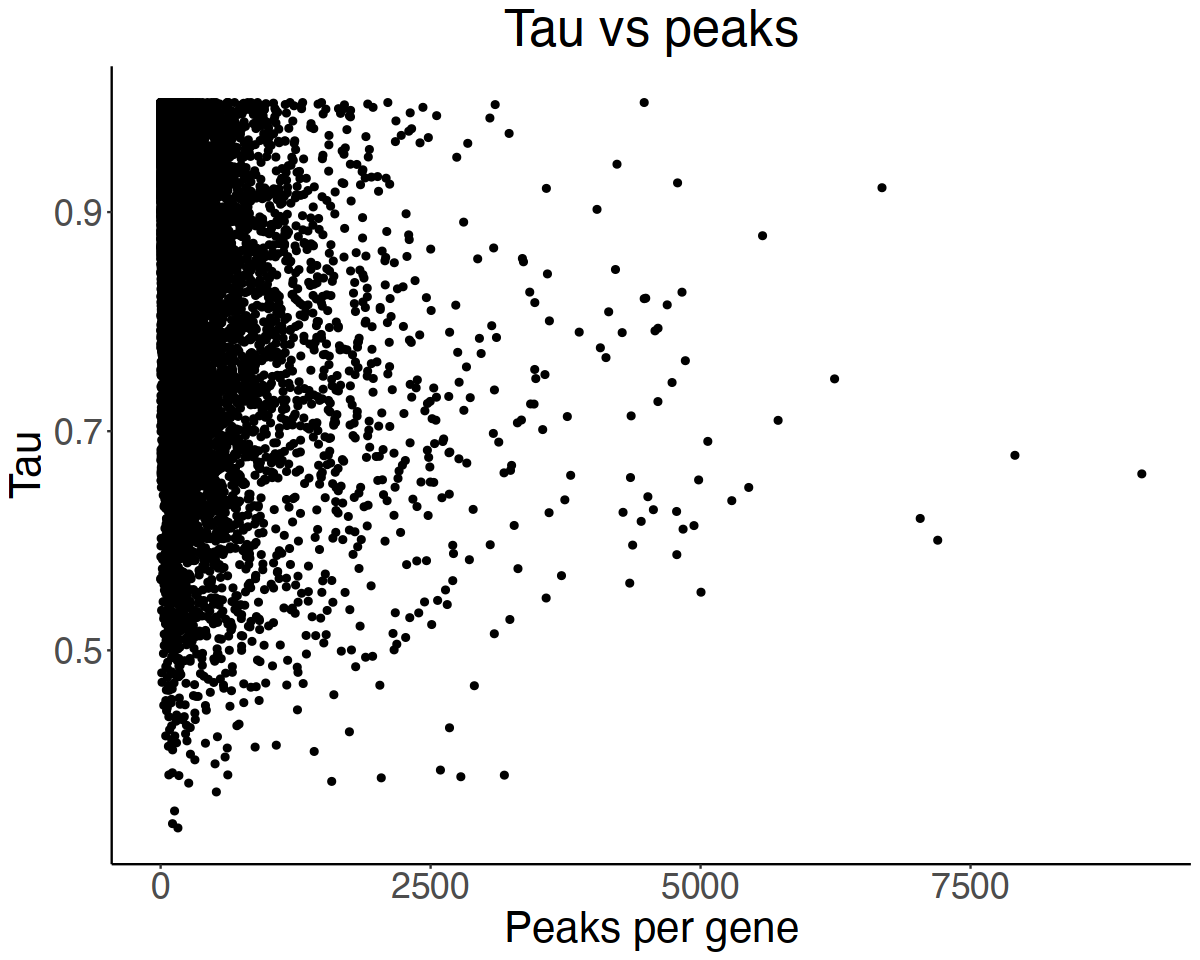

In [128]:
q

In [142]:
q <- ggplot(gene_entropies_max_mean_median_group_tau_peaks, 
                aes(x = (nPeaks), y = Entropy,  fill = group)) +
geom_point(show.legend = FALSE, size = 0.2, stroke = 0.06)+ 
        labs(title="Entropy vs peaks", x= "Peaks per gene", y = "Entropy") +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5, 
        size = 30), axis.title = element_text(size = 25), axis.text = element_text(size = 21))

Warning message:
“Removed 1469 rows containing missing values (`geom_point()`).”


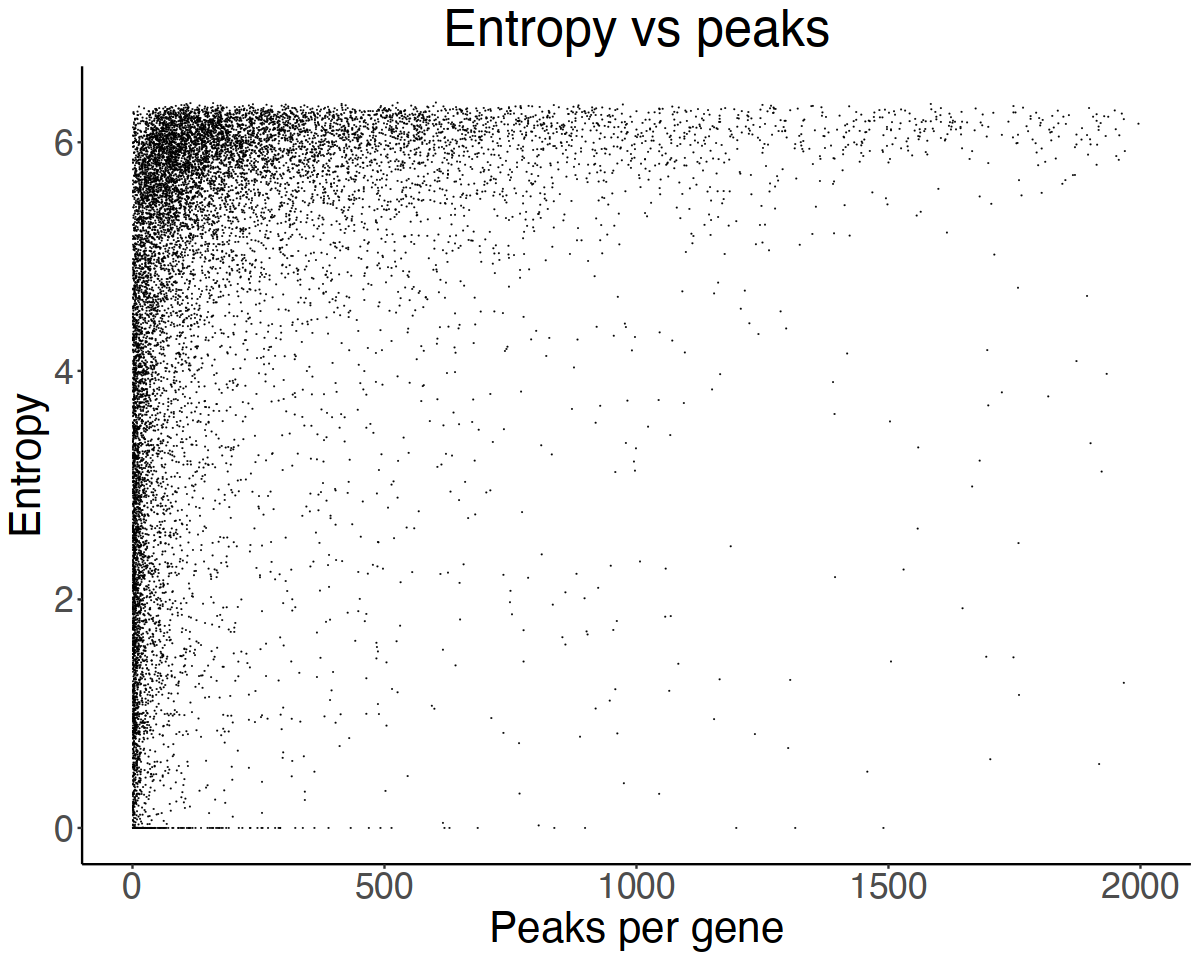

In [143]:
q + xlim(0,2000)

In [144]:
q <- ggplot(gene_entropies_max_mean_median_group_tau_peaks, 
                aes(x = (nPeaks), y = Tau,  fill = group)) +
geom_point(show.legend = FALSE, size = 0.2, stroke = 0.06)+ 
        labs(title="Tau vs peaks", x= "Peaks per gene", y = "Tau") +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5, 
        size = 30), axis.title = element_text(size = 25), axis.text = element_text(size = 21))

Warning message:
“Removed 1469 rows containing missing values (`geom_point()`).”


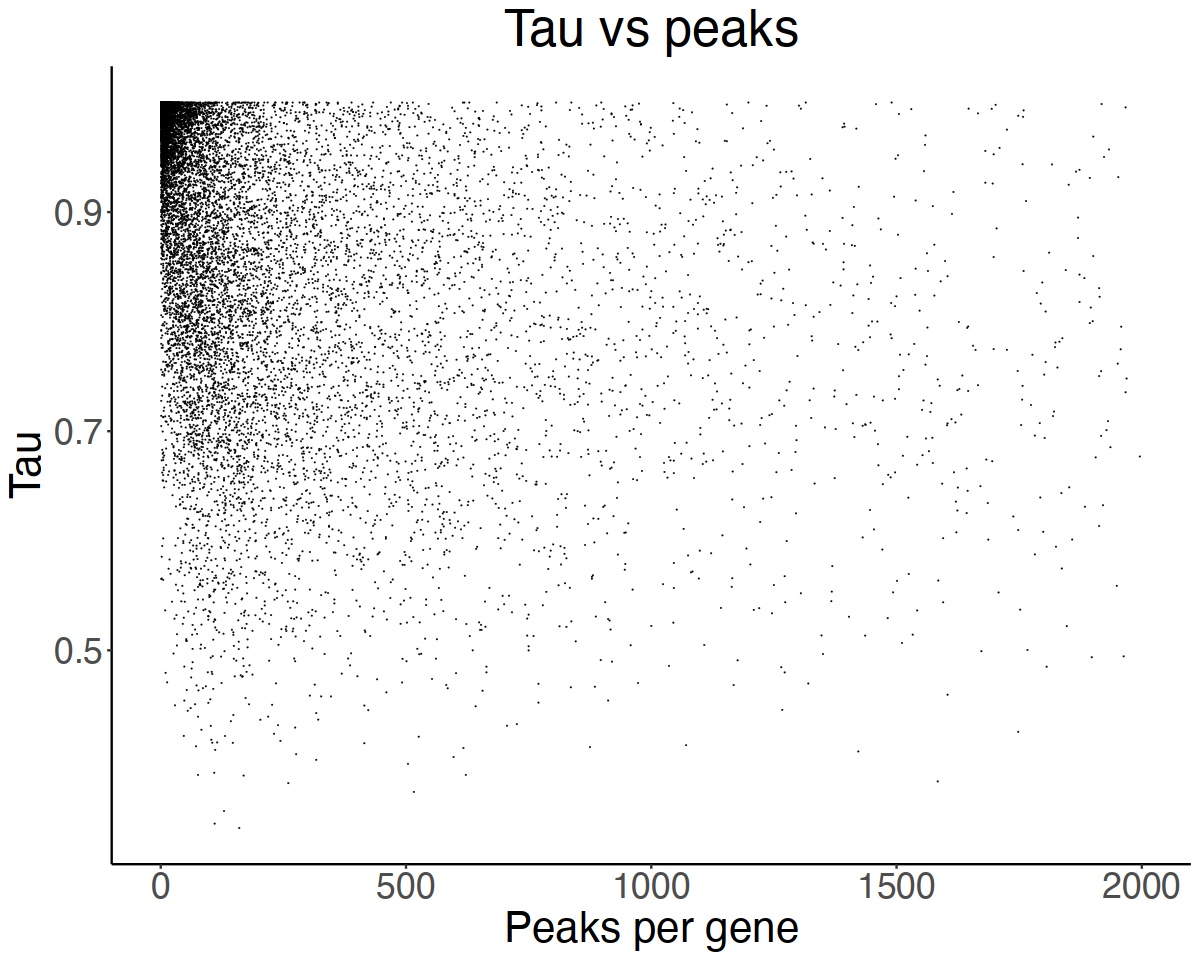

In [145]:
q  + xlim(0,2000)

In [146]:
gene_entropies_max_mean_median_group_tau_peaks_clusters = 
            left_join(gene_entropies_max_mean_median_group_tau_peaks, 
                                                          gene_clusters_peaksum, by = c("gene" = "Gene"))

In [147]:
q <- ggplot(gene_entropies_max_mean_median_group_tau_peaks_clusters, 
                aes(x = clusters, y = Tau,  fill = group)) +
geom_point(show.legend = FALSE, size = 0.2, stroke = 0.06)+ 
        labs(title="Tau vs clusters", x= "clusters per gene", y = "Tau") +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5, 
        size = 30), axis.title = element_text(size = 25), axis.text = element_text(size = 21))

Warning message:
“Removed 1859 rows containing missing values (`geom_point()`).”


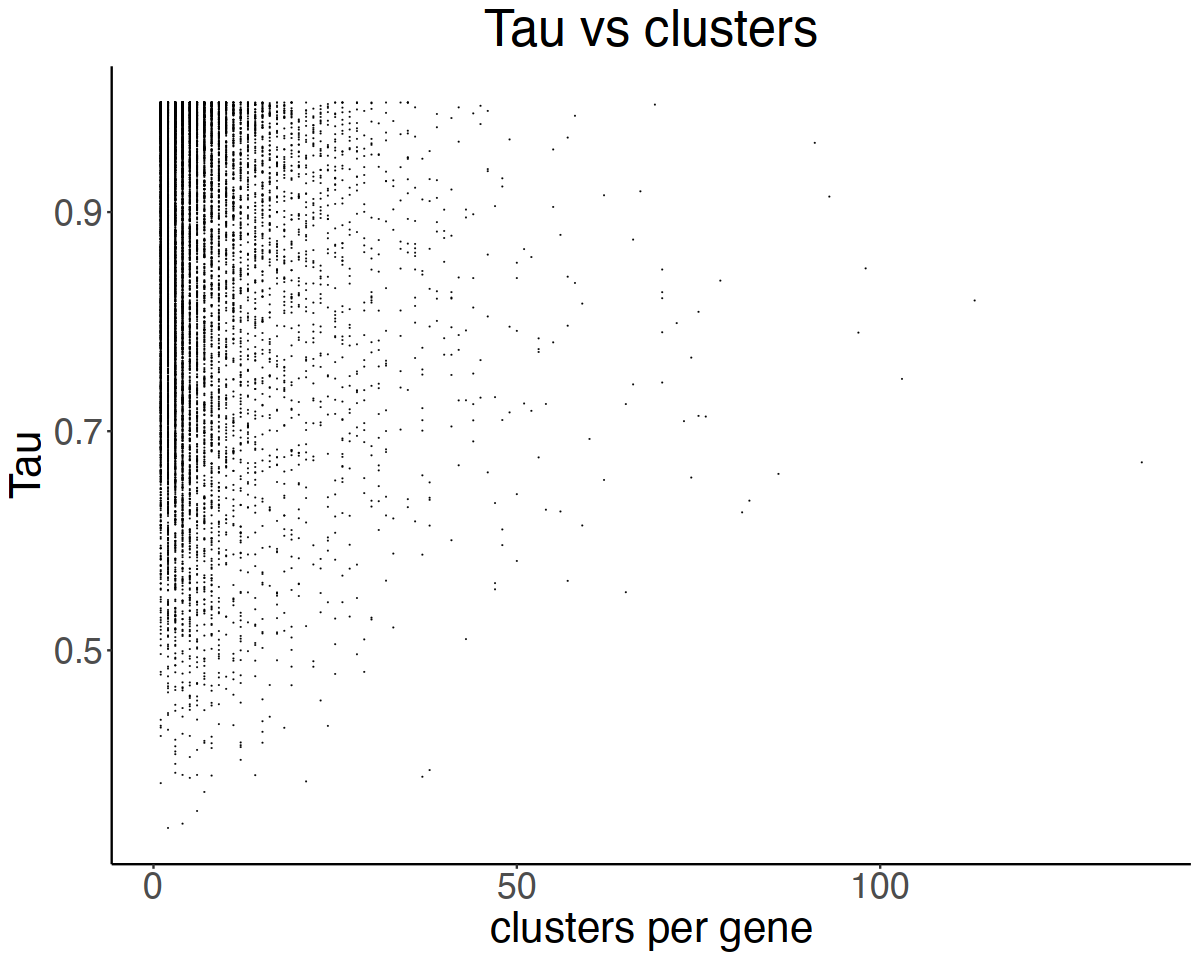

In [148]:
q

In [190]:
q <- ggplot(gene_entropies_max_mean_median_group_tau_peaks_clusters, 
                aes(x = clusters, y = Entropy,  fill = group)) +
geom_point(show.legend = FALSE, size = 0.2, stroke = 0.06)+ 
        labs(title="Entropy vs clusters", x= "clusters per gene", y = "Entropy") +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5, 
        size = 30), axis.title = element_text(size = 25), axis.text = element_text(size = 21))

Warning message:
“Removed 1914 rows containing missing values (`geom_point()`).”


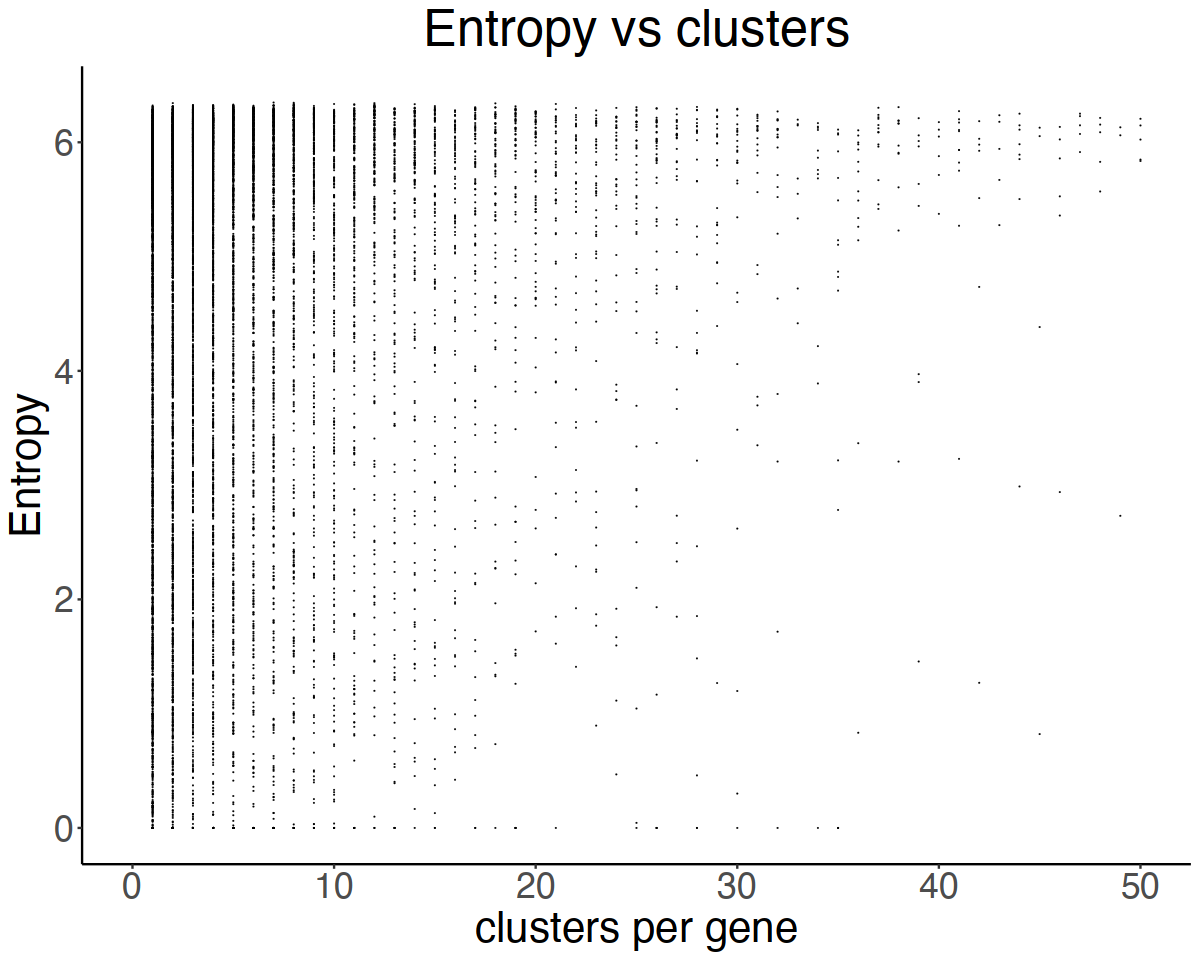

In [191]:
q + xlim(0,50)

### look at max and median peaks per gene

In [152]:
cluster_nPeaks_genes  %>% count(cluster, Gene, nPeaks)  %>% 
    group_by(Gene)  %>% summarise(max_peaks=max(nPeaks))  %>% head

Gene          sum_peaks
1 128up         191      
2 14-3-3epsilon 399      
3 14-3-3zeta    219      
4 140up           1      
5 18w           414      
6 26-29-p       340

In [155]:
gene_max = cluster_nPeaks_genes  %>% count(cluster, Gene, nPeaks)  %>% 
    group_by(Gene)  %>% summarise(max_peaks=max(nPeaks)) 

In [153]:
cluster_nPeaks_genes  %>% count(cluster, Gene, nPeaks)  %>% 
    group_by(Gene)  %>% summarise(median_peaks=median(nPeaks))  %>% head

Gene          median_peaks
1 128up         191.0       
2 14-3-3epsilon 220.5       
3 14-3-3zeta     15.0       
4 140up           1.0       
5 18w             6.0       
6 26-29-p       172.0

In [154]:
gene_median = cluster_nPeaks_genes  %>% count(cluster, Gene, nPeaks)  %>% 
    group_by(Gene)  %>% summarise(median_peaks=median(nPeaks)) 

In [157]:
gene_entropies_max_mean_median_group_tau_peaks_clusters_max = left_join(
gene_entropies_max_mean_median_group_tau_peaks_clusters, gene_max, by = c("gene" = "Gene"))

In [159]:
gene_entropies_max_mean_median_group_tau_peaks_clusters_max_med = left_join(
gene_entropies_max_mean_median_group_tau_peaks_clusters_max, gene_median, by = c("gene" = "Gene"))

In [194]:
q <- ggplot(gene_entropies_max_mean_median_group_tau_peaks_clusters_max, 
                aes(x = max_peaks, y = Entropy,  fill = group)) +
geom_point(show.legend = FALSE, size = 0.5, stroke = 0.16)+ 
        labs(title="Entropy vs max_peaks", x= "max_peaks per gene", y = "Entropy") +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5, 
        size = 30), axis.title = element_text(size = 25), axis.text = element_text(size = 21))

Warning message:
“Removed 1859 rows containing missing values (`geom_point()`).”


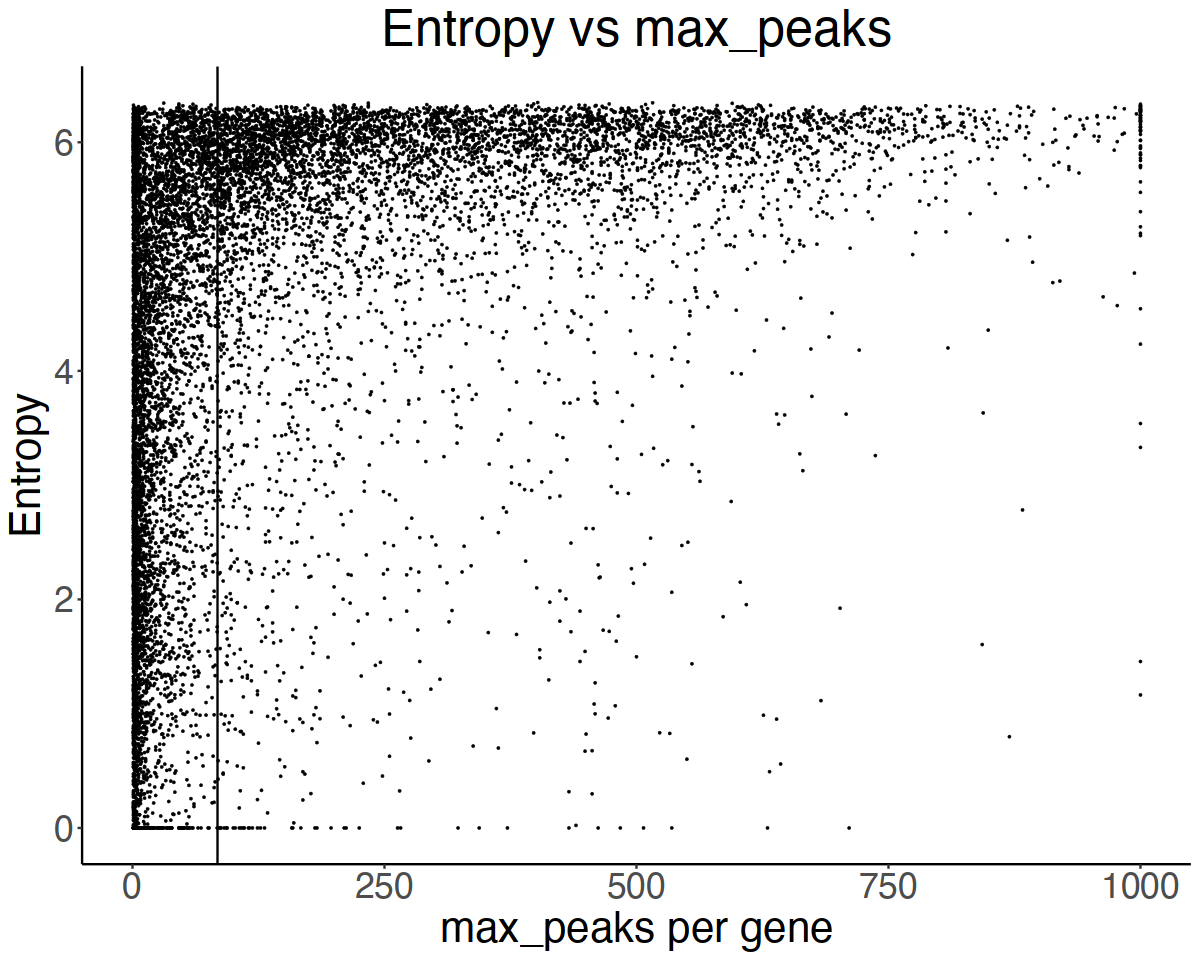

In [170]:
q + xlim(0,1000) + geom_vline(xintercept = 84)

Warning message:
“Removed 3055 rows containing missing values (`geom_point()`).”


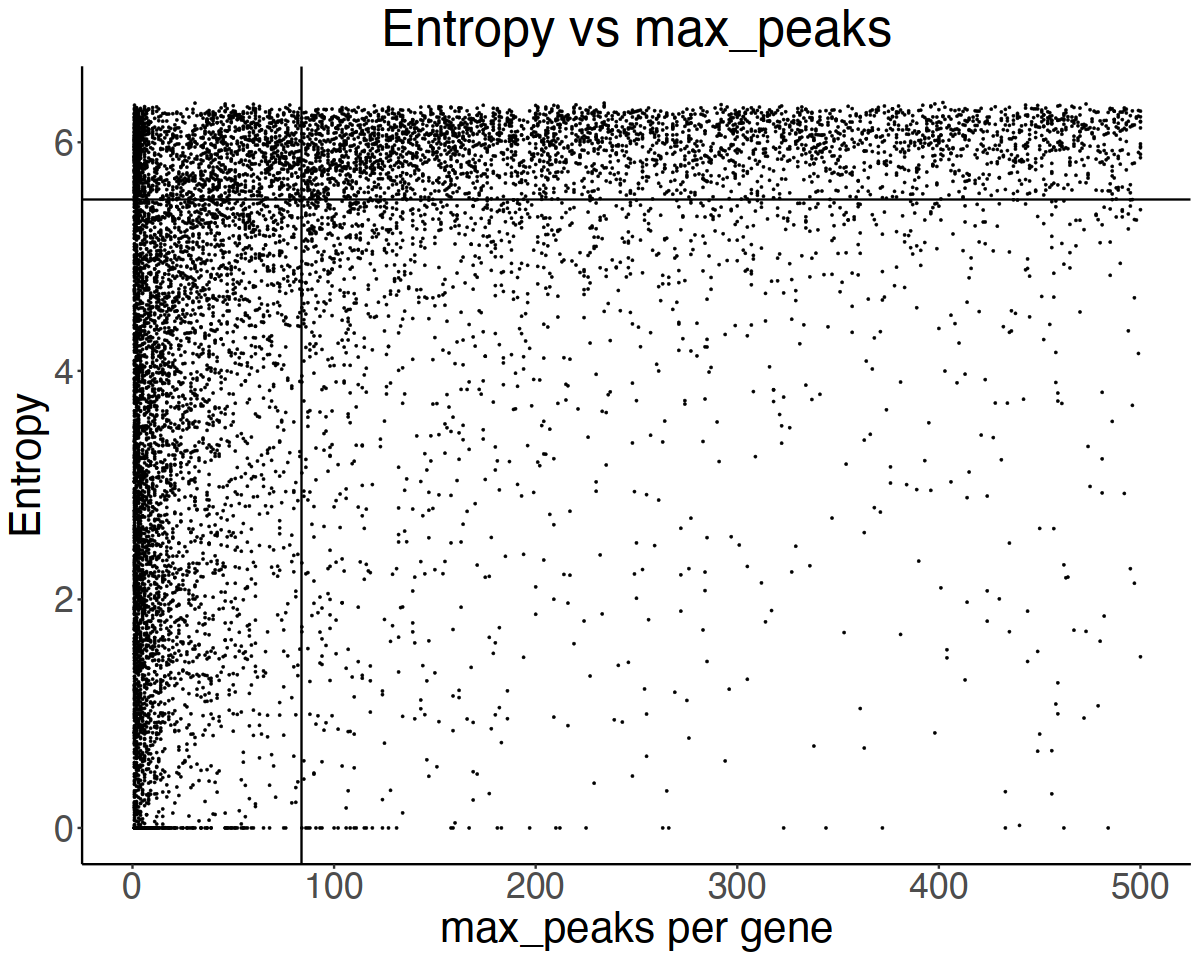

In [195]:
q + xlim(0,500) + geom_vline(xintercept = 84) + geom_hline(yintercept = 5.5)

In [165]:
q <- ggplot(gene_entropies_max_mean_median_group_tau_peaks_clusters_max_med, 
                aes(x = median_peaks, y = Entropy,  fill = group)) +
geom_point(show.legend = FALSE, size = 0.5, stroke = 0.16)+ 
        labs(title="Entropy vs median_peaks", x= "median_peaks per gene", y = "Entropy") +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5, 
        size = 30), axis.title = element_text(size = 25), axis.text = element_text(size = 21))

Warning message:
“Removed 1987 rows containing missing values (`geom_point()`).”


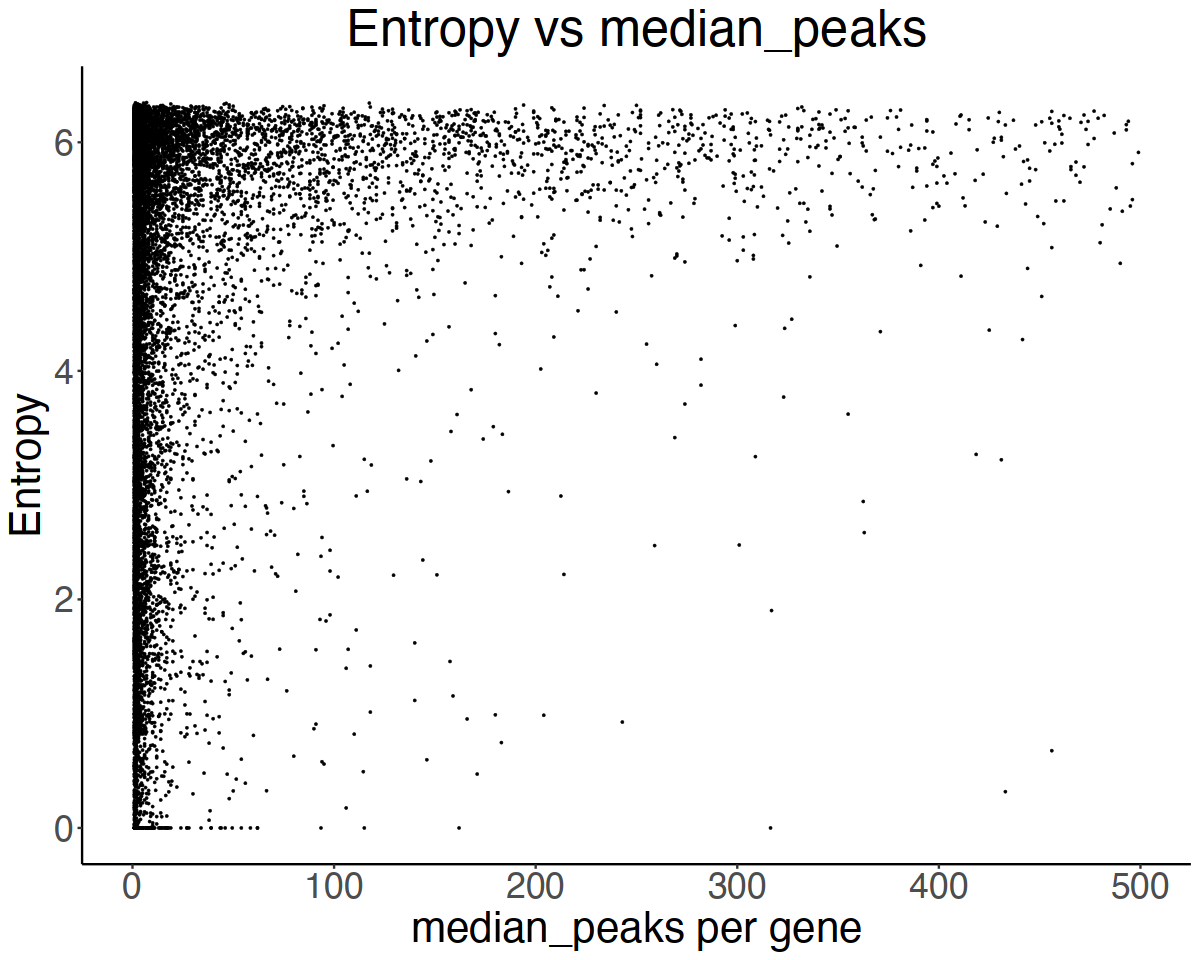

In [167]:
q + xlim(0,500)

In [192]:
gene_entropies_max_mean_median_group_tau_peaks_clusters_max  %>% filter(
    max_peaks <= 84 & Entropy < 5.5)  %>% dim

[1] 4626   12

In [174]:
gene_entropies_max_mean_median_group_tau_peaks_clusters_max  %>% filter(
    max_peaks > 84 & Entropy < 5.5)  %>% dim

[1] 1639   12

In [175]:
gene_entropies_max_mean_median_group_tau_peaks_clusters_max  %>% filter(
    max_peaks <= 84 & Entropy >= 5.5)  %>% dim

[1] 1714   12

In [176]:
gene_entropies_max_mean_median_group_tau_peaks_clusters_max  %>% filter(
    max_peaks > 84 & Entropy >= 5.5)  %>% dim

[1] 4100   12

In [196]:
gene_entropies_max_mean_median_group_tau_peaks_clusters_max  %>% filter(
    max_peaks > 84 & Entropy >= 5.5 & max_peaks <=277)  %>% dim

[1] 1856   12

In [198]:
gene_entropies_max_mean_median_group_tau_peaks_clusters_max  %>% filter(
    max_peaks > 84 & Entropy < 5.5 & max_peaks <=277)  %>% dim

[1] 1068   12

In [177]:
4626 + 1639 + 1714 + 4100

[1] 12079

In [178]:
dim(gene_entropies_max_mean_median_group_tau_peaks_clusters_max)

[1] 13938    12

In [179]:
gene_entropies_max_mean_median_group_tau_peaks_clusters_max  %>% filter(max_peaks >= 0)  %>% dim

[1] 12452    12

In [180]:
gene_entropies_max_mean_median_group_tau_peaks_clusters_max  %>% filter(Entropy >= 0)  %>% dim

[1] 13178    12

In [181]:
gene_entropies_max_mean_median_group_tau_peaks_clusters_max  %>% filter(Entropy >= 0 & 
                                                                     max_peaks >= 0  )  %>% dim

[1] 12079    12

In [186]:
length(unique(cluster_nPeaks_genes$Gene))

[1] 12479